In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import regex as re
from time import sleep
import seaborn as sns
from scipy import stats                                                         

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, validation_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from mlxtend.regressor import StackingCVRegressor
from sklearn.impute import SimpleImputer
from sklearn.decomposition import KernelPCA, PCA


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras import regularizers
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
_ = plt.style.use('ggplot')
_ = plt.style.available

/Users/eliregen/anaconda3/envs/py36/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
Using TensorFlow backend.


In [2]:
df = pd.read_csv('./roboBohr.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


In [6]:
y = df['Eat']
# Target variable

In [7]:
X = df.drop(columns=['pubchem_id', 'Eat'])
# Features

In [8]:
y.describe()

count    16242.000000
mean       -11.178969
std          3.659133
min        -23.245373
25%        -13.475805
50%        -10.835211
75%         -8.623903
max         -0.789513
Name: Eat, dtype: float64

In [9]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,115.715266,22.445723,20.474191,18.529573,17.169350,15.816888,15.133152,14.471534,13.960759,13.464842,...,0.006003,0.000135,0.000134,0.000133,0.003879,0.000131,0.000129,0.002155,0.000127,0.001201
std,113.198503,8.659586,7.670481,6.485777,5.512560,4.179691,3.885091,3.503075,3.357136,3.140732,...,0.054458,0.002748,0.002728,0.002705,0.043869,0.002676,0.002633,0.032755,0.002594,0.024472
min,36.858105,2.906146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.516695,17.969345,16.228071,15.165862,13.744092,13.653146,13.637784,12.759519,12.587359,12.489127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.516695,20.662511,18.631287,17.690729,16.020040,15.156646,13.848274,13.659233,13.652832,13.648992,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.516695,21.132432,20.739496,18.712895,18.297501,17.639688,16.154918,15.499474,14.900585,13.801184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,388.023441,73.563510,66.269180,66.268891,66.268756,66.268196,66.264158,66.258487,66.258177,60.365756,...,0.500000,0.062496,0.062225,0.061999,0.500000,0.061534,0.059760,0.500000,0.057834,0.500000


In [10]:
abs_E = y.abs()

In [368]:
y.mean()

-11.178969325907483

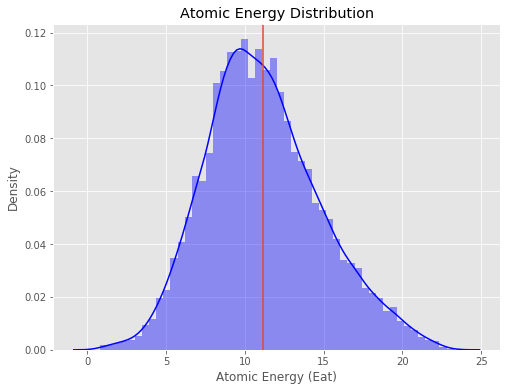

In [433]:
fig_1 = plt.figure(figsize=(8,6))
sns.distplot(abs(df['Eat']),bins=50,  norm_hist=True, color="b")
plt.title("Atomic Energy Distribution")
plt.xlabel("Atomic Energy (Eat)")
yy = stats.norm.pdf(abs(df['Eat']))    
plt.ylabel("Density")
plt.axvline(abs(y.mean()), 0, 1)
ax.plot(abs(df['Eat']), yy, 'r', lw=2);

In [452]:
fig_1.savefig("Target_hist.png")

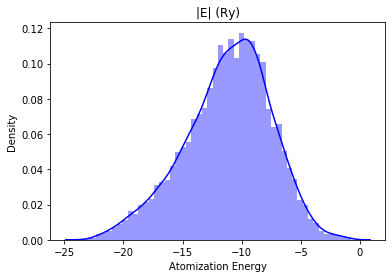

In [402]:
sns.distplot(df['Eat'], kde=True, color="b")
plt.xlabel('Atomization Energy')
plt.ylabel('Density')

plt.title('|E| (Ry)');

target variable is in dimensionless multiples of the Rydberg energy, (m_e)(e^4)/(8*epsilon_0^2 * h^2)

This is a regression problem, so the metric we want to minimize is Mean Square Error(MSE).

In [10]:
# Changes the mean and standard deviation of features to 0 and 1 respectively.
def standardize(df):
    for column in range(0, df.shape[1]):
        df[str(column)] = (df[str(column)] - np.mean(df[str(column)]))/np.std(df[str(column)]) 

In [17]:
standardize(X)

--- 1.2868480682373047 seconds ---
Number of components: 2
Explained variance:  0.7708532110735722


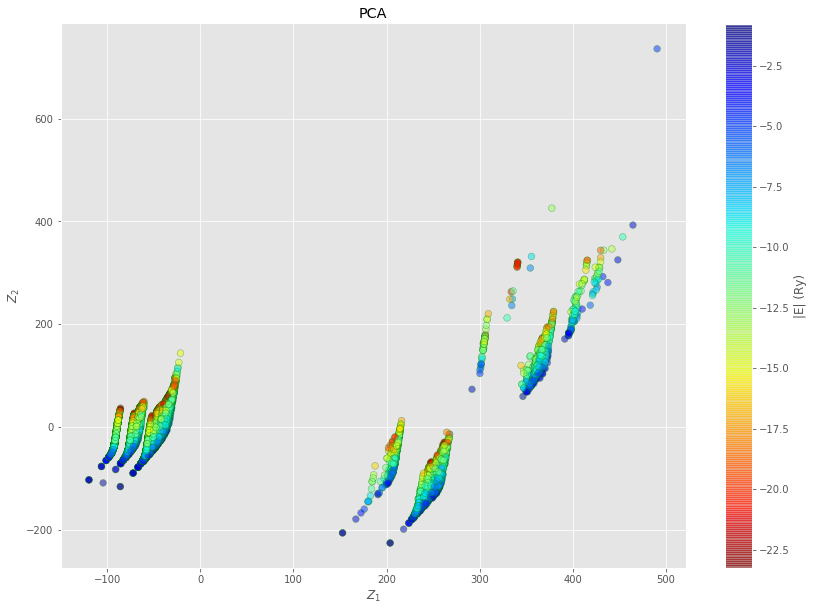

In [474]:
pca = PCA(n_components=2, random_state=13)

start_time = time.time()
X_pca = pca.fit_transform(X)
print("--- %s seconds ---" % (time.time() - start_time))
print("Number of components: {}".format(pca.components_.shape[0]))
print("Explained variance: ", pca.explained_variance_ratio_.sum())

fig_pca = plt.figure(figsize=(14,10))
ax  = fig_pca.add_subplot(111)

scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=y, s=45, edgecolors='green', cmap=cm.jet_r, alpha=0.5)
colorbar = fig_pca.colorbar(scatter, ax=ax, label = "|E| (Ry)")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.title('PCA')
sns.despine()
plt.show()

In [11]:
mask_random = np.random.randint(0,X.shape[0],size=2000)
kp = KernelPCA(n_components=100,kernel='sigmoid', gamma=0.5, max_iter=250).fit(X[mask_random])
print("PCA is trained on kernel")
print('--- --- --- ')
X_reduced = kp.transform(X)[:,:50]
plt.style.use('grayscale')
fig = plt.figure(figsize=(16,8))
axs = fig.subplots(5,10,sharex=True, sharey=True)
axs = np.array(axs).flatten()
for i in range(50):
    ax = axs[i]
    ax.scatter(X_reduced[:,i],y,s=0.1, alpha=0.2)
    ax.tick_params(left=False, bottom=False)

KeyError: "None of [Int64Index([ 7643,  8859,  3624, 12498,  8340,  3749,  9080, 11969, 10488,\n             7520,\n            ...\n            12896,  3279,  1668,  5239,   664,   670, 13412,  8864,   593,\n            16004],\n           dtype='int64', length=2000)] are in the [columns]"

In [296]:
# want our metric to have same units as the target
def rmse_fun(predictions, y_test):
    return np.sqrt(mean_squared_error(y_test, predictions))

In [284]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.8, random_state=42)
print(X_train.shape, X_test.shape)
#use 1/5 of data for training to speed up model fitting. 

(11369, 1275) (4873, 1275)


In [12]:
#Training/test data for final models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(11369, 1275) (4873, 1275)


In [24]:
# Linear Regression
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9722961641022113 -18774.67796073205


In [44]:
# Ridge Regression i.e., linear regression with L2 regularization.
ridge_models = {}
for i in [1, 5, 10, 20, 30, 50, 60, 70, 100, 110, 120, 130, 140, 150, 200, 500, 1000]:
    ridge_models[str(i)] = Ridge(alpha=i)
    ridge_models[str(i)].fit(X_train, y_train)
    print(i , ridge_models[str(i)].score(X_train, y_train), ridge_models[str(i)].score(X_test, y_test))

1 0.9672222734212035 0.6407120336874502
5 0.9647608256905305 0.7676316069272864
10 0.9636016772318354 0.8140365315773469
20 0.9623891551271858 0.8541662979833856
30 0.9616610759741914 0.8741466877216004
50 0.9607410646440275 0.8952741678862292
60 0.9604158292084363 0.9017188808643961
70 0.9601431618824532 0.9067332856585667
100 0.9595217693350303 0.9168906963165038
110 0.9593579141791604 0.9192834131063913
120 0.9592089931816477 0.921356486320306
130 0.9590724513474929 0.9231726712931462
140 0.9589463082034785 0.9247788653207493
150 0.9588290006257838 0.9262108822123174
200 0.9583383343060244 0.9315576504433805
500 0.9566091492129494 0.9426752599021969
1000 0.9547996828569209 0.9458179429445838


In [454]:
lasso_models = {}
for i in [0.00001, 0.0001, 0.001 , 0.01, 0.1, 1]:
    lasso_models[str(i)] = Lasso(alpha=i)
    lasso_models[str(i)].fit(X_train, y_train)
    print(i , lasso_models[str(i)].score(X_train, y_train), lasso_models[str(i)].score(X_test, y_test))

1e-05 0.9617622346948121 0.8301159919414033
0.0001 0.960731797539494 0.8368135053577086
0.001 0.9576273428003735 0.9216267427609567
0.01 0.9524028309915462 0.943207809374794
0.1 0.9037454626577505 0.8856258633824057
1 0.8361169858711467 0.8003482895096227


## Moving on to the non-linear models

In [26]:
knn_models = {}
for i in range(1, 6):
    knn_models[str(i)] = KNeighborsRegressor(n_neighbors=i);
    knn_models[str(i)].fit(X_train, y_train);
    score = knn_models[str(i)].score(X_test, y_test)
    print("Validation score for n_neighbors = " + str(i) + " is " + str(score))

Validation score for n_neighbors = 1 is 0.994830328108191
Validation score for n_neighbors = 2 is 0.9953793706724264
Validation score for n_neighbors = 3 is 0.9953822325872356
Validation score for n_neighbors = 4 is 0.9952132542454479
Validation score for n_neighbors = 5 is 0.9949386868751555


In [27]:
nn_models = {}
for i in range(4,9):
    for j in range(1,6):
        nn_models[str((i,j))] = MLPRegressor((i,j), activation='relu', learning_rate='adaptive')
        nn_models[str((i,j))].fit(X_train, y_train)
        print((i,j), nn_models[str((i,j))].score(X_train, y_train), nn_models[str((i,j))].score(X_test, y_test))

(4, 1) -0.05028414767524536 -0.054273203779765744
(4, 2) 0.986567976465915 0.9354152180764135
(4, 3) 0.9851975079028874 0.9164602285442147
(4, 4) 0.9933519168076689 0.9779366994390659
(4, 5) 0.9659824855993544 0.8916777654799803
(5, 1) 0.9897864289750598 0.9054703216867649
(5, 2) 0.9897393657539815 0.9430300738023254
(5, 3) 0.9854109095920337 0.9170347291214909
(5, 4) 0.9881879305390818 0.8891331805554755
(5, 5) 0.9837559343967673 0.891760133857655
(6, 1) -0.020898599791747685 -0.02333592628848269
(6, 2) 0.9927158179414998 0.9397652126483257
(6, 3) 0.9909404313147351 0.9541193212696831
(6, 4) 0.9924820908142676 0.9463617722951296
(6, 5) 0.9932868780655268 0.987259535994774
(7, 1) 0.9898766620656962 0.9576036640666507
(7, 2) 0.9377834896869409 0.9207860098749923
(7, 3) 0.9939326028758897 0.9534099993740633
(7, 4) 0.9896122887151084 0.9544701348196519
(7, 5) 0.9885818304909981 0.9852799092909595
(8, 1) -0.22657782927020698 -0.23628885593847704
(8, 2) 0.9920969122647754 0.9277182101680078

In [449]:
nn_model = MLPRegressor((6,5), activation='relu', learning_rate='adaptive')
nn_model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(6, 5), learning_rate='adaptive',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [450]:
nn_pred = nn_model.predict(X_test)

In [451]:
rmse_fun(y_test, nn_pred)

0.557627187101209

In [444]:
model.add(Dense(1000, input_dim=X.shape[1],kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(500,kernel_initializer='normal', activation='sigmoid'))
model.add(Dropout(0.25))
#model.add(Dense(50,kernel_initializer='normal'))
#model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

history = model.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=1,epochs=9)

Train on 11369 samples, validate on 4873 samples
Epoch 1/9
11369/11369 [==============================] - 75s 7ms/step - loss: 5.3678 - val_loss: 0.6135
Epoch 2/9
11369/11369 [==============================] - 61s 5ms/step - loss: 0.9772 - val_loss: 0.2996
Epoch 3/9
11369/11369 [==============================] - 79s 7ms/step - loss: 0.8216 - val_loss: 0.3160
Epoch 4/9
11369/11369 [==============================] - 72s 6ms/step - loss: 0.7668 - val_loss: 0.3028
Epoch 5/9
11369/11369 [==============================] - 62s 5ms/step - loss: 0.7596 - val_loss: 0.3806
Epoch 6/9
11369/11369 [==============================] - 77s 7ms/step - loss: 0.7373 - val_loss: 0.2541
Epoch 7/9
11369/11369 [==============================] - 81s 7ms/step - loss: 0.7122 - val_loss: 0.2278
Epoch 8/9
11369/11369 [==============================] - 57s 5ms/step - loss: 0.7016 - val_loss: 0.5233
Epoch 9/9
11369/11369 [==============================] - 56s 5ms/step - loss: 0.6639 - val_loss: 0.1816


In [445]:
hist_pred = model.predict(X_test, verbose=1)

4873/4873 [==============================] - 3s 678us/step


In [446]:
rmse_fun(y_test, hist_pred.reshape((hist_pred.shape[0],)))

0.4261273879608461

In [13]:
lgbm_model = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
              importance_type='split', learning_rate=0.1, max_depth=4,
              min_child_samples=20, min_child_weight=5, min_split_gain=0.0,
              n_estimators=300, n_jobs=2, num_leaves =25,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [14]:
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.0625,
             max_delta_step=0, max_depth=6, min_child_weight=11, missing=None,
             n_estimators=600, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [15]:
rf_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 3, max_features = 'auto', max_depth = 8)

In [43]:
knn_model = KNeighborsRegressor(weights = 'distance', n_neighbors = 3, leaf_size = 90)

In [45]:
ridge_model = Ridge(alpha = 1000)
lasso_model = Lasso(alpha = 0.01, max_iter=10000)
enet_model = ElasticNet(alpha = 0.01, l1_ratio = 0.1, max_iter=10000)

In [48]:
# Ensemble method for averaging predictions 
class AveragingRegressor(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, regressors):
        self.regressors = regressors
        self.predictions = None

    def fit(self, X, y):
        for regr in self.regressors:
            regr.fit(X, y)
        return self

    def predict(self, X):
        self.predictions = np.column_stack([regr.predict(X) for regr in self.regressors])
        return np.mean(self.predictions, axis=1)
    
    
averaged_model = AveragingRegressor([xgb_model, lgbm_model])

In [16]:
stacked_model = StackingCVRegressor(
    regressors=[xgb_model, lgbm_model, rf_model],
    meta_regressor=Ridge()
)

In [328]:
rmse = make_scorer(rmse_fun, greater_is_better=False)
#let's see how long this all takes
start_time = time.time()

models = [
     ('XGBoost', xgb_model),
     ('LightGBM', lgbm_model),
     ('RandomForest', rf_model),
     ('Ridge', ridge_model),
     ('Lasso', lasso_model),
     ('ElasticNet', enet_model),
     ('KNN', knn_model),
     ('Averaged', averaged_model),
     ('Stacked', stacked_model),
]

scores = [
    -1.0 * cross_val_score(model, X_train.values, y_train.values, scoring=rmse, cv=5).mean()
    for _,model in models
]
print(" Seconds %0.3f" % (time.time() - start_time))

KeyboardInterrupt: 

In [63]:
dataz = pd.DataFrame({ 'Model': [name for name, _ in models], 'Error (RMSE)': scores })

In [152]:
dataz.columns

Index(['Model', 'Error (RMSE)'], dtype='object')

In [157]:
dataz2 = dataz.append({'Model': 'Neural Net' , 'Error (RMSE)': mean_squared_error(y_test, hist_pred)}, ignore_index=True)

In [160]:
dataz2

,Model,Error (RMSE)
0,XGBoost,0.094768
1,LightGBM,0.104105
2,RandomForest,0.198746
3,Ridge,0.828973
4,Lasso,0.892266
5,ElasticNet,0.897479
6,KNN,0.248715
7,Averaged,0.092151
8,Stacked,0.091385
9,Neural Net,0.099414


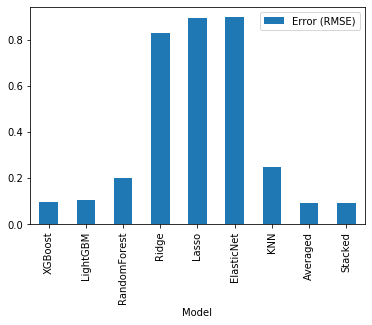

In [94]:
dataz.plot(x='Model', kind='bar');

In [51]:
X_test = X_test.as_matrix()
X_train = X_train.as_matrix()

In [52]:
stacked_model.fit(X_train, y_train)
y_pred_stack = stacked_model.predict(X_test)
print("The score for stacked models (xgb + lgb) is "+ str(np.sqrt(mean_squared_error(y_test, y_pred_stack))))

The score for stacked models (xgb + lgb) is 0.08062278325552066


In [53]:
averaged_model.fit(X_train, y_train)
y_pred_avg = averaged_model.predict(X_test)
print("The score for averaged models (xgb + lgb) is "+str(np.sqrt(mean_squared_error(y_test, y_pred_avg))))

The score for averaged models (xgb + lgb) is 0.08116492835752494


In [54]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("The score for xgb model is "+str(np.sqrt(mean_squared_error(y_test, y_pred_xgb))))

The score for xgb model is 0.08442701117654408


In [55]:
print('Valid stacked mean: %.3f' % y_pred_stack.mean())
print('Valid avg mean: %.3f' % y_pred_avg.mean())
print('Valid xgb mean: %.3f' % y_pred_xgb.mean())

print('Test mean: %.3f' % y_test.mean())

Valid stacked mean: -11.199
Valid avg mean: -11.198
Valid xgb mean: -11.199
Test mean: -11.198


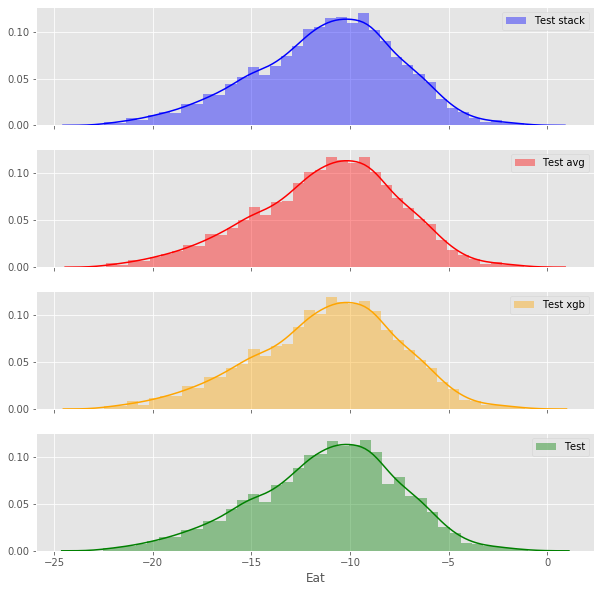

In [459]:
fig, ax = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(10,10))
sns.distplot(y_pred_xgb, ax=ax[2], color='orange', label='Test xgb')
sns.distplot(y_pred_avg, ax=ax[1], color='red', label='Test avg')
sns.distplot(y_pred_stack, ax=ax[0], color='blue', label='Test stack')
sns.distplot(y_test, ax=ax[3], color='green', label='Test')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
ax[2].legend(loc=0)
ax[3].legend(loc=0)
plt.show();

In [462]:
fig.savefig("Predicted_energies.png")

In [73]:
print(" Seconds %0.3f" % (time.time() - start_time))

 Seconds 36212.389


In [100]:
xgb_model2 = XGBRegressor(objective='reg:linear', eval_metric = 'rmse', learning_rate = 0.0625, reg_lambda = 0,
                         max_depth = 6, colsample_bytree = 0.2, min_child_weight = 10, n_estimators = 400)

In [103]:
#WARNING: This takes a very long time to run.
start_time = time.time()
xgb_parameters = {'objective':['reg:squarederror'],
    'eval_metric':['rmse'],
    'learning_rate':[0.0156, 0.0625],
    'reg_lambda' :[0],
    'max_depth' :[6, 8, 10],
    'colsample_bytree':[0.2, 0.4],
    'min_child_weight':[9,10,11],
    'n_estimators':[400,600]
}

xgb_gridsearcher = GridSearchCV(XGBRegressor(), xgb_parameters, verbose=1, n_jobs=-1, cv=5)
xgb_gridsearcher.fit(X_train, y_train)
print(" Seconds %0.3f" % (time.time() - start_time))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 141.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 452.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 882.0min finished


 Seconds 53204.472


In [105]:
grid_data = pd.DataFrame(xgb_gridsearcher .cv_results_)

In [119]:
grid_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_eval_metric,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,...,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,294.038347,11.553681,0.507512,0.084625,0.2,rmse,0.0156,6,9,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999059,0.998777,0.999063,0.999164,0.999183,0.999049,0.000145,40
1,459.409907,14.336957,0.718571,0.288475,0.2,rmse,0.0156,6,9,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999268,0.998993,0.999276,0.999336,0.999370,0.999249,0.000133,14
2,2457.968370,1765.243059,0.473443,0.127449,0.2,rmse,0.0156,6,10,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999057,0.998768,0.999061,0.999162,0.999189,0.999047,0.000149,42
3,1248.653586,1429.168859,0.719830,0.217461,0.2,rmse,0.0156,6,10,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999265,0.998981,0.999276,0.999339,0.999373,0.999247,0.000139,15
4,381.401560,5.582550,0.604744,0.137968,0.2,rmse,0.0156,6,11,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999054,0.998775,0.999062,0.999162,0.999189,0.999049,0.000147,41
5,633.996257,62.220302,0.848202,0.274835,0.2,rmse,0.0156,6,11,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999259,0.999009,0.999272,0.999341,0.999375,0.999251,0.000129,13
6,482.592856,44.507498,0.842158,0.157051,0.2,rmse,0.0156,8,9,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.998928,0.998586,0.998997,0.999118,0.999117,0.998949,0.000196,60
7,563.142867,38.154015,0.617772,0.035911,0.2,rmse,0.0156,8,9,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999051,0.998731,0.999140,0.999233,0.999247,0.999080,0.000189,35
8,330.876423,2.234285,0.439036,0.023050,0.2,rmse,0.0156,8,10,400,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.998939,0.998601,0.998992,0.999122,0.999121,0.998955,0.000191,58
9,491.885414,0.592714,0.606554,0.056945,0.2,rmse,0.0156,8,10,600,...,0,"{'colsample_bytree': 0.2, 'eval_metric': 'rmse...",0.999060,0.998763,0.999146,0.999239,0.999253,0.999092,0.000179,33


In [133]:
grid_data.to_csv("xgboost_grid.csv", index=False)

In [122]:
best_xgb = xgb_gridsearcher.best_estimator_
best_xgb.score(X_test, y_test)

0.9994836812366216

In [123]:
best_xgb.score(X_train, y_train)

0.9999355867391708

In [124]:
xgb_gridsearcher.best_params_

{'colsample_bytree': 0.2,
 'eval_metric': 'rmse',
 'learning_rate': 0.0625,
 'max_depth': 6,
 'min_child_weight': 11,
 'n_estimators': 600,
 'objective': 'reg:squarederror',
 'reg_lambda': 0}

In [125]:
xgb_gridsearcher.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.0625,
             max_delta_step=0, max_depth=6, min_child_weight=11, missing=None,
             n_estimators=600, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [126]:
xgb_gridsearcher.best_score_

0.9993587802175786

In [129]:
xgb_gridsearcher

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,...
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.2, 0.4],
                         'eval_metric': ['rmse'],
                         'learning_rate': [0.0156, 0.0625],
                         'max_depth': [6, 8, 10],
                         'min_child_weight': [9

In [57]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.8,)

In [241]:
X_train_t.shape

(3248, 1275)

In [68]:
start_time = time.time()
lgbm_parameters = {'num_leaves ':[25],
    'n_estimators':[500, 600, 800, 1000],
    'min_child_weight' :[5],
    'max_depth' :[4, 5, 6],
    'learning_rate':[0.1],
    'colsample_bytree':[0.5],
}

lgbm_gridsearcher = GridSearchCV(LGBMRegressor(), lgbm_parameters, verbose=1, n_jobs=3, cv=5)
lgbm_gridsearcher.fit(X_train_t, y_train_t)
print(" Seconds %0.3f" % (time.time() - start_time))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  6.4min
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:  9.4min finished


 Seconds 578.742


In [246]:
lgbm_grid_pred = lgbm_gridsearcher.predict(X_test_t)

In [69]:
lgbm_gridsearcher.best_score_

0.9983985035342086

In [60]:
lgbm_gridsearcher.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
              importance_type='split', learning_rate=0.1, max_depth=4,
              min_child_samples=20, min_child_weight=5, min_split_gain=0.0,
              n_estimators=800, n_jobs=-1, num_leaves=31, num_leaves =25,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [70]:
lgbm_gridsearcher.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 1000,
 'num_leaves ': 25}

In [71]:
lgbm_pred = lgbm_gridsearcher.predict(X_test)

In [99]:
np.sqrt(mean_squared_error(y_test, lgbm_pred))

0.11890758540561278

In [100]:
np.sqrt(mean_squared_error(y_train, lgbm_gridsearcher.predict(X_train)))

0.11743559880089771

In [231]:
lgbm_test = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
              importance_type='split', learning_rate=0.1, max_depth=5,
              min_child_samples=26, min_child_weight=4, min_split_gain=0.0,
              n_estimators=600, n_jobs=1, num_leaves =22,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
lgbm_test.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
              importance_type='split', learning_rate=0.1, max_depth=5,
              min_child_samples=26, min_child_weight=4, min_split_gain=0.0,
              n_estimators=600, n_jobs=1, num_leaves=22, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [232]:
print(lgbm_test.score(X_train, y_train))
print(lgbm_test.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_train, lgbm_test.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, lgbm_test.predict(X_test))))

0.9998503347862701
0.9994541662044745
0.04484047118055909
0.08514101003994058


In [226]:
print(lgbm_test.score(X_train, y_train))
print(lgbm_test.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_train, lgbm_test.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, lgbm_test.predict(X_test))))

0.9998503347862701
0.9994541662044745
0.04484047118055909
0.08514101003994058


In [260]:
xgb_test = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate = 0.0625,
             max_delta_step=0, max_depth = 5, min_child_weight = 9, missing=None,
             n_estimators=1400, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.0625,
             max_delta_step=0, max_depth=5, min_child_weight=9, missing=None,
             n_estimators=1400, n_jobs=-1, nthread=None,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [290]:
val_scores = cross_val_score(xgb_test, X_train.values, y_train.values, cv=5, verbose=1, 
                        n_jobs=3, scoring='neg_mean_squared_error')

print(val_scores)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


[-0.00539602 -0.00746407 -0.00636741 -0.00645354 -0.00691277]


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed: 36.5min finished


In [331]:
np.sqrt((-1* val_scores).mean())

0.08073887049143837

In [ ]:
xgb_test.fit(X_train, y_train)

In [258]:
print(xgb_test.score(X_train, y_train))
print(xgb_test.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_train, xgb_test.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, xgb_test.predict(X_test))))

0.9999629302429097
0.9995727986115007
0.022316166987003092
0.07532253274972717


In [259]:
print(xgb_test.score(X_train, y_train))
print(xgb_test.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_train, xgb_test.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test, xgb_test.predict(X_test))))

0.9999629302429097
0.9995727986115007
0.022316166987003092
0.07532253274972717


In [406]:
stacked_model_final = StackingCVRegressor(
    regressors=[xgb_test, lgbm_test],
    meta_regressor=Ridge()
)
stacked_model_final.fit(X_train, y_train)

StackingCVRegressor(cv=5,
                    meta_regressor=Ridge(alpha=1.0, copy_X=True,
                                         fit_intercept=True, max_iter=None,
                                         normalize=False, random_state=None,
                                         solver='auto', tol=0.001),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
                    refit=True,
                    regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=0.2,
                                             eval_met...
                                              importance_type='split',
                                              learning_rate=0.1, max_depth=5,
                                              min_child_samples=26,
                            

In [420]:
y_pred_stack = stacked_model_final.predict(X_test)
y_pred_stack.shape

(4873,)

In [428]:
stacked_model_final.score(y_test, y_pred_stack)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599', 'f600', 'f601', 'f602', 'f603', 'f604', 'f605', 'f606', 'f607', 'f608', 'f609', 'f610', 'f611', 'f612', 'f613', 'f614', 'f615', 'f616', 'f617', 'f618', 'f619', 'f620', 'f621', 'f622', 'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f629', 'f630', 'f631', 'f632', 'f633', 'f634', 'f635', 'f636', 'f637', 'f638', 'f639', 'f640', 'f641', 'f642', 'f643', 'f644', 'f645', 'f646', 'f647', 'f648', 'f649', 'f650', 'f651', 'f652', 'f653', 'f654', 'f655', 'f656', 'f657', 'f658', 'f659', 'f660', 'f661', 'f662', 'f663', 'f664', 'f665', 'f666', 'f667', 'f668', 'f669', 'f670', 'f671', 'f672', 'f673', 'f674', 'f675', 'f676', 'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685', 'f686', 'f687', 'f688', 'f689', 'f690', 'f691', 'f692', 'f693', 'f694', 'f695', 'f696', 'f697', 'f698', 'f699', 'f700', 'f701', 'f702', 'f703', 'f704', 'f705', 'f706', 'f707', 'f708', 'f709', 'f710', 'f711', 'f712', 'f713', 'f714', 'f715', 'f716', 'f717', 'f718', 'f719', 'f720', 'f721', 'f722', 'f723', 'f724', 'f725', 'f726', 'f727', 'f728', 'f729', 'f730', 'f731', 'f732', 'f733', 'f734', 'f735', 'f736', 'f737', 'f738', 'f739', 'f740', 'f741', 'f742', 'f743', 'f744', 'f745', 'f746', 'f747', 'f748', 'f749', 'f750', 'f751', 'f752', 'f753', 'f754', 'f755', 'f756', 'f757', 'f758', 'f759', 'f760', 'f761', 'f762', 'f763', 'f764', 'f765', 'f766', 'f767', 'f768', 'f769', 'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778', 'f779', 'f780', 'f781', 'f782', 'f783', 'f784', 'f785', 'f786', 'f787', 'f788', 'f789', 'f790', 'f791', 'f792', 'f793', 'f794', 'f795', 'f796', 'f797', 'f798', 'f799', 'f800', 'f801', 'f802', 'f803', 'f804', 'f805', 'f806', 'f807', 'f808', 'f809', 'f810', 'f811', 'f812', 'f813', 'f814', 'f815', 'f816', 'f817', 'f818', 'f819', 'f820', 'f821', 'f822', 'f823', 'f824', 'f825', 'f826', 'f827', 'f828', 'f829', 'f830', 'f831', 'f832', 'f833', 'f834', 'f835', 'f836', 'f837', 'f838', 'f839', 'f840', 'f841', 'f842', 'f843', 'f844', 'f845', 'f846', 'f847', 'f848', 'f849', 'f850', 'f851', 'f852', 'f853', 'f854', 'f855', 'f856', 'f857', 'f858', 'f859', 'f860', 'f861', 'f862', 'f863', 'f864', 'f865', 'f866', 'f867', 'f868', 'f869', 'f870', 'f871', 'f872', 'f873', 'f874', 'f875', 'f876', 'f877', 'f878', 'f879', 'f880', 'f881', 'f882', 'f883', 'f884', 'f885', 'f886', 'f887', 'f888', 'f889', 'f890', 'f891', 'f892', 'f893', 'f894', 'f895', 'f896', 'f897', 'f898', 'f899', 'f900', 'f901', 'f902', 'f903', 'f904', 'f905', 'f906', 'f907', 'f908', 'f909', 'f910', 'f911', 'f912', 'f913', 'f914', 'f915', 'f916', 'f917', 'f918', 'f919', 'f920', 'f921', 'f922', 'f923', 'f924', 'f925', 'f926', 'f927', 'f928', 'f929', 'f930', 'f931', 'f932', 'f933', 'f934', 'f935', 'f936', 'f937', 'f938', 'f939', 'f940', 'f941', 'f942', 'f943', 'f944', 'f945', 'f946', 'f947', 'f948', 'f949', 'f950', 'f951', 'f952', 'f953', 'f954', 'f955', 'f956', 'f957', 'f958', 'f959', 'f960', 'f961', 'f962', 'f963', 'f964', 'f965', 'f966', 'f967', 'f968', 'f969', 'f970', 'f971', 'f972', 'f973', 'f974', 'f975', 'f976', 'f977', 'f978', 'f979', 'f980', 'f981', 'f982', 'f983', 'f984', 'f985', 'f986', 'f987', 'f988', 'f989', 'f990', 'f991', 'f992', 'f993', 'f994', 'f995', 'f996', 'f997', 'f998', 'f999', 'f1000', 'f1001', 'f1002', 'f1003', 'f1004', 'f1005', 'f1006', 'f1007', 'f1008', 'f1009', 'f1010', 'f1011', 'f1012', 'f1013', 'f1014', 'f1015', 'f1016', 'f1017', 'f1018', 'f1019', 'f1020', 'f1021', 'f1022', 'f1023', 'f1024', 'f1025', 'f1026', 'f1027', 'f1028', 'f1029', 'f1030', 'f1031', 'f1032', 'f1033', 'f1034', 'f1035', 'f1036', 'f1037', 'f1038', 'f1039', 'f1040', 'f1041', 'f1042', 'f1043', 'f1044', 'f1045', 'f1046', 'f1047', 'f1048', 'f1049', 'f1050', 'f1051', 'f1052', 'f1053', 'f1054', 'f1055', 'f1056', 'f1057', 'f1058', 'f1059', 'f1060', 'f1061', 'f1062', 'f1063', 'f1064', 'f1065', 'f1066', 'f1067', 'f1068', 'f1069', 'f1070', 'f1071', 'f1072', 'f1073', 'f1074', 'f1075', 'f1076', 'f1077', 'f1078', 'f1079', 'f1080', 'f1081', 'f1082', 'f1083', 'f1084', 'f1085', 'f1086', 'f1087', 'f1088', 'f1089', 'f1090', 'f1091', 'f1092', 'f1093', 'f1094', 'f1095', 'f1096', 'f1097', 'f1098', 'f1099', 'f1100', 'f1101', 'f1102', 'f1103', 'f1104', 'f1105', 'f1106', 'f1107', 'f1108', 'f1109', 'f1110', 'f1111', 'f1112', 'f1113', 'f1114', 'f1115', 'f1116', 'f1117', 'f1118', 'f1119', 'f1120', 'f1121', 'f1122', 'f1123', 'f1124', 'f1125', 'f1126', 'f1127', 'f1128', 'f1129', 'f1130', 'f1131', 'f1132', 'f1133', 'f1134', 'f1135', 'f1136', 'f1137', 'f1138', 'f1139', 'f1140', 'f1141', 'f1142', 'f1143', 'f1144', 'f1145', 'f1146', 'f1147', 'f1148', 'f1149', 'f1150', 'f1151', 'f1152', 'f1153', 'f1154', 'f1155', 'f1156', 'f1157', 'f1158', 'f1159', 'f1160', 'f1161', 'f1162', 'f1163', 'f1164', 'f1165', 'f1166', 'f1167', 'f1168', 'f1169', 'f1170', 'f1171', 'f1172', 'f1173', 'f1174', 'f1175', 'f1176', 'f1177', 'f1178', 'f1179', 'f1180', 'f1181', 'f1182', 'f1183', 'f1184', 'f1185', 'f1186', 'f1187', 'f1188', 'f1189', 'f1190', 'f1191', 'f1192', 'f1193', 'f1194', 'f1195', 'f1196', 'f1197', 'f1198', 'f1199', 'f1200', 'f1201', 'f1202', 'f1203', 'f1204', 'f1205', 'f1206', 'f1207', 'f1208', 'f1209', 'f1210', 'f1211', 'f1212', 'f1213', 'f1214', 'f1215', 'f1216', 'f1217', 'f1218', 'f1219', 'f1220', 'f1221', 'f1222', 'f1223', 'f1224', 'f1225', 'f1226', 'f1227', 'f1228', 'f1229', 'f1230', 'f1231', 'f1232', 'f1233', 'f1234', 'f1235', 'f1236', 'f1237', 'f1238', 'f1239', 'f1240', 'f1241', 'f1242', 'f1243', 'f1244', 'f1245', 'f1246', 'f1247', 'f1248', 'f1249', 'f1250', 'f1251', 'f1252', 'f1253', 'f1254', 'f1255', 'f1256', 'f1257', 'f1258', 'f1259', 'f1260', 'f1261', 'f1262', 'f1263', 'f1264', 'f1265', 'f1266', 'f1267', 'f1268', 'f1269', 'f1270', 'f1271', 'f1272', 'f1273', 'f1274'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599', 'f600', 'f601', 'f602', 'f603', 'f604', 'f605', 'f606', 'f607', 'f608', 'f609', 'f610', 'f611', 'f612', 'f613', 'f614', 'f615', 'f616', 'f617', 'f618', 'f619', 'f620', 'f621', 'f622', 'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f629', 'f630', 'f631', 'f632', 'f633', 'f634', 'f635', 'f636', 'f637', 'f638', 'f639', 'f640', 'f641', 'f642', 'f643', 'f644', 'f645', 'f646', 'f647', 'f648', 'f649', 'f650', 'f651', 'f652', 'f653', 'f654', 'f655', 'f656', 'f657', 'f658', 'f659', 'f660', 'f661', 'f662', 'f663', 'f664', 'f665', 'f666', 'f667', 'f668', 'f669', 'f670', 'f671', 'f672', 'f673', 'f674', 'f675', 'f676', 'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685', 'f686', 'f687', 'f688', 'f689', 'f690', 'f691', 'f692', 'f693', 'f694', 'f695', 'f696', 'f697', 'f698', 'f699', 'f700', 'f701', 'f702', 'f703', 'f704', 'f705', 'f706', 'f707', 'f708', 'f709', 'f710', 'f711', 'f712', 'f713', 'f714', 'f715', 'f716', 'f717', 'f718', 'f719', 'f720', 'f721', 'f722', 'f723', 'f724', 'f725', 'f726', 'f727', 'f728', 'f729', 'f730', 'f731', 'f732', 'f733', 'f734', 'f735', 'f736', 'f737', 'f738', 'f739', 'f740', 'f741', 'f742', 'f743', 'f744', 'f745', 'f746', 'f747', 'f748', 'f749', 'f750', 'f751', 'f752', 'f753', 'f754', 'f755', 'f756', 'f757', 'f758', 'f759', 'f760', 'f761', 'f762', 'f763', 'f764', 'f765', 'f766', 'f767', 'f768', 'f769', 'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778', 'f779', 'f780', 'f781', 'f782', 'f783', 'f784', 'f785', 'f786', 'f787', 'f788', 'f789', 'f790', 'f791', 'f792', 'f793', 'f794', 'f795', 'f796', 'f797', 'f798', 'f799', 'f800', 'f801', 'f802', 'f803', 'f804', 'f805', 'f806', 'f807', 'f808', 'f809', 'f810', 'f811', 'f812', 'f813', 'f814', 'f815', 'f816', 'f817', 'f818', 'f819', 'f820', 'f821', 'f822', 'f823', 'f824', 'f825', 'f826', 'f827', 'f828', 'f829', 'f830', 'f831', 'f832', 'f833', 'f834', 'f835', 'f836', 'f837', 'f838', 'f839', 'f840', 'f841', 'f842', 'f843', 'f844', 'f845', 'f846', 'f847', 'f848', 'f849', 'f850', 'f851', 'f852', 'f853', 'f854', 'f855', 'f856', 'f857', 'f858', 'f859', 'f860', 'f861', 'f862', 'f863', 'f864', 'f865', 'f866', 'f867', 'f868', 'f869', 'f870', 'f871', 'f872', 'f873', 'f874', 'f875', 'f876', 'f877', 'f878', 'f879', 'f880', 'f881', 'f882', 'f883', 'f884', 'f885', 'f886', 'f887', 'f888', 'f889', 'f890', 'f891', 'f892', 'f893', 'f894', 'f895', 'f896', 'f897', 'f898', 'f899', 'f900', 'f901', 'f902', 'f903', 'f904', 'f905', 'f906', 'f907', 'f908', 'f909', 'f910', 'f911', 'f912', 'f913', 'f914', 'f915', 'f916', 'f917', 'f918', 'f919', 'f920', 'f921', 'f922', 'f923', 'f924', 'f925', 'f926', 'f927', 'f928', 'f929', 'f930', 'f931', 'f932', 'f933', 'f934', 'f935', 'f936', 'f937', 'f938', 'f939', 'f940', 'f941', 'f942', 'f943', 'f944', 'f945', 'f946', 'f947', 'f948', 'f949', 'f950', 'f951', 'f952', 'f953', 'f954', 'f955', 'f956', 'f957', 'f958', 'f959', 'f960', 'f961', 'f962', 'f963', 'f964', 'f965', 'f966', 'f967', 'f968', 'f969', 'f970', 'f971', 'f972', 'f973', 'f974', 'f975', 'f976', 'f977', 'f978', 'f979', 'f980', 'f981', 'f982', 'f983', 'f984', 'f985', 'f986', 'f987', 'f988', 'f989', 'f990', 'f991', 'f992', 'f993', 'f994', 'f995', 'f996', 'f997', 'f998', 'f999', 'f1000', 'f1001', 'f1002', 'f1003', 'f1004', 'f1005', 'f1006', 'f1007', 'f1008', 'f1009', 'f1010', 'f1011', 'f1012', 'f1013', 'f1014', 'f1015', 'f1016', 'f1017', 'f1018', 'f1019', 'f1020', 'f1021', 'f1022', 'f1023', 'f1024', 'f1025', 'f1026', 'f1027', 'f1028', 'f1029', 'f1030', 'f1031', 'f1032', 'f1033', 'f1034', 'f1035', 'f1036', 'f1037', 'f1038', 'f1039', 'f1040', 'f1041', 'f1042', 'f1043', 'f1044', 'f1045', 'f1046', 'f1047', 'f1048', 'f1049', 'f1050', 'f1051', 'f1052', 'f1053', 'f1054', 'f1055', 'f1056', 'f1057', 'f1058', 'f1059', 'f1060', 'f1061', 'f1062', 'f1063', 'f1064', 'f1065', 'f1066', 'f1067', 'f1068', 'f1069', 'f1070', 'f1071', 'f1072', 'f1073', 'f1074', 'f1075', 'f1076', 'f1077', 'f1078', 'f1079', 'f1080', 'f1081', 'f1082', 'f1083', 'f1084', 'f1085', 'f1086', 'f1087', 'f1088', 'f1089', 'f1090', 'f1091', 'f1092', 'f1093', 'f1094', 'f1095', 'f1096', 'f1097', 'f1098', 'f1099', 'f1100', 'f1101', 'f1102', 'f1103', 'f1104', 'f1105', 'f1106', 'f1107', 'f1108', 'f1109', 'f1110', 'f1111', 'f1112', 'f1113', 'f1114', 'f1115', 'f1116', 'f1117', 'f1118', 'f1119', 'f1120', 'f1121', 'f1122', 'f1123', 'f1124', 'f1125', 'f1126', 'f1127', 'f1128', 'f1129', 'f1130', 'f1131', 'f1132', 'f1133', 'f1134', 'f1135', 'f1136', 'f1137', 'f1138', 'f1139', 'f1140', 'f1141', 'f1142', 'f1143', 'f1144', 'f1145', 'f1146', 'f1147', 'f1148', 'f1149', 'f1150', 'f1151', 'f1152', 'f1153', 'f1154', 'f1155', 'f1156', 'f1157', 'f1158', 'f1159', 'f1160', 'f1161', 'f1162', 'f1163', 'f1164', 'f1165', 'f1166', 'f1167', 'f1168', 'f1169', 'f1170', 'f1171', 'f1172', 'f1173', 'f1174', 'f1175', 'f1176', 'f1177', 'f1178', 'f1179', 'f1180', 'f1181', 'f1182', 'f1183', 'f1184', 'f1185', 'f1186', 'f1187', 'f1188', 'f1189', 'f1190', 'f1191', 'f1192', 'f1193', 'f1194', 'f1195', 'f1196', 'f1197', 'f1198', 'f1199', 'f1200', 'f1201', 'f1202', 'f1203', 'f1204', 'f1205', 'f1206', 'f1207', 'f1208', 'f1209', 'f1210', 'f1211', 'f1212', 'f1213', 'f1214', 'f1215', 'f1216', 'f1217', 'f1218', 'f1219', 'f1220', 'f1221', 'f1222', 'f1223', 'f1224', 'f1225', 'f1226', 'f1227', 'f1228', 'f1229', 'f1230', 'f1231', 'f1232', 'f1233', 'f1234', 'f1235', 'f1236', 'f1237', 'f1238', 'f1239', 'f1240', 'f1241', 'f1242', 'f1243', 'f1244', 'f1245', 'f1246', 'f1247', 'f1248', 'f1249', 'f1250', 'f1251', 'f1252', 'f1253', 'f1254', 'f1255', 'f1256', 'f1257', 'f1258', 'f1259', 'f1260', 'f1261', 'f1262', 'f1263', 'f1264', 'f1265', 'f1266', 'f1267', 'f1268', 'f1269', 'f1270', 'f1271', 'f1272', 'f1273', 'f1274', 'f1275', 'f1276', 'f1277', 'f1278', 'f1279', 'f1280', 'f1281', 'f1282', 'f1283', 'f1284', 'f1285', 'f1286', 'f1287', 'f1288', 'f1289', 'f1290', 'f1291', 'f1292', 'f1293', 'f1294', 'f1295', 'f1296', 'f1297', 'f1298', 'f1299', 'f1300', 'f1301', 'f1302', 'f1303', 'f1304', 'f1305', 'f1306', 'f1307', 'f1308', 'f1309', 'f1310', 'f1311', 'f1312', 'f1313', 'f1314', 'f1315', 'f1316', 'f1317', 'f1318', 'f1319', 'f1320', 'f1321', 'f1322', 'f1323', 'f1324', 'f1325', 'f1326', 'f1327', 'f1328', 'f1329', 'f1330', 'f1331', 'f1332', 'f1333', 'f1334', 'f1335', 'f1336', 'f1337', 'f1338', 'f1339', 'f1340', 'f1341', 'f1342', 'f1343', 'f1344', 'f1345', 'f1346', 'f1347', 'f1348', 'f1349', 'f1350', 'f1351', 'f1352', 'f1353', 'f1354', 'f1355', 'f1356', 'f1357', 'f1358', 'f1359', 'f1360', 'f1361', 'f1362', 'f1363', 'f1364', 'f1365', 'f1366', 'f1367', 'f1368', 'f1369', 'f1370', 'f1371', 'f1372', 'f1373', 'f1374', 'f1375', 'f1376', 'f1377', 'f1378', 'f1379', 'f1380', 'f1381', 'f1382', 'f1383', 'f1384', 'f1385', 'f1386', 'f1387', 'f1388', 'f1389', 'f1390', 'f1391', 'f1392', 'f1393', 'f1394', 'f1395', 'f1396', 'f1397', 'f1398', 'f1399', 'f1400', 'f1401', 'f1402', 'f1403', 'f1404', 'f1405', 'f1406', 'f1407', 'f1408', 'f1409', 'f1410', 'f1411', 'f1412', 'f1413', 'f1414', 'f1415', 'f1416', 'f1417', 'f1418', 'f1419', 'f1420', 'f1421', 'f1422', 'f1423', 'f1424', 'f1425', 'f1426', 'f1427', 'f1428', 'f1429', 'f1430', 'f1431', 'f1432', 'f1433', 'f1434', 'f1435', 'f1436', 'f1437', 'f1438', 'f1439', 'f1440', 'f1441', 'f1442', 'f1443', 'f1444', 'f1445', 'f1446', 'f1447', 'f1448', 'f1449', 'f1450', 'f1451', 'f1452', 'f1453', 'f1454', 'f1455', 'f1456', 'f1457', 'f1458', 'f1459', 'f1460', 'f1461', 'f1462', 'f1463', 'f1464', 'f1465', 'f1466', 'f1467', 'f1468', 'f1469', 'f1470', 'f1471', 'f1472', 'f1473', 'f1474', 'f1475', 'f1476', 'f1477', 'f1478', 'f1479', 'f1480', 'f1481', 'f1482', 'f1483', 'f1484', 'f1485', 'f1486', 'f1487', 'f1488', 'f1489', 'f1490', 'f1491', 'f1492', 'f1493', 'f1494', 'f1495', 'f1496', 'f1497', 'f1498', 'f1499', 'f1500', 'f1501', 'f1502', 'f1503', 'f1504', 'f1505', 'f1506', 'f1507', 'f1508', 'f1509', 'f1510', 'f1511', 'f1512', 'f1513', 'f1514', 'f1515', 'f1516', 'f1517', 'f1518', 'f1519', 'f1520', 'f1521', 'f1522', 'f1523', 'f1524', 'f1525', 'f1526', 'f1527', 'f1528', 'f1529', 'f1530', 'f1531', 'f1532', 'f1533', 'f1534', 'f1535', 'f1536', 'f1537', 'f1538', 'f1539', 'f1540', 'f1541', 'f1542', 'f1543', 'f1544', 'f1545', 'f1546', 'f1547', 'f1548', 'f1549', 'f1550', 'f1551', 'f1552', 'f1553', 'f1554', 'f1555', 'f1556', 'f1557', 'f1558', 'f1559', 'f1560', 'f1561', 'f1562', 'f1563', 'f1564', 'f1565', 'f1566', 'f1567', 'f1568', 'f1569', 'f1570', 'f1571', 'f1572', 'f1573', 'f1574', 'f1575', 'f1576', 'f1577', 'f1578', 'f1579', 'f1580', 'f1581', 'f1582', 'f1583', 'f1584', 'f1585', 'f1586', 'f1587', 'f1588', 'f1589', 'f1590', 'f1591', 'f1592', 'f1593', 'f1594', 'f1595', 'f1596', 'f1597', 'f1598', 'f1599', 'f1600', 'f1601', 'f1602', 'f1603', 'f1604', 'f1605', 'f1606', 'f1607', 'f1608', 'f1609', 'f1610', 'f1611', 'f1612', 'f1613', 'f1614', 'f1615', 'f1616', 'f1617', 'f1618', 'f1619', 'f1620', 'f1621', 'f1622', 'f1623', 'f1624', 'f1625', 'f1626', 'f1627', 'f1628', 'f1629', 'f1630', 'f1631', 'f1632', 'f1633', 'f1634', 'f1635', 'f1636', 'f1637', 'f1638', 'f1639', 'f1640', 'f1641', 'f1642', 'f1643', 'f1644', 'f1645', 'f1646', 'f1647', 'f1648', 'f1649', 'f1650', 'f1651', 'f1652', 'f1653', 'f1654', 'f1655', 'f1656', 'f1657', 'f1658', 'f1659', 'f1660', 'f1661', 'f1662', 'f1663', 'f1664', 'f1665', 'f1666', 'f1667', 'f1668', 'f1669', 'f1670', 'f1671', 'f1672', 'f1673', 'f1674', 'f1675', 'f1676', 'f1677', 'f1678', 'f1679', 'f1680', 'f1681', 'f1682', 'f1683', 'f1684', 'f1685', 'f1686', 'f1687', 'f1688', 'f1689', 'f1690', 'f1691', 'f1692', 'f1693', 'f1694', 'f1695', 'f1696', 'f1697', 'f1698', 'f1699', 'f1700', 'f1701', 'f1702', 'f1703', 'f1704', 'f1705', 'f1706', 'f1707', 'f1708', 'f1709', 'f1710', 'f1711', 'f1712', 'f1713', 'f1714', 'f1715', 'f1716', 'f1717', 'f1718', 'f1719', 'f1720', 'f1721', 'f1722', 'f1723', 'f1724', 'f1725', 'f1726', 'f1727', 'f1728', 'f1729', 'f1730', 'f1731', 'f1732', 'f1733', 'f1734', 'f1735', 'f1736', 'f1737', 'f1738', 'f1739', 'f1740', 'f1741', 'f1742', 'f1743', 'f1744', 'f1745', 'f1746', 'f1747', 'f1748', 'f1749', 'f1750', 'f1751', 'f1752', 'f1753', 'f1754', 'f1755', 'f1756', 'f1757', 'f1758', 'f1759', 'f1760', 'f1761', 'f1762', 'f1763', 'f1764', 'f1765', 'f1766', 'f1767', 'f1768', 'f1769', 'f1770', 'f1771', 'f1772', 'f1773', 'f1774', 'f1775', 'f1776', 'f1777', 'f1778', 'f1779', 'f1780', 'f1781', 'f1782', 'f1783', 'f1784', 'f1785', 'f1786', 'f1787', 'f1788', 'f1789', 'f1790', 'f1791', 'f1792', 'f1793', 'f1794', 'f1795', 'f1796', 'f1797', 'f1798', 'f1799', 'f1800', 'f1801', 'f1802', 'f1803', 'f1804', 'f1805', 'f1806', 'f1807', 'f1808', 'f1809', 'f1810', 'f1811', 'f1812', 'f1813', 'f1814', 'f1815', 'f1816', 'f1817', 'f1818', 'f1819', 'f1820', 'f1821', 'f1822', 'f1823', 'f1824', 'f1825', 'f1826', 'f1827', 'f1828', 'f1829', 'f1830', 'f1831', 'f1832', 'f1833', 'f1834', 'f1835', 'f1836', 'f1837', 'f1838', 'f1839', 'f1840', 'f1841', 'f1842', 'f1843', 'f1844', 'f1845', 'f1846', 'f1847', 'f1848', 'f1849', 'f1850', 'f1851', 'f1852', 'f1853', 'f1854', 'f1855', 'f1856', 'f1857', 'f1858', 'f1859', 'f1860', 'f1861', 'f1862', 'f1863', 'f1864', 'f1865', 'f1866', 'f1867', 'f1868', 'f1869', 'f1870', 'f1871', 'f1872', 'f1873', 'f1874', 'f1875', 'f1876', 'f1877', 'f1878', 'f1879', 'f1880', 'f1881', 'f1882', 'f1883', 'f1884', 'f1885', 'f1886', 'f1887', 'f1888', 'f1889', 'f1890', 'f1891', 'f1892', 'f1893', 'f1894', 'f1895', 'f1896', 'f1897', 'f1898', 'f1899', 'f1900', 'f1901', 'f1902', 'f1903', 'f1904', 'f1905', 'f1906', 'f1907', 'f1908', 'f1909', 'f1910', 'f1911', 'f1912', 'f1913', 'f1914', 'f1915', 'f1916', 'f1917', 'f1918', 'f1919', 'f1920', 'f1921', 'f1922', 'f1923', 'f1924', 'f1925', 'f1926', 'f1927', 'f1928', 'f1929', 'f1930', 'f1931', 'f1932', 'f1933', 'f1934', 'f1935', 'f1936', 'f1937', 'f1938', 'f1939', 'f1940', 'f1941', 'f1942', 'f1943', 'f1944', 'f1945', 'f1946', 'f1947', 'f1948', 'f1949', 'f1950', 'f1951', 'f1952', 'f1953', 'f1954', 'f1955', 'f1956', 'f1957', 'f1958', 'f1959', 'f1960', 'f1961', 'f1962', 'f1963', 'f1964', 'f1965', 'f1966', 'f1967', 'f1968', 'f1969', 'f1970', 'f1971', 'f1972', 'f1973', 'f1974', 'f1975', 'f1976', 'f1977', 'f1978', 'f1979', 'f1980', 'f1981', 'f1982', 'f1983', 'f1984', 'f1985', 'f1986', 'f1987', 'f1988', 'f1989', 'f1990', 'f1991', 'f1992', 'f1993', 'f1994', 'f1995', 'f1996', 'f1997', 'f1998', 'f1999', 'f2000', 'f2001', 'f2002', 'f2003', 'f2004', 'f2005', 'f2006', 'f2007', 'f2008', 'f2009', 'f2010', 'f2011', 'f2012', 'f2013', 'f2014', 'f2015', 'f2016', 'f2017', 'f2018', 'f2019', 'f2020', 'f2021', 'f2022', 'f2023', 'f2024', 'f2025', 'f2026', 'f2027', 'f2028', 'f2029', 'f2030', 'f2031', 'f2032', 'f2033', 'f2034', 'f2035', 'f2036', 'f2037', 'f2038', 'f2039', 'f2040', 'f2041', 'f2042', 'f2043', 'f2044', 'f2045', 'f2046', 'f2047', 'f2048', 'f2049', 'f2050', 'f2051', 'f2052', 'f2053', 'f2054', 'f2055', 'f2056', 'f2057', 'f2058', 'f2059', 'f2060', 'f2061', 'f2062', 'f2063', 'f2064', 'f2065', 'f2066', 'f2067', 'f2068', 'f2069', 'f2070', 'f2071', 'f2072', 'f2073', 'f2074', 'f2075', 'f2076', 'f2077', 'f2078', 'f2079', 'f2080', 'f2081', 'f2082', 'f2083', 'f2084', 'f2085', 'f2086', 'f2087', 'f2088', 'f2089', 'f2090', 'f2091', 'f2092', 'f2093', 'f2094', 'f2095', 'f2096', 'f2097', 'f2098', 'f2099', 'f2100', 'f2101', 'f2102', 'f2103', 'f2104', 'f2105', 'f2106', 'f2107', 'f2108', 'f2109', 'f2110', 'f2111', 'f2112', 'f2113', 'f2114', 'f2115', 'f2116', 'f2117', 'f2118', 'f2119', 'f2120', 'f2121', 'f2122', 'f2123', 'f2124', 'f2125', 'f2126', 'f2127', 'f2128', 'f2129', 'f2130', 'f2131', 'f2132', 'f2133', 'f2134', 'f2135', 'f2136', 'f2137', 'f2138', 'f2139', 'f2140', 'f2141', 'f2142', 'f2143', 'f2144', 'f2145', 'f2146', 'f2147', 'f2148', 'f2149', 'f2150', 'f2151', 'f2152', 'f2153', 'f2154', 'f2155', 'f2156', 'f2157', 'f2158', 'f2159', 'f2160', 'f2161', 'f2162', 'f2163', 'f2164', 'f2165', 'f2166', 'f2167', 'f2168', 'f2169', 'f2170', 'f2171', 'f2172', 'f2173', 'f2174', 'f2175', 'f2176', 'f2177', 'f2178', 'f2179', 'f2180', 'f2181', 'f2182', 'f2183', 'f2184', 'f2185', 'f2186', 'f2187', 'f2188', 'f2189', 'f2190', 'f2191', 'f2192', 'f2193', 'f2194', 'f2195', 'f2196', 'f2197', 'f2198', 'f2199', 'f2200', 'f2201', 'f2202', 'f2203', 'f2204', 'f2205', 'f2206', 'f2207', 'f2208', 'f2209', 'f2210', 'f2211', 'f2212', 'f2213', 'f2214', 'f2215', 'f2216', 'f2217', 'f2218', 'f2219', 'f2220', 'f2221', 'f2222', 'f2223', 'f2224', 'f2225', 'f2226', 'f2227', 'f2228', 'f2229', 'f2230', 'f2231', 'f2232', 'f2233', 'f2234', 'f2235', 'f2236', 'f2237', 'f2238', 'f2239', 'f2240', 'f2241', 'f2242', 'f2243', 'f2244', 'f2245', 'f2246', 'f2247', 'f2248', 'f2249', 'f2250', 'f2251', 'f2252', 'f2253', 'f2254', 'f2255', 'f2256', 'f2257', 'f2258', 'f2259', 'f2260', 'f2261', 'f2262', 'f2263', 'f2264', 'f2265', 'f2266', 'f2267', 'f2268', 'f2269', 'f2270', 'f2271', 'f2272', 'f2273', 'f2274', 'f2275', 'f2276', 'f2277', 'f2278', 'f2279', 'f2280', 'f2281', 'f2282', 'f2283', 'f2284', 'f2285', 'f2286', 'f2287', 'f2288', 'f2289', 'f2290', 'f2291', 'f2292', 'f2293', 'f2294', 'f2295', 'f2296', 'f2297', 'f2298', 'f2299', 'f2300', 'f2301', 'f2302', 'f2303', 'f2304', 'f2305', 'f2306', 'f2307', 'f2308', 'f2309', 'f2310', 'f2311', 'f2312', 'f2313', 'f2314', 'f2315', 'f2316', 'f2317', 'f2318', 'f2319', 'f2320', 'f2321', 'f2322', 'f2323', 'f2324', 'f2325', 'f2326', 'f2327', 'f2328', 'f2329', 'f2330', 'f2331', 'f2332', 'f2333', 'f2334', 'f2335', 'f2336', 'f2337', 'f2338', 'f2339', 'f2340', 'f2341', 'f2342', 'f2343', 'f2344', 'f2345', 'f2346', 'f2347', 'f2348', 'f2349', 'f2350', 'f2351', 'f2352', 'f2353', 'f2354', 'f2355', 'f2356', 'f2357', 'f2358', 'f2359', 'f2360', 'f2361', 'f2362', 'f2363', 'f2364', 'f2365', 'f2366', 'f2367', 'f2368', 'f2369', 'f2370', 'f2371', 'f2372', 'f2373', 'f2374', 'f2375', 'f2376', 'f2377', 'f2378', 'f2379', 'f2380', 'f2381', 'f2382', 'f2383', 'f2384', 'f2385', 'f2386', 'f2387', 'f2388', 'f2389', 'f2390', 'f2391', 'f2392', 'f2393', 'f2394', 'f2395', 'f2396', 'f2397', 'f2398', 'f2399', 'f2400', 'f2401', 'f2402', 'f2403', 'f2404', 'f2405', 'f2406', 'f2407', 'f2408', 'f2409', 'f2410', 'f2411', 'f2412', 'f2413', 'f2414', 'f2415', 'f2416', 'f2417', 'f2418', 'f2419', 'f2420', 'f2421', 'f2422', 'f2423', 'f2424', 'f2425', 'f2426', 'f2427', 'f2428', 'f2429', 'f2430', 'f2431', 'f2432', 'f2433', 'f2434', 'f2435', 'f2436', 'f2437', 'f2438', 'f2439', 'f2440', 'f2441', 'f2442', 'f2443', 'f2444', 'f2445', 'f2446', 'f2447', 'f2448', 'f2449', 'f2450', 'f2451', 'f2452', 'f2453', 'f2454', 'f2455', 'f2456', 'f2457', 'f2458', 'f2459', 'f2460', 'f2461', 'f2462', 'f2463', 'f2464', 'f2465', 'f2466', 'f2467', 'f2468', 'f2469', 'f2470', 'f2471', 'f2472', 'f2473', 'f2474', 'f2475', 'f2476', 'f2477', 'f2478', 'f2479', 'f2480', 'f2481', 'f2482', 'f2483', 'f2484', 'f2485', 'f2486', 'f2487', 'f2488', 'f2489', 'f2490', 'f2491', 'f2492', 'f2493', 'f2494', 'f2495', 'f2496', 'f2497', 'f2498', 'f2499', 'f2500', 'f2501', 'f2502', 'f2503', 'f2504', 'f2505', 'f2506', 'f2507', 'f2508', 'f2509', 'f2510', 'f2511', 'f2512', 'f2513', 'f2514', 'f2515', 'f2516', 'f2517', 'f2518', 'f2519', 'f2520', 'f2521', 'f2522', 'f2523', 'f2524', 'f2525', 'f2526', 'f2527', 'f2528', 'f2529', 'f2530', 'f2531', 'f2532', 'f2533', 'f2534', 'f2535', 'f2536', 'f2537', 'f2538', 'f2539', 'f2540', 'f2541', 'f2542', 'f2543', 'f2544', 'f2545', 'f2546', 'f2547', 'f2548', 'f2549', 'f2550', 'f2551', 'f2552', 'f2553', 'f2554', 'f2555', 'f2556', 'f2557', 'f2558', 'f2559', 'f2560', 'f2561', 'f2562', 'f2563', 'f2564', 'f2565', 'f2566', 'f2567', 'f2568', 'f2569', 'f2570', 'f2571', 'f2572', 'f2573', 'f2574', 'f2575', 'f2576', 'f2577', 'f2578', 'f2579', 'f2580', 'f2581', 'f2582', 'f2583', 'f2584', 'f2585', 'f2586', 'f2587', 'f2588', 'f2589', 'f2590', 'f2591', 'f2592', 'f2593', 'f2594', 'f2595', 'f2596', 'f2597', 'f2598', 'f2599', 'f2600', 'f2601', 'f2602', 'f2603', 'f2604', 'f2605', 'f2606', 'f2607', 'f2608', 'f2609', 'f2610', 'f2611', 'f2612', 'f2613', 'f2614', 'f2615', 'f2616', 'f2617', 'f2618', 'f2619', 'f2620', 'f2621', 'f2622', 'f2623', 'f2624', 'f2625', 'f2626', 'f2627', 'f2628', 'f2629', 'f2630', 'f2631', 'f2632', 'f2633', 'f2634', 'f2635', 'f2636', 'f2637', 'f2638', 'f2639', 'f2640', 'f2641', 'f2642', 'f2643', 'f2644', 'f2645', 'f2646', 'f2647', 'f2648', 'f2649', 'f2650', 'f2651', 'f2652', 'f2653', 'f2654', 'f2655', 'f2656', 'f2657', 'f2658', 'f2659', 'f2660', 'f2661', 'f2662', 'f2663', 'f2664', 'f2665', 'f2666', 'f2667', 'f2668', 'f2669', 'f2670', 'f2671', 'f2672', 'f2673', 'f2674', 'f2675', 'f2676', 'f2677', 'f2678', 'f2679', 'f2680', 'f2681', 'f2682', 'f2683', 'f2684', 'f2685', 'f2686', 'f2687', 'f2688', 'f2689', 'f2690', 'f2691', 'f2692', 'f2693', 'f2694', 'f2695', 'f2696', 'f2697', 'f2698', 'f2699', 'f2700', 'f2701', 'f2702', 'f2703', 'f2704', 'f2705', 'f2706', 'f2707', 'f2708', 'f2709', 'f2710', 'f2711', 'f2712', 'f2713', 'f2714', 'f2715', 'f2716', 'f2717', 'f2718', 'f2719', 'f2720', 'f2721', 'f2722', 'f2723', 'f2724', 'f2725', 'f2726', 'f2727', 'f2728', 'f2729', 'f2730', 'f2731', 'f2732', 'f2733', 'f2734', 'f2735', 'f2736', 'f2737', 'f2738', 'f2739', 'f2740', 'f2741', 'f2742', 'f2743', 'f2744', 'f2745', 'f2746', 'f2747', 'f2748', 'f2749', 'f2750', 'f2751', 'f2752', 'f2753', 'f2754', 'f2755', 'f2756', 'f2757', 'f2758', 'f2759', 'f2760', 'f2761', 'f2762', 'f2763', 'f2764', 'f2765', 'f2766', 'f2767', 'f2768', 'f2769', 'f2770', 'f2771', 'f2772', 'f2773', 'f2774', 'f2775', 'f2776', 'f2777', 'f2778', 'f2779', 'f2780', 'f2781', 'f2782', 'f2783', 'f2784', 'f2785', 'f2786', 'f2787', 'f2788', 'f2789', 'f2790', 'f2791', 'f2792', 'f2793', 'f2794', 'f2795', 'f2796', 'f2797', 'f2798', 'f2799', 'f2800', 'f2801', 'f2802', 'f2803', 'f2804', 'f2805', 'f2806', 'f2807', 'f2808', 'f2809', 'f2810', 'f2811', 'f2812', 'f2813', 'f2814', 'f2815', 'f2816', 'f2817', 'f2818', 'f2819', 'f2820', 'f2821', 'f2822', 'f2823', 'f2824', 'f2825', 'f2826', 'f2827', 'f2828', 'f2829', 'f2830', 'f2831', 'f2832', 'f2833', 'f2834', 'f2835', 'f2836', 'f2837', 'f2838', 'f2839', 'f2840', 'f2841', 'f2842', 'f2843', 'f2844', 'f2845', 'f2846', 'f2847', 'f2848', 'f2849', 'f2850', 'f2851', 'f2852', 'f2853', 'f2854', 'f2855', 'f2856', 'f2857', 'f2858', 'f2859', 'f2860', 'f2861', 'f2862', 'f2863', 'f2864', 'f2865', 'f2866', 'f2867', 'f2868', 'f2869', 'f2870', 'f2871', 'f2872', 'f2873', 'f2874', 'f2875', 'f2876', 'f2877', 'f2878', 'f2879', 'f2880', 'f2881', 'f2882', 'f2883', 'f2884', 'f2885', 'f2886', 'f2887', 'f2888', 'f2889', 'f2890', 'f2891', 'f2892', 'f2893', 'f2894', 'f2895', 'f2896', 'f2897', 'f2898', 'f2899', 'f2900', 'f2901', 'f2902', 'f2903', 'f2904', 'f2905', 'f2906', 'f2907', 'f2908', 'f2909', 'f2910', 'f2911', 'f2912', 'f2913', 'f2914', 'f2915', 'f2916', 'f2917', 'f2918', 'f2919', 'f2920', 'f2921', 'f2922', 'f2923', 'f2924', 'f2925', 'f2926', 'f2927', 'f2928', 'f2929', 'f2930', 'f2931', 'f2932', 'f2933', 'f2934', 'f2935', 'f2936', 'f2937', 'f2938', 'f2939', 'f2940', 'f2941', 'f2942', 'f2943', 'f2944', 'f2945', 'f2946', 'f2947', 'f2948', 'f2949', 'f2950', 'f2951', 'f2952', 'f2953', 'f2954', 'f2955', 'f2956', 'f2957', 'f2958', 'f2959', 'f2960', 'f2961', 'f2962', 'f2963', 'f2964', 'f2965', 'f2966', 'f2967', 'f2968', 'f2969', 'f2970', 'f2971', 'f2972', 'f2973', 'f2974', 'f2975', 'f2976', 'f2977', 'f2978', 'f2979', 'f2980', 'f2981', 'f2982', 'f2983', 'f2984', 'f2985', 'f2986', 'f2987', 'f2988', 'f2989', 'f2990', 'f2991', 'f2992', 'f2993', 'f2994', 'f2995', 'f2996', 'f2997', 'f2998', 'f2999', 'f3000', 'f3001', 'f3002', 'f3003', 'f3004', 'f3005', 'f3006', 'f3007', 'f3008', 'f3009', 'f3010', 'f3011', 'f3012', 'f3013', 'f3014', 'f3015', 'f3016', 'f3017', 'f3018', 'f3019', 'f3020', 'f3021', 'f3022', 'f3023', 'f3024', 'f3025', 'f3026', 'f3027', 'f3028', 'f3029', 'f3030', 'f3031', 'f3032', 'f3033', 'f3034', 'f3035', 'f3036', 'f3037', 'f3038', 'f3039', 'f3040', 'f3041', 'f3042', 'f3043', 'f3044', 'f3045', 'f3046', 'f3047', 'f3048', 'f3049', 'f3050', 'f3051', 'f3052', 'f3053', 'f3054', 'f3055', 'f3056', 'f3057', 'f3058', 'f3059', 'f3060', 'f3061', 'f3062', 'f3063', 'f3064', 'f3065', 'f3066', 'f3067', 'f3068', 'f3069', 'f3070', 'f3071', 'f3072', 'f3073', 'f3074', 'f3075', 'f3076', 'f3077', 'f3078', 'f3079', 'f3080', 'f3081', 'f3082', 'f3083', 'f3084', 'f3085', 'f3086', 'f3087', 'f3088', 'f3089', 'f3090', 'f3091', 'f3092', 'f3093', 'f3094', 'f3095', 'f3096', 'f3097', 'f3098', 'f3099', 'f3100', 'f3101', 'f3102', 'f3103', 'f3104', 'f3105', 'f3106', 'f3107', 'f3108', 'f3109', 'f3110', 'f3111', 'f3112', 'f3113', 'f3114', 'f3115', 'f3116', 'f3117', 'f3118', 'f3119', 'f3120', 'f3121', 'f3122', 'f3123', 'f3124', 'f3125', 'f3126', 'f3127', 'f3128', 'f3129', 'f3130', 'f3131', 'f3132', 'f3133', 'f3134', 'f3135', 'f3136', 'f3137', 'f3138', 'f3139', 'f3140', 'f3141', 'f3142', 'f3143', 'f3144', 'f3145', 'f3146', 'f3147', 'f3148', 'f3149', 'f3150', 'f3151', 'f3152', 'f3153', 'f3154', 'f3155', 'f3156', 'f3157', 'f3158', 'f3159', 'f3160', 'f3161', 'f3162', 'f3163', 'f3164', 'f3165', 'f3166', 'f3167', 'f3168', 'f3169', 'f3170', 'f3171', 'f3172', 'f3173', 'f3174', 'f3175', 'f3176', 'f3177', 'f3178', 'f3179', 'f3180', 'f3181', 'f3182', 'f3183', 'f3184', 'f3185', 'f3186', 'f3187', 'f3188', 'f3189', 'f3190', 'f3191', 'f3192', 'f3193', 'f3194', 'f3195', 'f3196', 'f3197', 'f3198', 'f3199', 'f3200', 'f3201', 'f3202', 'f3203', 'f3204', 'f3205', 'f3206', 'f3207', 'f3208', 'f3209', 'f3210', 'f3211', 'f3212', 'f3213', 'f3214', 'f3215', 'f3216', 'f3217', 'f3218', 'f3219', 'f3220', 'f3221', 'f3222', 'f3223', 'f3224', 'f3225', 'f3226', 'f3227', 'f3228', 'f3229', 'f3230', 'f3231', 'f3232', 'f3233', 'f3234', 'f3235', 'f3236', 'f3237', 'f3238', 'f3239', 'f3240', 'f3241', 'f3242', 'f3243', 'f3244', 'f3245', 'f3246', 'f3247', 'f3248', 'f3249', 'f3250', 'f3251', 'f3252', 'f3253', 'f3254', 'f3255', 'f3256', 'f3257', 'f3258', 'f3259', 'f3260', 'f3261', 'f3262', 'f3263', 'f3264', 'f3265', 'f3266', 'f3267', 'f3268', 'f3269', 'f3270', 'f3271', 'f3272', 'f3273', 'f3274', 'f3275', 'f3276', 'f3277', 'f3278', 'f3279', 'f3280', 'f3281', 'f3282', 'f3283', 'f3284', 'f3285', 'f3286', 'f3287', 'f3288', 'f3289', 'f3290', 'f3291', 'f3292', 'f3293', 'f3294', 'f3295', 'f3296', 'f3297', 'f3298', 'f3299', 'f3300', 'f3301', 'f3302', 'f3303', 'f3304', 'f3305', 'f3306', 'f3307', 'f3308', 'f3309', 'f3310', 'f3311', 'f3312', 'f3313', 'f3314', 'f3315', 'f3316', 'f3317', 'f3318', 'f3319', 'f3320', 'f3321', 'f3322', 'f3323', 'f3324', 'f3325', 'f3326', 'f3327', 'f3328', 'f3329', 'f3330', 'f3331', 'f3332', 'f3333', 'f3334', 'f3335', 'f3336', 'f3337', 'f3338', 'f3339', 'f3340', 'f3341', 'f3342', 'f3343', 'f3344', 'f3345', 'f3346', 'f3347', 'f3348', 'f3349', 'f3350', 'f3351', 'f3352', 'f3353', 'f3354', 'f3355', 'f3356', 'f3357', 'f3358', 'f3359', 'f3360', 'f3361', 'f3362', 'f3363', 'f3364', 'f3365', 'f3366', 'f3367', 'f3368', 'f3369', 'f3370', 'f3371', 'f3372', 'f3373', 'f3374', 'f3375', 'f3376', 'f3377', 'f3378', 'f3379', 'f3380', 'f3381', 'f3382', 'f3383', 'f3384', 'f3385', 'f3386', 'f3387', 'f3388', 'f3389', 'f3390', 'f3391', 'f3392', 'f3393', 'f3394', 'f3395', 'f3396', 'f3397', 'f3398', 'f3399', 'f3400', 'f3401', 'f3402', 'f3403', 'f3404', 'f3405', 'f3406', 'f3407', 'f3408', 'f3409', 'f3410', 'f3411', 'f3412', 'f3413', 'f3414', 'f3415', 'f3416', 'f3417', 'f3418', 'f3419', 'f3420', 'f3421', 'f3422', 'f3423', 'f3424', 'f3425', 'f3426', 'f3427', 'f3428', 'f3429', 'f3430', 'f3431', 'f3432', 'f3433', 'f3434', 'f3435', 'f3436', 'f3437', 'f3438', 'f3439', 'f3440', 'f3441', 'f3442', 'f3443', 'f3444', 'f3445', 'f3446', 'f3447', 'f3448', 'f3449', 'f3450', 'f3451', 'f3452', 'f3453', 'f3454', 'f3455', 'f3456', 'f3457', 'f3458', 'f3459', 'f3460', 'f3461', 'f3462', 'f3463', 'f3464', 'f3465', 'f3466', 'f3467', 'f3468', 'f3469', 'f3470', 'f3471', 'f3472', 'f3473', 'f3474', 'f3475', 'f3476', 'f3477', 'f3478', 'f3479', 'f3480', 'f3481', 'f3482', 'f3483', 'f3484', 'f3485', 'f3486', 'f3487', 'f3488', 'f3489', 'f3490', 'f3491', 'f3492', 'f3493', 'f3494', 'f3495', 'f3496', 'f3497', 'f3498', 'f3499', 'f3500', 'f3501', 'f3502', 'f3503', 'f3504', 'f3505', 'f3506', 'f3507', 'f3508', 'f3509', 'f3510', 'f3511', 'f3512', 'f3513', 'f3514', 'f3515', 'f3516', 'f3517', 'f3518', 'f3519', 'f3520', 'f3521', 'f3522', 'f3523', 'f3524', 'f3525', 'f3526', 'f3527', 'f3528', 'f3529', 'f3530', 'f3531', 'f3532', 'f3533', 'f3534', 'f3535', 'f3536', 'f3537', 'f3538', 'f3539', 'f3540', 'f3541', 'f3542', 'f3543', 'f3544', 'f3545', 'f3546', 'f3547', 'f3548', 'f3549', 'f3550', 'f3551', 'f3552', 'f3553', 'f3554', 'f3555', 'f3556', 'f3557', 'f3558', 'f3559', 'f3560', 'f3561', 'f3562', 'f3563', 'f3564', 'f3565', 'f3566', 'f3567', 'f3568', 'f3569', 'f3570', 'f3571', 'f3572', 'f3573', 'f3574', 'f3575', 'f3576', 'f3577', 'f3578', 'f3579', 'f3580', 'f3581', 'f3582', 'f3583', 'f3584', 'f3585', 'f3586', 'f3587', 'f3588', 'f3589', 'f3590', 'f3591', 'f3592', 'f3593', 'f3594', 'f3595', 'f3596', 'f3597', 'f3598', 'f3599', 'f3600', 'f3601', 'f3602', 'f3603', 'f3604', 'f3605', 'f3606', 'f3607', 'f3608', 'f3609', 'f3610', 'f3611', 'f3612', 'f3613', 'f3614', 'f3615', 'f3616', 'f3617', 'f3618', 'f3619', 'f3620', 'f3621', 'f3622', 'f3623', 'f3624', 'f3625', 'f3626', 'f3627', 'f3628', 'f3629', 'f3630', 'f3631', 'f3632', 'f3633', 'f3634', 'f3635', 'f3636', 'f3637', 'f3638', 'f3639', 'f3640', 'f3641', 'f3642', 'f3643', 'f3644', 'f3645', 'f3646', 'f3647', 'f3648', 'f3649', 'f3650', 'f3651', 'f3652', 'f3653', 'f3654', 'f3655', 'f3656', 'f3657', 'f3658', 'f3659', 'f3660', 'f3661', 'f3662', 'f3663', 'f3664', 'f3665', 'f3666', 'f3667', 'f3668', 'f3669', 'f3670', 'f3671', 'f3672', 'f3673', 'f3674', 'f3675', 'f3676', 'f3677', 'f3678', 'f3679', 'f3680', 'f3681', 'f3682', 'f3683', 'f3684', 'f3685', 'f3686', 'f3687', 'f3688', 'f3689', 'f3690', 'f3691', 'f3692', 'f3693', 'f3694', 'f3695', 'f3696', 'f3697', 'f3698', 'f3699', 'f3700', 'f3701', 'f3702', 'f3703', 'f3704', 'f3705', 'f3706', 'f3707', 'f3708', 'f3709', 'f3710', 'f3711', 'f3712', 'f3713', 'f3714', 'f3715', 'f3716', 'f3717', 'f3718', 'f3719', 'f3720', 'f3721', 'f3722', 'f3723', 'f3724', 'f3725', 'f3726', 'f3727', 'f3728', 'f3729', 'f3730', 'f3731', 'f3732', 'f3733', 'f3734', 'f3735', 'f3736', 'f3737', 'f3738', 'f3739', 'f3740', 'f3741', 'f3742', 'f3743', 'f3744', 'f3745', 'f3746', 'f3747', 'f3748', 'f3749', 'f3750', 'f3751', 'f3752', 'f3753', 'f3754', 'f3755', 'f3756', 'f3757', 'f3758', 'f3759', 'f3760', 'f3761', 'f3762', 'f3763', 'f3764', 'f3765', 'f3766', 'f3767', 'f3768', 'f3769', 'f3770', 'f3771', 'f3772', 'f3773', 'f3774', 'f3775', 'f3776', 'f3777', 'f3778', 'f3779', 'f3780', 'f3781', 'f3782', 'f3783', 'f3784', 'f3785', 'f3786', 'f3787', 'f3788', 'f3789', 'f3790', 'f3791', 'f3792', 'f3793', 'f3794', 'f3795', 'f3796', 'f3797', 'f3798', 'f3799', 'f3800', 'f3801', 'f3802', 'f3803', 'f3804', 'f3805', 'f3806', 'f3807', 'f3808', 'f3809', 'f3810', 'f3811', 'f3812', 'f3813', 'f3814', 'f3815', 'f3816', 'f3817', 'f3818', 'f3819', 'f3820', 'f3821', 'f3822', 'f3823', 'f3824', 'f3825', 'f3826', 'f3827', 'f3828', 'f3829', 'f3830', 'f3831', 'f3832', 'f3833', 'f3834', 'f3835', 'f3836', 'f3837', 'f3838', 'f3839', 'f3840', 'f3841', 'f3842', 'f3843', 'f3844', 'f3845', 'f3846', 'f3847', 'f3848', 'f3849', 'f3850', 'f3851', 'f3852', 'f3853', 'f3854', 'f3855', 'f3856', 'f3857', 'f3858', 'f3859', 'f3860', 'f3861', 'f3862', 'f3863', 'f3864', 'f3865', 'f3866', 'f3867', 'f3868', 'f3869', 'f3870', 'f3871', 'f3872', 'f3873', 'f3874', 'f3875', 'f3876', 'f3877', 'f3878', 'f3879', 'f3880', 'f3881', 'f3882', 'f3883', 'f3884', 'f3885', 'f3886', 'f3887', 'f3888', 'f3889', 'f3890', 'f3891', 'f3892', 'f3893', 'f3894', 'f3895', 'f3896', 'f3897', 'f3898', 'f3899', 'f3900', 'f3901', 'f3902', 'f3903', 'f3904', 'f3905', 'f3906', 'f3907', 'f3908', 'f3909', 'f3910', 'f3911', 'f3912', 'f3913', 'f3914', 'f3915', 'f3916', 'f3917', 'f3918', 'f3919', 'f3920', 'f3921', 'f3922', 'f3923', 'f3924', 'f3925', 'f3926', 'f3927', 'f3928', 'f3929', 'f3930', 'f3931', 'f3932', 'f3933', 'f3934', 'f3935', 'f3936', 'f3937', 'f3938', 'f3939', 'f3940', 'f3941', 'f3942', 'f3943', 'f3944', 'f3945', 'f3946', 'f3947', 'f3948', 'f3949', 'f3950', 'f3951', 'f3952', 'f3953', 'f3954', 'f3955', 'f3956', 'f3957', 'f3958', 'f3959', 'f3960', 'f3961', 'f3962', 'f3963', 'f3964', 'f3965', 'f3966', 'f3967', 'f3968', 'f3969', 'f3970', 'f3971', 'f3972', 'f3973', 'f3974', 'f3975', 'f3976', 'f3977', 'f3978', 'f3979', 'f3980', 'f3981', 'f3982', 'f3983', 'f3984', 'f3985', 'f3986', 'f3987', 'f3988', 'f3989', 'f3990', 'f3991', 'f3992', 'f3993', 'f3994', 'f3995', 'f3996', 'f3997', 'f3998', 'f3999', 'f4000', 'f4001', 'f4002', 'f4003', 'f4004', 'f4005', 'f4006', 'f4007', 'f4008', 'f4009', 'f4010', 'f4011', 'f4012', 'f4013', 'f4014', 'f4015', 'f4016', 'f4017', 'f4018', 'f4019', 'f4020', 'f4021', 'f4022', 'f4023', 'f4024', 'f4025', 'f4026', 'f4027', 'f4028', 'f4029', 'f4030', 'f4031', 'f4032', 'f4033', 'f4034', 'f4035', 'f4036', 'f4037', 'f4038', 'f4039', 'f4040', 'f4041', 'f4042', 'f4043', 'f4044', 'f4045', 'f4046', 'f4047', 'f4048', 'f4049', 'f4050', 'f4051', 'f4052', 'f4053', 'f4054', 'f4055', 'f4056', 'f4057', 'f4058', 'f4059', 'f4060', 'f4061', 'f4062', 'f4063', 'f4064', 'f4065', 'f4066', 'f4067', 'f4068', 'f4069', 'f4070', 'f4071', 'f4072', 'f4073', 'f4074', 'f4075', 'f4076', 'f4077', 'f4078', 'f4079', 'f4080', 'f4081', 'f4082', 'f4083', 'f4084', 'f4085', 'f4086', 'f4087', 'f4088', 'f4089', 'f4090', 'f4091', 'f4092', 'f4093', 'f4094', 'f4095', 'f4096', 'f4097', 'f4098', 'f4099', 'f4100', 'f4101', 'f4102', 'f4103', 'f4104', 'f4105', 'f4106', 'f4107', 'f4108', 'f4109', 'f4110', 'f4111', 'f4112', 'f4113', 'f4114', 'f4115', 'f4116', 'f4117', 'f4118', 'f4119', 'f4120', 'f4121', 'f4122', 'f4123', 'f4124', 'f4125', 'f4126', 'f4127', 'f4128', 'f4129', 'f4130', 'f4131', 'f4132', 'f4133', 'f4134', 'f4135', 'f4136', 'f4137', 'f4138', 'f4139', 'f4140', 'f4141', 'f4142', 'f4143', 'f4144', 'f4145', 'f4146', 'f4147', 'f4148', 'f4149', 'f4150', 'f4151', 'f4152', 'f4153', 'f4154', 'f4155', 'f4156', 'f4157', 'f4158', 'f4159', 'f4160', 'f4161', 'f4162', 'f4163', 'f4164', 'f4165', 'f4166', 'f4167', 'f4168', 'f4169', 'f4170', 'f4171', 'f4172', 'f4173', 'f4174', 'f4175', 'f4176', 'f4177', 'f4178', 'f4179', 'f4180', 'f4181', 'f4182', 'f4183', 'f4184', 'f4185', 'f4186', 'f4187', 'f4188', 'f4189', 'f4190', 'f4191', 'f4192', 'f4193', 'f4194', 'f4195', 'f4196', 'f4197', 'f4198', 'f4199', 'f4200', 'f4201', 'f4202', 'f4203', 'f4204', 'f4205', 'f4206', 'f4207', 'f4208', 'f4209', 'f4210', 'f4211', 'f4212', 'f4213', 'f4214', 'f4215', 'f4216', 'f4217', 'f4218', 'f4219', 'f4220', 'f4221', 'f4222', 'f4223', 'f4224', 'f4225', 'f4226', 'f4227', 'f4228', 'f4229', 'f4230', 'f4231', 'f4232', 'f4233', 'f4234', 'f4235', 'f4236', 'f4237', 'f4238', 'f4239', 'f4240', 'f4241', 'f4242', 'f4243', 'f4244', 'f4245', 'f4246', 'f4247', 'f4248', 'f4249', 'f4250', 'f4251', 'f4252', 'f4253', 'f4254', 'f4255', 'f4256', 'f4257', 'f4258', 'f4259', 'f4260', 'f4261', 'f4262', 'f4263', 'f4264', 'f4265', 'f4266', 'f4267', 'f4268', 'f4269', 'f4270', 'f4271', 'f4272', 'f4273', 'f4274', 'f4275', 'f4276', 'f4277', 'f4278', 'f4279', 'f4280', 'f4281', 'f4282', 'f4283', 'f4284', 'f4285', 'f4286', 'f4287', 'f4288', 'f4289', 'f4290', 'f4291', 'f4292', 'f4293', 'f4294', 'f4295', 'f4296', 'f4297', 'f4298', 'f4299', 'f4300', 'f4301', 'f4302', 'f4303', 'f4304', 'f4305', 'f4306', 'f4307', 'f4308', 'f4309', 'f4310', 'f4311', 'f4312', 'f4313', 'f4314', 'f4315', 'f4316', 'f4317', 'f4318', 'f4319', 'f4320', 'f4321', 'f4322', 'f4323', 'f4324', 'f4325', 'f4326', 'f4327', 'f4328', 'f4329', 'f4330', 'f4331', 'f4332', 'f4333', 'f4334', 'f4335', 'f4336', 'f4337', 'f4338', 'f4339', 'f4340', 'f4341', 'f4342', 'f4343', 'f4344', 'f4345', 'f4346', 'f4347', 'f4348', 'f4349', 'f4350', 'f4351', 'f4352', 'f4353', 'f4354', 'f4355', 'f4356', 'f4357', 'f4358', 'f4359', 'f4360', 'f4361', 'f4362', 'f4363', 'f4364', 'f4365', 'f4366', 'f4367', 'f4368', 'f4369', 'f4370', 'f4371', 'f4372', 'f4373', 'f4374', 'f4375', 'f4376', 'f4377', 'f4378', 'f4379', 'f4380', 'f4381', 'f4382', 'f4383', 'f4384', 'f4385', 'f4386', 'f4387', 'f4388', 'f4389', 'f4390', 'f4391', 'f4392', 'f4393', 'f4394', 'f4395', 'f4396', 'f4397', 'f4398', 'f4399', 'f4400', 'f4401', 'f4402', 'f4403', 'f4404', 'f4405', 'f4406', 'f4407', 'f4408', 'f4409', 'f4410', 'f4411', 'f4412', 'f4413', 'f4414', 'f4415', 'f4416', 'f4417', 'f4418', 'f4419', 'f4420', 'f4421', 'f4422', 'f4423', 'f4424', 'f4425', 'f4426', 'f4427', 'f4428', 'f4429', 'f4430', 'f4431', 'f4432', 'f4433', 'f4434', 'f4435', 'f4436', 'f4437', 'f4438', 'f4439', 'f4440', 'f4441', 'f4442', 'f4443', 'f4444', 'f4445', 'f4446', 'f4447', 'f4448', 'f4449', 'f4450', 'f4451', 'f4452', 'f4453', 'f4454', 'f4455', 'f4456', 'f4457', 'f4458', 'f4459', 'f4460', 'f4461', 'f4462', 'f4463', 'f4464', 'f4465', 'f4466', 'f4467', 'f4468', 'f4469', 'f4470', 'f4471', 'f4472', 'f4473', 'f4474', 'f4475', 'f4476', 'f4477', 'f4478', 'f4479', 'f4480', 'f4481', 'f4482', 'f4483', 'f4484', 'f4485', 'f4486', 'f4487', 'f4488', 'f4489', 'f4490', 'f4491', 'f4492', 'f4493', 'f4494', 'f4495', 'f4496', 'f4497', 'f4498', 'f4499', 'f4500', 'f4501', 'f4502', 'f4503', 'f4504', 'f4505', 'f4506', 'f4507', 'f4508', 'f4509', 'f4510', 'f4511', 'f4512', 'f4513', 'f4514', 'f4515', 'f4516', 'f4517', 'f4518', 'f4519', 'f4520', 'f4521', 'f4522', 'f4523', 'f4524', 'f4525', 'f4526', 'f4527', 'f4528', 'f4529', 'f4530', 'f4531', 'f4532', 'f4533', 'f4534', 'f4535', 'f4536', 'f4537', 'f4538', 'f4539', 'f4540', 'f4541', 'f4542', 'f4543', 'f4544', 'f4545', 'f4546', 'f4547', 'f4548', 'f4549', 'f4550', 'f4551', 'f4552', 'f4553', 'f4554', 'f4555', 'f4556', 'f4557', 'f4558', 'f4559', 'f4560', 'f4561', 'f4562', 'f4563', 'f4564', 'f4565', 'f4566', 'f4567', 'f4568', 'f4569', 'f4570', 'f4571', 'f4572', 'f4573', 'f4574', 'f4575', 'f4576', 'f4577', 'f4578', 'f4579', 'f4580', 'f4581', 'f4582', 'f4583', 'f4584', 'f4585', 'f4586', 'f4587', 'f4588', 'f4589', 'f4590', 'f4591', 'f4592', 'f4593', 'f4594', 'f4595', 'f4596', 'f4597', 'f4598', 'f4599', 'f4600', 'f4601', 'f4602', 'f4603', 'f4604', 'f4605', 'f4606', 'f4607', 'f4608', 'f4609', 'f4610', 'f4611', 'f4612', 'f4613', 'f4614', 'f4615', 'f4616', 'f4617', 'f4618', 'f4619', 'f4620', 'f4621', 'f4622', 'f4623', 'f4624', 'f4625', 'f4626', 'f4627', 'f4628', 'f4629', 'f4630', 'f4631', 'f4632', 'f4633', 'f4634', 'f4635', 'f4636', 'f4637', 'f4638', 'f4639', 'f4640', 'f4641', 'f4642', 'f4643', 'f4644', 'f4645', 'f4646', 'f4647', 'f4648', 'f4649', 'f4650', 'f4651', 'f4652', 'f4653', 'f4654', 'f4655', 'f4656', 'f4657', 'f4658', 'f4659', 'f4660', 'f4661', 'f4662', 'f4663', 'f4664', 'f4665', 'f4666', 'f4667', 'f4668', 'f4669', 'f4670', 'f4671', 'f4672', 'f4673', 'f4674', 'f4675', 'f4676', 'f4677', 'f4678', 'f4679', 'f4680', 'f4681', 'f4682', 'f4683', 'f4684', 'f4685', 'f4686', 'f4687', 'f4688', 'f4689', 'f4690', 'f4691', 'f4692', 'f4693', 'f4694', 'f4695', 'f4696', 'f4697', 'f4698', 'f4699', 'f4700', 'f4701', 'f4702', 'f4703', 'f4704', 'f4705', 'f4706', 'f4707', 'f4708', 'f4709', 'f4710', 'f4711', 'f4712', 'f4713', 'f4714', 'f4715', 'f4716', 'f4717', 'f4718', 'f4719', 'f4720', 'f4721', 'f4722', 'f4723', 'f4724', 'f4725', 'f4726', 'f4727', 'f4728', 'f4729', 'f4730', 'f4731', 'f4732', 'f4733', 'f4734', 'f4735', 'f4736', 'f4737', 'f4738', 'f4739', 'f4740', 'f4741', 'f4742', 'f4743', 'f4744', 'f4745', 'f4746', 'f4747', 'f4748', 'f4749', 'f4750', 'f4751', 'f4752', 'f4753', 'f4754', 'f4755', 'f4756', 'f4757', 'f4758', 'f4759', 'f4760', 'f4761', 'f4762', 'f4763', 'f4764', 'f4765', 'f4766', 'f4767', 'f4768', 'f4769', 'f4770', 'f4771', 'f4772', 'f4773', 'f4774', 'f4775', 'f4776', 'f4777', 'f4778', 'f4779', 'f4780', 'f4781', 'f4782', 'f4783', 'f4784', 'f4785', 'f4786', 'f4787', 'f4788', 'f4789', 'f4790', 'f4791', 'f4792', 'f4793', 'f4794', 'f4795', 'f4796', 'f4797', 'f4798', 'f4799', 'f4800', 'f4801', 'f4802', 'f4803', 'f4804', 'f4805', 'f4806', 'f4807', 'f4808', 'f4809', 'f4810', 'f4811', 'f4812', 'f4813', 'f4814', 'f4815', 'f4816', 'f4817', 'f4818', 'f4819', 'f4820', 'f4821', 'f4822', 'f4823', 'f4824', 'f4825', 'f4826', 'f4827', 'f4828', 'f4829', 'f4830', 'f4831', 'f4832', 'f4833', 'f4834', 'f4835', 'f4836', 'f4837', 'f4838', 'f4839', 'f4840', 'f4841', 'f4842', 'f4843', 'f4844', 'f4845', 'f4846', 'f4847', 'f4848', 'f4849', 'f4850', 'f4851', 'f4852', 'f4853', 'f4854', 'f4855', 'f4856', 'f4857', 'f4858', 'f4859', 'f4860', 'f4861', 'f4862', 'f4863', 'f4864', 'f4865', 'f4866', 'f4867', 'f4868', 'f4869', 'f4870', 'f4871', 'f4872']
training data did not have the following fields: f1955, f1431, f2027, f4583, f4208, f1984, f2540, f4479, f1733, f1691, f3471, f2148, f4640, f1850, f4155, f1427, f2157, f1628, f3315, f2441, f1897, f2978, f3866, f1289, f4761, f4011, f2123, f1817, f2336, f2404, f2609, f4507, f3091, f1872, f4490, f4540, f1998, f2991, f4829, f2637, f4481, f3515, f2330, f3582, f2048, f4699, f3211, f1391, f3908, f4872, f1775, f4473, f1460, f1570, f2409, f3226, f3932, f1632, f1685, f3863, f3338, f4762, f4395, f3685, f3208, f1582, f4288, f1666, f1571, f1926, f2201, f3563, f1536, f3652, f3754, f4256, f4271, f3388, f2053, f2591, f3425, f2914, f4844, f4870, f1309, f1413, f1510, f1864, f2482, f3642, f1400, f1963, f3114, f4060, f3546, f4373, f1907, f2121, f1869, f4769, f2342, f2992, f4226, f4494, f2634, f3386, f2239, f2695, f1292, f1320, f1743, f2000, f4080, f2997, f2362, f2256, f1421, f2052, f2811, f4309, f3143, f1891, f3737, f4119, f4585, f3986, f3252, f2851, f2009, f1583, f3364, f3228, f3173, f1912, f3777, f2722, f2827, f4793, f2612, f2449, f4027, f1671, f1827, f1474, f2891, f4659, f1917, f4383, f1643, f3803, f3225, f3729, f4358, f2244, f2083, f3900, f1655, f2062, f1566, f3113, f1622, f4274, f1758, f2733, f4072, f3611, f4282, f4272, f1511, f2586, f3829, f3310, f1414, f3446, f2167, f1284, f4335, f4529, f3879, f4731, f2894, f2831, f2726, f1862, f3952, f4575, f3074, f4665, f2686, f2472, f2080, f2192, f2397, f3606, f1882, f2055, f3701, f3269, f3927, f2745, f2448, f1777, f3677, f4499, f1799, f4784, f4443, f2326, f3289, f3165, f3751, f2379, f2678, f4678, f3026, f3665, f4782, f1906, f3519, f2784, f3240, f4832, f2417, f4019, f1278, f2859, f3998, f2038, f1909, f2460, f3209, f3267, f2059, f2753, f3257, f1336, f3716, f3581, f4225, f3301, f3195, f2029, f2861, f1422, f4550, f3753, f3720, f3125, f1824, f2895, f3734, f2907, f3655, f1816, f3161, f1287, f3778, f4341, f3825, f3496, f4402, f1525, f2976, f2358, f2484, f3433, f3484, f3810, f4753, f4173, f3175, f4329, f4554, f2361, f3669, f2015, f4376, f4380, f4652, f1552, f1373, f2900, f3698, f3282, f3766, f4257, f1645, f3772, f4773, f2187, f4246, f2775, f3662, f3999, f4656, f3192, f3340, f3981, f4157, f3871, f4188, f4478, f4847, f3390, f1735, f3787, f3993, f2911, f4628, f2842, f2312, f3238, f3417, f1386, f3017, f4619, f2313, f2263, f2072, f3524, f2551, f2270, f1715, f2561, f4418, f4339, f3021, f3467, f2854, f4353, f4519, f3492, f2418, f3974, f1934, f2117, f4254, f2699, f2477, f3445, f2252, f3742, f4504, f3911, f3012, f2181, f2412, f2289, f2752, f4821, f3914, f4125, f3594, f1352, f1533, f2701, f1731, f4407, f4413, f2841, f1778, f2596, f3030, f4065, f4141, f2431, f1848, f2584, f3750, f1623, f3255, f3633, f2265, f1276, f1889, f1737, f4642, f4186, f2444, f1806, f1310, f2193, f3119, f1837, f4651, f2954, f3366, f3740, f2092, f4044, f2936, f2177, f3077, f4045, f1574, f4811, f4617, f3485, f1401, f2149, f2837, f4471, f1596, f4822, f2169, f2899, f4039, f3602, f3330, f2383, f1939, f3358, f3328, f2164, f2345, f3454, f2075, f1291, f4578, f3896, f1736, f2094, f2971, f3095, f4132, f4707, f2560, f4420, f1562, f2786, f1543, f2065, f1475, f3166, f4817, f3660, f2186, f2863, f3819, f4259, f4319, f3817, f2033, f3915, f4021, f2182, f3658, f4206, f2334, f3442, f4469, f2420, f2724, f4563, f2115, f2232, f3943, f4350, f1611, f3307, f3179, f3354, f3292, f1463, f1551, f4442, f1584, f4825, f2351, f3572, f3973, f2597, f1761, f3903, f2967, f3122, f4610, f4767, f2871, f1676, f1316, f3916, f1433, f4242, f4286, f4809, f1845, f4838, f1911, f4406, f2821, f2021, f2090, f3035, f3016, f1385, f1720, f2360, f4009, f1636, f3170, f1567, f4070, f4113, f4030, f4104, f1563, f1794, f4290, f4555, f1493, f2032, f4778, f3530, f1900, f4447, f4086, f2274, f2721, f3180, f3101, f1495, f2708, f3849, f2091, f3878, f3627, f3402, f3380, f3429, f4801, f4799, f3562, f3686, f2316, f3394, f2558, f1954, f1835, f3902, f2180, f4676, f1613, f1564, f4013, f1403, f4323, f2435, f2288, f4386, f4148, f3244, f3957, f1657, f1424, f3954, f2389, f4189, f4429, f1518, f4591, f1989, f2715, f2374, f3691, f2040, f3965, f4506, f4852, f2184, f1674, f3533, f3344, f2153, f2044, f1754, f2354, f3355, f2663, f3859, f1928, f3759, f4069, f2800, f4184, f4835, f1769, f3641, f1668, f1390, f1677, f2624, f4296, f3536, f3477, f3468, f3188, f2651, f1330, f4375, f1402, f2275, f1983, f3069, f4136, f2537, f2105, f2617, f3293, f4635, f2001, f3089, f3564, f4430, f3935, f4440, f1605, f4671, f4749, f1604, f2119, f1874, f1788, f4775, f1760, f1854, f4150, f1492, f3452, f4559, f2146, f2208, f3755, f3806, f4557, f4734, f3065, f1886, f4076, f1317, f2131, f4569, f4648, f3459, f3771, f2113, f4472, f1363, f3150, f4297, f4400, f1560, f2296, f2735, f4112, f2700, f2133, f2035, f3478, f1803, f2098, f3647, f4167, f2732, f1634, f2370, f1859, f3531, f2341, f2951, f1423, f1297, f2401, f2079, f2904, f3481, f4093, f2664, f3379, f3811, f1785, f2970, f3059, f4344, f4241, f2761, f3464, f2932, f2486, f3789, f3123, f3596, f3424, f3707, f1472, f4574, f3510, f2799, f4023, f4404, f1696, f2060, f2155, f2953, f1738, f3421, f3966, f4493, f3087, f2588, f3790, f2504, f1686, f2635, f1575, f1388, f3950, f1342, f3169, f2734, f2442, f4012, f1693, f3672, f4744, f4031, f3398, f3718, f3266, f3491, f4291, f2329, f3901, f4714, f2298, f3222, f1745, f2378, f4403, f3809, f1904, f3614, f2176, f1800, f2835, f2469, f2876, f3875, f4536, f1635, f2853, f2684, f3741, f4621, f1371, f2986, f1813, f2581, f4716, f3335, f4798, f1534, f3508, f4172, f1324, f3703, f1951, f4446, f1520, f1494, f2124, f4244, f3961, f4594, f2096, f2471, f3567, f2302, f2593, f2526, f3183, f3460, f3937, f2301, f1538, f2642, f2257, f4298, f2179, f2706, f2717, f3044, f2074, f3205, f4556, f1627, f3832, f4409, f2583, f2446, f3699, f3723, f2691, f3675, f2666, f2627, f3393, f4121, f3090, f3324, f2890, f2776, f2836, f4580, f2303, f4354, f1294, f1982, f2004, f2777, f2975, f1936, f3400, f2190, f3868, f4347, f3408, f4686, f4388, f3539, f3574, f4028, f2315, f4301, f1394, f1647, f3474, f1438, f1282, f1870, f2545, f2569, f2610, f2198, f4503, f2795, f1820, f3036, f1286, f3050, f3076, f1933, f3378, f2576, f4674, f3275, f2518, f3462, f2364, f4708, f4090, f1853, f2344, f4268, f2293, f3405, f3181, f3418, f1637, f1353, f1481, f2196, f1499, f4620, f4790, f1793, f3711, f4684, f1337, f2840, f2513, f3290, f4802, f1299, f1407, f3437, f2857, f3246, f4713, f2128, f3308, f3724, f2509, f2238, f4512, f1358, f3591, f1593, f4508, f4548, f3987, f4739, f2798, f2411, f2797, f2843, f3098, f4191, f1281, f4636, f1877, f2138, f4211, f2424, f2977, f4748, f4369, f2933, f4158, f4501, f4595, f4195, f4794, f3593, f4313, f3247, f4730, f3544, f2242, f2683, f3760, f2738, f3197, f1746, f1744, f3171, f3639, f3370, f1449, f3608, f4396, f1867, f4673, f1726, f3747, f2317, f2031, f3153, f4477, f2865, f3085, f4514, f4277, f2516, f3856, f3555, f1529, f1620, f3258, f2692, f4245, f2809, f4763, f2870, f1468, f1804, f2481, f2577, f1705, f1448, f1665, f2607, f2791, f3018, f4602, f4677, f1698, f2984, f3399, f4631, f1365, f2888, f1554, f2135, f2964, f2818, f3550, f2994, f2497, f3970, f3152, f1654, f2212, f4387, f1669, f4530, f1362, f2507, f3802, f1319, f3761, f4038, f3667, f3845, f3251, f2333, f3527, f4120, f2937, f2150, f3972, f1706, f4538, f4320, f2538, f4551, f3996, f2461, f4401, f4411, f4561, f1964, f3580, f2622, f2506, f1588, f4612, f2067, f3218, f3124, f1450, f3449, f4159, f1469, f4005, f4534, f2229, f4414, f4292, f4343, f1441, f4267, f1642, f3891, f1965, f3687, f3991, f1950, f4485, f3942, f1846, f1509, f4547, f2103, f2522, f3765, f3503, f4609, f1756, f3190, f3807, f4751, f1787, f3272, f4073, f1587, f3881, f3762, f1514, f3604, f4046, f3804, f3106, f3661, f4328, f1774, f1684, f3797, f4194, f3042, f3664, f2702, f2921, f3145, f3788, f3100, f3816, f2222, f3291, f4592, f4593, f4745, f3618, f2956, f2659, f1812, f2819, f4733, f3784, f3014, f3752, f1447, f3420, f1547, f2917, f3204, f1462, f1811, f2280, f2557, f2553, f2730, f1482, f3450, f2233, f2849, f1600, f2172, f3525, f1786, f1727, f1750, f3187, f2671, f1323, f4224, f4800, f4300, f4057, f2476, f2756, f1833, f4314, f4867, f4163, f1796, f3155, f3060, f3600, f1542, f1663, f2737, f1672, f1629, f1915, f4667, f2026, f4532, f1354, f1569, f1719, f3362, f4566, f1821, f3441, f3514, f2010, f2457, f1576, f3625, f4305, f4572, f2264, f2468, f2262, f1653, f1535, f2974, f1528, f2042, f1763, f3334, f2166, f4740, f1991, f4496, f3620, f3094, f3835, f2628, f1855, f2552, f3598, f4135, f4599, f2368, f4601, f4492, f3117, f1444, f1411, f3883, f4255, f2127, f2357, f3432, f3638, f2935, f3061, f4461, f2743, f4475, f1372, f1838, f2746, f3584, f1883, f3239, f2705, f1351, f1921, f2147, f4746, f1931, f3746, f4287, f4866, f1892, f4126, f1976, f4111, f2276, f2654, f1970, f3144, f1417, f2645, f4250, f2944, f1454, f4654, f3068, f1345, f4705, f4345, f4742, f3243, f3683, f2555, f2902, f3964, f2438, f1280, f1507, f2099, f4818, f4081, f2536, f1752, f3316, f2822, f2948, f3959, f2772, f4036, f4145, f3193, f2631, f3967, f3939, f3333, f3712, f4722, f1621, f2231, f1288, f4589, f3033, f4681, f2960, f4435, f3115, f2171, f3799, f3570, f3988, f3651, f2945, f1332, f3565, f1616, f3363, f3412, f1347, f4664, f3127, f4117, f4160, f4856, f3006, f2306, f1516, f4757, f3997, f4500, f3628, f4717, f4235, f4625, f4078, f3588, f3227, f2707, f2268, f2820, f3674, f2833, f4582, f1966, f1296, f4280, f4098, f3607, f1485, f1809, f2443, f2875, f2958, f1865, f4079, f3609, f2366, f3592, f3470, f2803, f4846, f2207, f1908, f2677, f4099, f2728, f1301, f2340, f2161, f3283, f4361, f1614, f1608, f2023, f3946, f4131, f2087, f2641, f4410, f4359, f4022, f1340, f3356, f3185, f4212, f3040, f2924, f2965, f4097, f1728, f2348, f3494, f1618, f3111, f1860, f4432, f1595, f3497, f2749, f3700, f3924, f4564, f4181, f4214, f4004, f4695, f1591, f1725, f1840, f3154, f3422, f3695, f2243, f3941, f4603, f4276, f4015, f4284, f2901, f2139, f2918, f4869, f4220, f3715, f3827, f2236, f1408, f3271, f1648, f2750, f3232, f4586, f1992, f3671, f4710, f2862, f1519, f4385, f1581, f2989, f3256, f3518, f1630, f2512, f3391, f1810, f3099, f2216, f3906, f2650, f2869, f2253, f4768, f2173, f3297, f4685, f2764, f1473, f3273, f4458, f4690, f1586, f2410, f4382, f3097, f1662, f2335, f2111, f3458, f3945, f2790, f2450, f3822, f4346, f2434, f3855, f3513, f1601, f2421, f4614, f2855, f1416, f4340, f3867, f1747, f4498, f4456, f1863, f4425, f1971, f2998, f3317, f2422, f2571, f4649, f1978, f4670, f2129, f3928, f2881, f3692, f4704, f4071, f1617, f2765, f1722, f3058, f4840, f4622, f1445, f3837, f2372, f1489, f2141, f2680, f3039, f3844, f2787, f2582, f2649, f1290, f3847, f2399, f4370, f2308, f2462, f3679, f2037, f3383, f1606, f1704, f2808, f3376, f1918, f4445, f3196, f2816, f1464, f3259, f4140, f4326, f4487, f4611, f2828, f4521, f3576, f2679, f4217, f4337, f2703, f3649, f1896, f4085, f4452, f3814, f2946, f4868, f2483, f1808, f4814, f2260, f2838, f3189, f4279, f4693, f3223, f3917, f4747, f4330, f2125, f4149, f4618, f3367, f3910, f2073, f3861, f2648, f3079, f1993, f2384, f3423, f4128, f4263, f4133, f3303, f2279, f4816, f3413, f4199, f3949, f1437, f3108, f3387, f2241, f3969, f4029, f4091, f1836, f1675, f3587, f2376, f2606, f4412, f4100, f2437, f3132, f1548, f3792, f3002, f4371, f1393, f4824, f1338, f2491, f2629, f4000, f2767, f1367, f1700, f3768, f3103, f4650, f3782, f4307, f4174, f4460, f4203, f2338, f3689, f4378, f4066, f4827, f3767, f4058, f1768, f2012, f2473, f3235, f3650, f3549, f1885, f1298, f2768, f4218, f2025, f1682, f4372, f4718, f1530, f3979, f4570, f2101, f3320, f3865, f4539, f4638, f3104, f3842, f1612, f3369, f3516, f1694, f2860, f2063, f4137, f2323, f2245, f4597, f2109, f1318, f4663, f4336, f2729, f1842, f1359, f4232, f3220, f3053, f1894, f3551, f2760, f3451, f4630, f3000, f3732, f1847, f2347, f2517, f3088, f2070, f2490, f4691, f1646, f2426, f3529, f2205, f2839, f1430, f4394, f1425, f3960, f1988, f4700, f2081, f2669, f3163, f2159, f4397, f2300, f3072, f1689, f4660, f1521, f4851, f1961, f1311, f1843, f2689, f3904, f1742, f2003, f3934, f1486, f2979, f3936, f4152, f3977, f3020, f4156, f1802, f4227, f3270, f4535, f3770, f1532, f4437, f4552, f4854, f3511, f3558, f1695, f3528, f4544, f1650, f3052, f2668, f1478, f4549, f4679, f1541, f2343, f2674, f2228, f3622, f4703, f3657, f2382, f1580, f4236, f3702, f1828, f3233, f4770, f4837, f1452, f4082, f2563, f3648, f2905, f2363, f1357, f4130, f1834, f3319, f3690, f2467, f3280, f2013, f3728, f4018, f2318, f2619, f2085, f2084, f2823, f3136, f3735, f3800, f2725, f2488, f3049, f2470, f3003, f4571, f4014, f3264, f2011, f2604, f2387, f2254, f1313, f2529, f4422, f2118, f4517, f3215, f1503, f1517, f2369, f2943, f3419, f2939, f2487, f2886, f1679, f1929, f3361, f4715, f1501, f1561, f4655, f2485, f2311, f3448, f3714, f3202, f2246, f2916, f4202, f1767, f4436, f2202, f1392, f2996, f4040, f2290, f4804, f4836, f2287, f2373, f2636, f2676, f1801, f1914, f3466, f3796, f3008, f4178, f2235, f4233, f2458, f3938, f2778, f3093, f3083, f1899, f1791, f3350, f3951, f2286, f4741, f2093, f3172, f3213, f3430, f3646, f4721, f2673, f2770, f4489, f1996, f3480, f4393, f2719, f2531, f1539, f1322, f1792, f3112, f2922, f1602, f2687, f4672, f4543, f3983, f4362, f1406, f4476, f2742, f2657, f1412, f2178, f2897, f3898, f1420, f2064, f2319, f3404, f2550, f2758, f2451, f1830, f1968, f1699, f3312, f1303, f4862, f3490, f4122, f4724, f2095, f2982, f3434, f3643, f1348, f4108, f4524, f1550, f2209, f3776, f2931, f3730, f4689, f3824, f3062, f4106, f4639, f1658, f1275, f3637, f4527, f3873, f3854, f2163, f2494, f2620, f1797, f2562, f3705, f2220, f4024, f4810, f2100, f4161, f3493, f2501, f2407, f1956, f3568, f1555, f1476, f1712, f3051, f2388, f3984, f4063, f3349, f2078, f2846, f2578, f2291, f3709, f4138, f4399, f2221, f4643, f2136, f2204, f2824, f4706, f4833, f1887, f4634, f1708, f4360, f1710, f1483, f3617, f1577, f2603, f2058, f3955, f3696, f3455, f1506, f3905, f1779, f2189, f2639, f2479, f3708, f4289, f1451, f3676, f2741, f3520, f4308, f3566, f1458, f2867, f4127, f1919, f4645, f1957, f3808, f2585, f3744, f4573, f3341, f2968, f2508, f3743, f3694, f1734, f2782, f1526, f3406, f1355, f3990, f3346, f3229, f3353, f3586, f4114, f4596, f3749, f4845, f4215, f4016, f2210, f2432, f3872, f3501, f3560, f4510, f3242, f4084, f1589, f2036, f4168, f4180, f1960, f3133, f2959, f2436, f2909, f2608, f4813, f2542, f4819, f2413, f2463, f4304, f4483, f3281, f3975, f4047, f4675, f2046, f2961, f4334, f4683, f4147, f1293, f4352, f4417, f3029, f3254, f2022, f1537, f2565, f4484, f1381, f2993, f4010, f4581, f3644, f2779, f3573, f2019, f3681, f1436, f2892, f1553, f3147, f3031, f2769, f4258, f3440, f3682, f2214, f2614, f2667, f4367, f4428, f3159, f2106, f3725, f3857, f4834, f1439, f3994, f2269, f4230, f1339, f2950, f1878, f3488, f2226, f4488, f1680, f1470, f2145, f2783, f2278, f3138, f4568, f1972, f3339, f1916, f3158, f3680, f3343, f3056, f1308, f4482, f1626, f4364, f4083, f2928, f4637, f4312, f2425, f2590, f2704, f3764, f4808, f4239, f3436, f4515, f4766, f4632, f3553, f3034, f2990, f3828, f3479, f1578, f4687, f2602, f4415, f4785, f4788, f4017, f1625, f4457, f1523, f1376, f2277, f1866, f3073, f3131, f3619, f3877, f4228, f4213, f2475, f4055, f2806, f2069, f3605, f3956, f4588, f4338, f2653, f1544, f3348, f3722, f4860, f4666, f2995, f1418, f2633, f3465, f4243, f4327, f2570, f3473, f3880, f3374, f3577, f1484, f4553, f2174, f3140, f3745, f3897, f2039, f1456, f2261, f4107, f4627, f2785, f2804, f1776, f3899, f4306, f3920, f3023, f1707, f2580, f3978, f1396, f3427, f4738, f4056, f1937, f3231, f2988, f1895, f2371, f1398, f3279, f3963, f2913, f3833, f3944, f3522, f3663, f2346, f2519, f4237, f4050, f3834, f2188, f2310, f3557, f1432, f2142, f2144, f2320, f2656, f1471, f1515, f4209, f4780, f2962, f4222, f1910, f3631, f4266, f3201, f3919, f2007, f4187, f1446, f3543, f1683, f3579, f2107, f2054, f2218, f3476, f1823, f2394, f2191, f3357, f4162, f4786, f1898, f3556, f4774, f4049, f2589, f4316, f1638, f2016, f4857, f1974, f2672, f3923, f4839, f2285, f2714, f4474, f3773, f4325, f2227, f2534, f2247, f2423, f3634, f3248, f3697, f1329, f4861, f1890, f2528, f4109, f1946, f3540, f2844, f3559, f2712, f3230, f4198, f4511, f3109, f4644, f3870, f4273, f1405, f2445, f1868, f2349, f4820, f3028, f3078, f4518, f1404, f1610, f2985, f2926, f3953, f4427, f4579, f2579, f4853, f1905, f4502, f2195, f3823, f4379, f4647, f3164, f4823, f2282, f3597, f3887, f2625, f4668, f3509, f3004, f3294, f3038, f1819, f4262, f4096, f3831, f1356, f3526, f3554, f2439, f3151, f2034, f1975, f2495, f3726, f4088, f1429, f1714, f1986, f3985, f2572, f2814, f3475, f1815, f2665, f3110, f3537, f4723, f2564, f3673, f3286, f3336, f2810, f3276, f4423, f4075, f4421, f2224, f1913, f4735, f3305, f2864, f2710, f2255, f2045, f1818, f2711, f2130, f2028, f2197, f3302, f3371, f3214, f3839, f2114, f3314, f1490, f4007, f2727, f3758, f3713, f3731, f2566, f2616, f3483, f3918, f1360, f1873, f3704, f2829, f3066, f3947, f3168, f3453, f1524, f1930, f2896, f4465, f3411, f1377, f2353, f3392, f3506, f3583, f4002, f3375, f3126, f3439, f2713, f2780, f2925, f3149, f3322, f4270, f4533, f4497, f2812, f3237, f3499, f3913, f4103, f4629, f4828, f4064, f2002, f3309, f2304, f1969, f3323, f4408, f1927, f3523, f3798, f4709, f3505, f2940, f4182, f2415, f2452, f2873, f4737, f2217, f1741, f1962, f3721, f2751, f2983, f4054, f2621, f4680, f3595, f4584, f2498, f4464, f2643, f2112, f2773, f3139, f4324, f1925, f3719, f1740, f1935, f1717, f4129, f3191, f2774, f1328, f4405, f3160, f4165, f4366, f1721, f3612, f3135, f1772, f2615, f2906, f4843, f3184, f1568, f4755, f2396, f2400, f1831, f2805, f2807, f4587, f3396, f2419, f1902, f3684, f2077, f2250, f4142, f4234, f2143, f3250, f3601, f3864, f1781, f1512, f3156, f2206, f4727, f3260, f4764, f1948, f3382, f1498, f2929, f4541, f1932, f4317, f4177, f2515, f4661, f2789, f3578, f1940, f3472, f3535, f4468, f3980, f2539, f2952, f2845, f2670, f4310, f4144, f4278, f2802, f2632, f2739, f2076, f3487, f1732, f1344, f2903, f3025, f3261, f4841, f4702, f3249, f1609, f2923, f3538, f4201, f4210, f2949, f2544, f2474, f3463, f3532, f1455, f2325, f2175, f4728, f3775, f1688, f4542, f2912, f1852, f4193, f1540, f1349, f3757, f2043, f3982, f3345, f4037, f3268, f2652, f2688, f2847, f4623, f1749, f2017, f2429, f4068, f3299, f4613, f1943, f4760, f3360, f1980, f3931, f1807, f3469, f4505, f2489, f3852, f2215, f3414, f4812, f1572, f2938, f4216, f1368, f3482, f1977, f4754, f2503, f4061, f1782, f1805, f2525, f2817, f4462, f2240, f2969, f3736, f1531, f1990, f3134, f4855, f3443, f1415, f4426, f2559, f4315, f1346, f4842, f4438, f4392, f2234, f1790, f3011, f4294, f4765, f2102, f3958, f4787, f3599, f3830, f2644, f4357, f3710, f4200, f1513, f2942, f4562, f1923, f2428, f2599, f3300, f4153, f2502, f4351, f2830, f4424, f2283, f4758, f1331, f4179, f1597, f4531, f1641, f1979, f4516, f1789, f2183, f1335, f1783, f2154, f3783, f3862, f1546, f1594, f2957, f3995, f3948, f1687, f4247, f4368, f2322, f2299, f1670, f3706, f3846, f3067, f4311, f3118, f4377, f3337, f1839, f3397, f2381, f3821, f2465, f1480, f4303, f1306, f4240, f2762, f2766, f2856, f3693, f4560, f1702, f3086, f4590, f2386, f2496, f2416, f3962, f2511, f2097, f2066, f3444, f2047, f1640, f4051, f1467, f1770, f2219, f4123, f3224, f3933, f4771, f2981, f3921, f2057, f3971, f2640, f4229, f3838, f4398, f4537, f3365, f2759, f2716, f2908, f1697, f4606, f4221, f1718, f3116, f4480, f1374, f1389, f1757, f2110, f2359, f3589, f4459, f2380, f2530, f3670, f4712, f1295, f3203, f2051, f4697, f1920, f3428, f1453, f4567, f2213, f3489, f2158, f2337, f2459, f3727, f4026, f1496, f4416, f3313, f1958, f3325, f4006, f1305, f2955, f3105, f2834, f1959, f2893, f3922, f2999, f4486, f1692, f4831, f2456, f3820, f3636, f3895, f3926, f2267, f3992, f4576, f2088, f1664, f3521, f1945, f4205, f4641, f2930, f2748, f3245, f4776, f2305, f2493, f2682, f3142, f3457, f2972, f4034, f3347, f2963, f4441, f2430, f1709, f1508, f2134, f3351, f2116, f2868, f2122, f4439, f2433, f3219, f2390, f2156, f3615, f4264, f2718, f3626, f1879, f2499, f3940, f3779, f3876, f4143, f2160, f3785, f4525, f3130, f1829, f1942, f3409, f4806, f2595, f1644, f3177, f4003, f1649, f2510, f3082, f4251, f4293, f4444, f2030, f4448, f2554, f4384, f3688, f1690, f2524, f4077, f3285, f2575, f2815, f3893, f2008, f2736, f1762, f1997, f3571, f2573, f3645, f2626, f2132, f4042, f2068, f4600, f2887, f3022, f3287, f2414, f3001, f1565, f3848, f4331, f2794, f4043, f1659, f2630, f4192, f2403, f2533, f2623, f2832, f3666, f1981, f2440, f2120, f2601, f2647, f1300, f2478, f2567, f3262, f2108, f2740, f2882, f3263, f1858, f4169, f4796, f2698, f2658, f3629, f4450, f4694, f1419, f1592, f4526, f3010, f4391, f1938, f3805, f4265, f2480, f1739, f3610, f2801, f3274, f3148, f1285, f2086, f1599, f3129, f1505, f3206, f3384, f3590, f1973, f3968, f4176, f1327, f3005, f2321, f1585, f1410, f2941, f4110, f2535, f1461, f2793, f3043, f2194, f3009, f1764, f1558, f4365, f3107, f4355, f2546, f4470, f1624, f2568, f4545, f3162, f3167, f3976, f1312, f3791, f3063, f1607, f3930, f4792, f4662, f3850, f1656, f4871, f1861, f3552, f2248, f2056, f1856, f2230, f4223, f4783, f2889, f2185, f4509, f3298, f2685, f3739, f2709, f4092, f3678, f1903, f2521, f3174, f4067, f4607, f3199, f3545, f2879, f1729, f1487, f2532, f3186, f2693, f2266, f3860, f3668, f4185, f4826, f1780, f4025, f3064, f3381, f4390, f2796, f3818, f3858, f4466, f4615, f1549, f3907, f3840, f4696, f3632, f4048, f4087, f4858, f1999, f3653, f4151, f2464, f2646, f1283, f2352, f1379, f1491, f4231, f1876, f3217, f4105, f3410, f4433, f3178, f4598, f1302, f1953, f2327, f4197, f2611, f3456, f4053, f3656, f3415, f2356, f1893, f3884, f2600, f3015, f4692, f3512, f2661, f2284, f1457, f2151, f3851, f1884, f2271, f1952, f4520, f2947, f3137, f2987, f3373, f3182, f3121, f1730, f2541, f1370, f4546, f3812, f1759, f2910, f3495, f3892, f2324, f2858, f4467, f1994, f4363, f3640, f4513, f2061, f2520, f3194, f2754, f3327, f4523, f4682, f4781, f1841, f2294, f4558, f2592, f1333, f4146, f4260, f2757, f4577, f2549, f2454, f3774, f4190, f4116, f2675, f4743, f1361, f3352, f4865, f3795, f3874, f4807, f2295, f1832, f1673, f4094, f2162, f3041, f4124, f1277, f4616, f4688, f3377, f1380, f2878, f1944, f3176, f1598, f1434, f4830, f1383, f1378, f3886, f2660, f3054, f3278, f4803, f2605, f4102, f2747, f1660, f4062, f2018, f2050, f1814, f2850, f3912, f3435, f4196, f3929, f2447, f3542, f4522, f1465, f4001, f2720, f4118, f2825, f4491, f3372, f2885, f4238, f2492, f3141, f2309, f1748, f4333, f2297, f3613, f3909, f2049, f2137, f2165, f3057, f1987, f3236, f1573, f3569, f3815, f1713, f1321, f1279, f1409, f1497, f3624, f1667, f2402, f4859, f2920, f3241, f2258, f3623, f4322, f4726, f2826, f2594, f1639, f1798, f1631, f2259, f3630, f3200, f1924, f2385, f1426, f2314, f2375, f1773, f2203, f2884, f3080, f3438, f3517, f1382, f4171, f2792, f4863, f4864, f3813, f3836, f3841, f2655, f2523, f2392, f1314, f2140, f4633, f1384, f4281, f4115, f3889, f1661, f2104, f1479, f1341, f3541, f1428, f2919, f2251, f4020, f1557, f3007, f3738, f1399, f4528, f4175, f4750, f4658, f1364, f1502, f4219, f4183, f1751, f2731, f3395, f2014, f4318, f1995, f2355, f4729, f1488, f4059, f2788, f2781, f1716, f1681, f2500, f1603, f3234, f3389, f1947, f4791, f2723, f3032, f3045, f3265, f3102, f4101, f2071, f2527, f3120, f1795, f4170, f1325, f4035, f4434, f4795, f1442, f3801, f4451, f1545, f2237, f4565, f3277, f3046, f3019, f4052, f4381, f3925, f2273, f3659, f1559, f4302, f3096, f2408, f2874, f3447, f3548, f3198, f1466, f3329, f3500, f2556, f4134, f4772, f2200, f1304, f2877, f4608, f2199, f2455, f3013, f1590, f2152, f4321, f3504, f3047, f2638, f2292, f4374, f2365, f1901, f2024, f3603, f2547, f1765, f4495, f4033, f3216, f2866, f1397, f3081, f3575, f2170, f4719, f3368, f2367, f2587, f3210, f3756, f2089, f3826, f3461, f1440, f3486, f4605, f2662, f2763, f4275, f2391, f1307, f1941, f1527, f4789, f2328, f4698, f2514, f3882, f3843, f4604, f4204, f4252, f4725, f1753, f1619, f3212, f3786, f2934, f3717, f3024, f1350, f3498, f4777, f2880, f2225, f2548, f4253, f4008, f1849, f2350, f2755, f2697, f2005, f1967, f1504, f1755, f3128, f2543, f4389, f4295, f3157, f2020, f4342, f2618, f3075, f2339, f1579, f4653, f1724, f1723, f1651, f3616, f2598, f4453, f4657, f2168, f3071, f2041, f4299, f4701, f2696, f3748, f4089, f4164, f1922, f3304, f3507, f1888, f4419, f4095, f3295, f3621, f2006, f3288, f3585, f3885, f1857, f3793, f4626, f2966, f1701, f2211, f3306, f3869, f3989, f4074, f4249, f3894, f1369, f1825, f3888, f2281, f4248, f4756, f1766, f2505, f4850, f1844, f1703, f4166, f3654, f4431, f3084, f2973, f2852, f3321, f3794, f2574, f4154, f3284, f1652, f2398, f3781, f1826, f3416, f1500, f2377, f2927, f3027, f3407, f4261, f1477, f4669, f1881, f2082, f2249, f4759, f1985, f3055, f4041, f4032, f4848, f3853, f1522, f2427, f1343, f2395, f1678, f1871, f2915, f3780, f4332, f3547, f2405, f4736, f3733, f2332, f4455, f1771, f4207, f3146, f3331, f4463, f2393, f1395, f3092, f3359, f3635, f4139, f4348, f2848, f3332, f4849, f4269, f2980, f3207, f3221, f3763, f4449, f3296, f2690, f1784, f4285, f2872, f4349, f2898, f3311, f1435, f1949, f4732, f2331, f4797, f3326, f1375, f1459, f4711, f4624, f1615, f2272, f4805, f1334, f1875, f3890, f3403, f3769, f3534, f2613, f3253, f2223, f1443, f3037, f4779, f4283, f2406, f4720, f2453, f1366, f3070, f4454, f1822, f3426, f1711, f1633, f3502, f3385, f4356, f2813, f2681, f2883, f1326, f2694, f2466, f3561, f4646, f1556, f1315, f3342, f3401, f1851, f3048, f4752, f3318, f2126, f1880, f1387, f2771, f4815, f2307, f3431, f2744

In [423]:
y_pred_stack_f = stacked_model_final.predict(X_test)
print("The rmse for stacked models (xgb + lgb) is "+ str(np.sqrt(mean_squared_error(y_test, y_pred_stack))))
print("The score for stacked models (xgb + lgb) is "+ stacked_model_final.score(y_test, y_pred_stack))

The rmse for stacked models (xgb + lgb) is 0.07343308197093774


ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599', 'f600', 'f601', 'f602', 'f603', 'f604', 'f605', 'f606', 'f607', 'f608', 'f609', 'f610', 'f611', 'f612', 'f613', 'f614', 'f615', 'f616', 'f617', 'f618', 'f619', 'f620', 'f621', 'f622', 'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f629', 'f630', 'f631', 'f632', 'f633', 'f634', 'f635', 'f636', 'f637', 'f638', 'f639', 'f640', 'f641', 'f642', 'f643', 'f644', 'f645', 'f646', 'f647', 'f648', 'f649', 'f650', 'f651', 'f652', 'f653', 'f654', 'f655', 'f656', 'f657', 'f658', 'f659', 'f660', 'f661', 'f662', 'f663', 'f664', 'f665', 'f666', 'f667', 'f668', 'f669', 'f670', 'f671', 'f672', 'f673', 'f674', 'f675', 'f676', 'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685', 'f686', 'f687', 'f688', 'f689', 'f690', 'f691', 'f692', 'f693', 'f694', 'f695', 'f696', 'f697', 'f698', 'f699', 'f700', 'f701', 'f702', 'f703', 'f704', 'f705', 'f706', 'f707', 'f708', 'f709', 'f710', 'f711', 'f712', 'f713', 'f714', 'f715', 'f716', 'f717', 'f718', 'f719', 'f720', 'f721', 'f722', 'f723', 'f724', 'f725', 'f726', 'f727', 'f728', 'f729', 'f730', 'f731', 'f732', 'f733', 'f734', 'f735', 'f736', 'f737', 'f738', 'f739', 'f740', 'f741', 'f742', 'f743', 'f744', 'f745', 'f746', 'f747', 'f748', 'f749', 'f750', 'f751', 'f752', 'f753', 'f754', 'f755', 'f756', 'f757', 'f758', 'f759', 'f760', 'f761', 'f762', 'f763', 'f764', 'f765', 'f766', 'f767', 'f768', 'f769', 'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778', 'f779', 'f780', 'f781', 'f782', 'f783', 'f784', 'f785', 'f786', 'f787', 'f788', 'f789', 'f790', 'f791', 'f792', 'f793', 'f794', 'f795', 'f796', 'f797', 'f798', 'f799', 'f800', 'f801', 'f802', 'f803', 'f804', 'f805', 'f806', 'f807', 'f808', 'f809', 'f810', 'f811', 'f812', 'f813', 'f814', 'f815', 'f816', 'f817', 'f818', 'f819', 'f820', 'f821', 'f822', 'f823', 'f824', 'f825', 'f826', 'f827', 'f828', 'f829', 'f830', 'f831', 'f832', 'f833', 'f834', 'f835', 'f836', 'f837', 'f838', 'f839', 'f840', 'f841', 'f842', 'f843', 'f844', 'f845', 'f846', 'f847', 'f848', 'f849', 'f850', 'f851', 'f852', 'f853', 'f854', 'f855', 'f856', 'f857', 'f858', 'f859', 'f860', 'f861', 'f862', 'f863', 'f864', 'f865', 'f866', 'f867', 'f868', 'f869', 'f870', 'f871', 'f872', 'f873', 'f874', 'f875', 'f876', 'f877', 'f878', 'f879', 'f880', 'f881', 'f882', 'f883', 'f884', 'f885', 'f886', 'f887', 'f888', 'f889', 'f890', 'f891', 'f892', 'f893', 'f894', 'f895', 'f896', 'f897', 'f898', 'f899', 'f900', 'f901', 'f902', 'f903', 'f904', 'f905', 'f906', 'f907', 'f908', 'f909', 'f910', 'f911', 'f912', 'f913', 'f914', 'f915', 'f916', 'f917', 'f918', 'f919', 'f920', 'f921', 'f922', 'f923', 'f924', 'f925', 'f926', 'f927', 'f928', 'f929', 'f930', 'f931', 'f932', 'f933', 'f934', 'f935', 'f936', 'f937', 'f938', 'f939', 'f940', 'f941', 'f942', 'f943', 'f944', 'f945', 'f946', 'f947', 'f948', 'f949', 'f950', 'f951', 'f952', 'f953', 'f954', 'f955', 'f956', 'f957', 'f958', 'f959', 'f960', 'f961', 'f962', 'f963', 'f964', 'f965', 'f966', 'f967', 'f968', 'f969', 'f970', 'f971', 'f972', 'f973', 'f974', 'f975', 'f976', 'f977', 'f978', 'f979', 'f980', 'f981', 'f982', 'f983', 'f984', 'f985', 'f986', 'f987', 'f988', 'f989', 'f990', 'f991', 'f992', 'f993', 'f994', 'f995', 'f996', 'f997', 'f998', 'f999', 'f1000', 'f1001', 'f1002', 'f1003', 'f1004', 'f1005', 'f1006', 'f1007', 'f1008', 'f1009', 'f1010', 'f1011', 'f1012', 'f1013', 'f1014', 'f1015', 'f1016', 'f1017', 'f1018', 'f1019', 'f1020', 'f1021', 'f1022', 'f1023', 'f1024', 'f1025', 'f1026', 'f1027', 'f1028', 'f1029', 'f1030', 'f1031', 'f1032', 'f1033', 'f1034', 'f1035', 'f1036', 'f1037', 'f1038', 'f1039', 'f1040', 'f1041', 'f1042', 'f1043', 'f1044', 'f1045', 'f1046', 'f1047', 'f1048', 'f1049', 'f1050', 'f1051', 'f1052', 'f1053', 'f1054', 'f1055', 'f1056', 'f1057', 'f1058', 'f1059', 'f1060', 'f1061', 'f1062', 'f1063', 'f1064', 'f1065', 'f1066', 'f1067', 'f1068', 'f1069', 'f1070', 'f1071', 'f1072', 'f1073', 'f1074', 'f1075', 'f1076', 'f1077', 'f1078', 'f1079', 'f1080', 'f1081', 'f1082', 'f1083', 'f1084', 'f1085', 'f1086', 'f1087', 'f1088', 'f1089', 'f1090', 'f1091', 'f1092', 'f1093', 'f1094', 'f1095', 'f1096', 'f1097', 'f1098', 'f1099', 'f1100', 'f1101', 'f1102', 'f1103', 'f1104', 'f1105', 'f1106', 'f1107', 'f1108', 'f1109', 'f1110', 'f1111', 'f1112', 'f1113', 'f1114', 'f1115', 'f1116', 'f1117', 'f1118', 'f1119', 'f1120', 'f1121', 'f1122', 'f1123', 'f1124', 'f1125', 'f1126', 'f1127', 'f1128', 'f1129', 'f1130', 'f1131', 'f1132', 'f1133', 'f1134', 'f1135', 'f1136', 'f1137', 'f1138', 'f1139', 'f1140', 'f1141', 'f1142', 'f1143', 'f1144', 'f1145', 'f1146', 'f1147', 'f1148', 'f1149', 'f1150', 'f1151', 'f1152', 'f1153', 'f1154', 'f1155', 'f1156', 'f1157', 'f1158', 'f1159', 'f1160', 'f1161', 'f1162', 'f1163', 'f1164', 'f1165', 'f1166', 'f1167', 'f1168', 'f1169', 'f1170', 'f1171', 'f1172', 'f1173', 'f1174', 'f1175', 'f1176', 'f1177', 'f1178', 'f1179', 'f1180', 'f1181', 'f1182', 'f1183', 'f1184', 'f1185', 'f1186', 'f1187', 'f1188', 'f1189', 'f1190', 'f1191', 'f1192', 'f1193', 'f1194', 'f1195', 'f1196', 'f1197', 'f1198', 'f1199', 'f1200', 'f1201', 'f1202', 'f1203', 'f1204', 'f1205', 'f1206', 'f1207', 'f1208', 'f1209', 'f1210', 'f1211', 'f1212', 'f1213', 'f1214', 'f1215', 'f1216', 'f1217', 'f1218', 'f1219', 'f1220', 'f1221', 'f1222', 'f1223', 'f1224', 'f1225', 'f1226', 'f1227', 'f1228', 'f1229', 'f1230', 'f1231', 'f1232', 'f1233', 'f1234', 'f1235', 'f1236', 'f1237', 'f1238', 'f1239', 'f1240', 'f1241', 'f1242', 'f1243', 'f1244', 'f1245', 'f1246', 'f1247', 'f1248', 'f1249', 'f1250', 'f1251', 'f1252', 'f1253', 'f1254', 'f1255', 'f1256', 'f1257', 'f1258', 'f1259', 'f1260', 'f1261', 'f1262', 'f1263', 'f1264', 'f1265', 'f1266', 'f1267', 'f1268', 'f1269', 'f1270', 'f1271', 'f1272', 'f1273', 'f1274'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599', 'f600', 'f601', 'f602', 'f603', 'f604', 'f605', 'f606', 'f607', 'f608', 'f609', 'f610', 'f611', 'f612', 'f613', 'f614', 'f615', 'f616', 'f617', 'f618', 'f619', 'f620', 'f621', 'f622', 'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f629', 'f630', 'f631', 'f632', 'f633', 'f634', 'f635', 'f636', 'f637', 'f638', 'f639', 'f640', 'f641', 'f642', 'f643', 'f644', 'f645', 'f646', 'f647', 'f648', 'f649', 'f650', 'f651', 'f652', 'f653', 'f654', 'f655', 'f656', 'f657', 'f658', 'f659', 'f660', 'f661', 'f662', 'f663', 'f664', 'f665', 'f666', 'f667', 'f668', 'f669', 'f670', 'f671', 'f672', 'f673', 'f674', 'f675', 'f676', 'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685', 'f686', 'f687', 'f688', 'f689', 'f690', 'f691', 'f692', 'f693', 'f694', 'f695', 'f696', 'f697', 'f698', 'f699', 'f700', 'f701', 'f702', 'f703', 'f704', 'f705', 'f706', 'f707', 'f708', 'f709', 'f710', 'f711', 'f712', 'f713', 'f714', 'f715', 'f716', 'f717', 'f718', 'f719', 'f720', 'f721', 'f722', 'f723', 'f724', 'f725', 'f726', 'f727', 'f728', 'f729', 'f730', 'f731', 'f732', 'f733', 'f734', 'f735', 'f736', 'f737', 'f738', 'f739', 'f740', 'f741', 'f742', 'f743', 'f744', 'f745', 'f746', 'f747', 'f748', 'f749', 'f750', 'f751', 'f752', 'f753', 'f754', 'f755', 'f756', 'f757', 'f758', 'f759', 'f760', 'f761', 'f762', 'f763', 'f764', 'f765', 'f766', 'f767', 'f768', 'f769', 'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778', 'f779', 'f780', 'f781', 'f782', 'f783', 'f784', 'f785', 'f786', 'f787', 'f788', 'f789', 'f790', 'f791', 'f792', 'f793', 'f794', 'f795', 'f796', 'f797', 'f798', 'f799', 'f800', 'f801', 'f802', 'f803', 'f804', 'f805', 'f806', 'f807', 'f808', 'f809', 'f810', 'f811', 'f812', 'f813', 'f814', 'f815', 'f816', 'f817', 'f818', 'f819', 'f820', 'f821', 'f822', 'f823', 'f824', 'f825', 'f826', 'f827', 'f828', 'f829', 'f830', 'f831', 'f832', 'f833', 'f834', 'f835', 'f836', 'f837', 'f838', 'f839', 'f840', 'f841', 'f842', 'f843', 'f844', 'f845', 'f846', 'f847', 'f848', 'f849', 'f850', 'f851', 'f852', 'f853', 'f854', 'f855', 'f856', 'f857', 'f858', 'f859', 'f860', 'f861', 'f862', 'f863', 'f864', 'f865', 'f866', 'f867', 'f868', 'f869', 'f870', 'f871', 'f872', 'f873', 'f874', 'f875', 'f876', 'f877', 'f878', 'f879', 'f880', 'f881', 'f882', 'f883', 'f884', 'f885', 'f886', 'f887', 'f888', 'f889', 'f890', 'f891', 'f892', 'f893', 'f894', 'f895', 'f896', 'f897', 'f898', 'f899', 'f900', 'f901', 'f902', 'f903', 'f904', 'f905', 'f906', 'f907', 'f908', 'f909', 'f910', 'f911', 'f912', 'f913', 'f914', 'f915', 'f916', 'f917', 'f918', 'f919', 'f920', 'f921', 'f922', 'f923', 'f924', 'f925', 'f926', 'f927', 'f928', 'f929', 'f930', 'f931', 'f932', 'f933', 'f934', 'f935', 'f936', 'f937', 'f938', 'f939', 'f940', 'f941', 'f942', 'f943', 'f944', 'f945', 'f946', 'f947', 'f948', 'f949', 'f950', 'f951', 'f952', 'f953', 'f954', 'f955', 'f956', 'f957', 'f958', 'f959', 'f960', 'f961', 'f962', 'f963', 'f964', 'f965', 'f966', 'f967', 'f968', 'f969', 'f970', 'f971', 'f972', 'f973', 'f974', 'f975', 'f976', 'f977', 'f978', 'f979', 'f980', 'f981', 'f982', 'f983', 'f984', 'f985', 'f986', 'f987', 'f988', 'f989', 'f990', 'f991', 'f992', 'f993', 'f994', 'f995', 'f996', 'f997', 'f998', 'f999', 'f1000', 'f1001', 'f1002', 'f1003', 'f1004', 'f1005', 'f1006', 'f1007', 'f1008', 'f1009', 'f1010', 'f1011', 'f1012', 'f1013', 'f1014', 'f1015', 'f1016', 'f1017', 'f1018', 'f1019', 'f1020', 'f1021', 'f1022', 'f1023', 'f1024', 'f1025', 'f1026', 'f1027', 'f1028', 'f1029', 'f1030', 'f1031', 'f1032', 'f1033', 'f1034', 'f1035', 'f1036', 'f1037', 'f1038', 'f1039', 'f1040', 'f1041', 'f1042', 'f1043', 'f1044', 'f1045', 'f1046', 'f1047', 'f1048', 'f1049', 'f1050', 'f1051', 'f1052', 'f1053', 'f1054', 'f1055', 'f1056', 'f1057', 'f1058', 'f1059', 'f1060', 'f1061', 'f1062', 'f1063', 'f1064', 'f1065', 'f1066', 'f1067', 'f1068', 'f1069', 'f1070', 'f1071', 'f1072', 'f1073', 'f1074', 'f1075', 'f1076', 'f1077', 'f1078', 'f1079', 'f1080', 'f1081', 'f1082', 'f1083', 'f1084', 'f1085', 'f1086', 'f1087', 'f1088', 'f1089', 'f1090', 'f1091', 'f1092', 'f1093', 'f1094', 'f1095', 'f1096', 'f1097', 'f1098', 'f1099', 'f1100', 'f1101', 'f1102', 'f1103', 'f1104', 'f1105', 'f1106', 'f1107', 'f1108', 'f1109', 'f1110', 'f1111', 'f1112', 'f1113', 'f1114', 'f1115', 'f1116', 'f1117', 'f1118', 'f1119', 'f1120', 'f1121', 'f1122', 'f1123', 'f1124', 'f1125', 'f1126', 'f1127', 'f1128', 'f1129', 'f1130', 'f1131', 'f1132', 'f1133', 'f1134', 'f1135', 'f1136', 'f1137', 'f1138', 'f1139', 'f1140', 'f1141', 'f1142', 'f1143', 'f1144', 'f1145', 'f1146', 'f1147', 'f1148', 'f1149', 'f1150', 'f1151', 'f1152', 'f1153', 'f1154', 'f1155', 'f1156', 'f1157', 'f1158', 'f1159', 'f1160', 'f1161', 'f1162', 'f1163', 'f1164', 'f1165', 'f1166', 'f1167', 'f1168', 'f1169', 'f1170', 'f1171', 'f1172', 'f1173', 'f1174', 'f1175', 'f1176', 'f1177', 'f1178', 'f1179', 'f1180', 'f1181', 'f1182', 'f1183', 'f1184', 'f1185', 'f1186', 'f1187', 'f1188', 'f1189', 'f1190', 'f1191', 'f1192', 'f1193', 'f1194', 'f1195', 'f1196', 'f1197', 'f1198', 'f1199', 'f1200', 'f1201', 'f1202', 'f1203', 'f1204', 'f1205', 'f1206', 'f1207', 'f1208', 'f1209', 'f1210', 'f1211', 'f1212', 'f1213', 'f1214', 'f1215', 'f1216', 'f1217', 'f1218', 'f1219', 'f1220', 'f1221', 'f1222', 'f1223', 'f1224', 'f1225', 'f1226', 'f1227', 'f1228', 'f1229', 'f1230', 'f1231', 'f1232', 'f1233', 'f1234', 'f1235', 'f1236', 'f1237', 'f1238', 'f1239', 'f1240', 'f1241', 'f1242', 'f1243', 'f1244', 'f1245', 'f1246', 'f1247', 'f1248', 'f1249', 'f1250', 'f1251', 'f1252', 'f1253', 'f1254', 'f1255', 'f1256', 'f1257', 'f1258', 'f1259', 'f1260', 'f1261', 'f1262', 'f1263', 'f1264', 'f1265', 'f1266', 'f1267', 'f1268', 'f1269', 'f1270', 'f1271', 'f1272', 'f1273', 'f1274', 'f1275', 'f1276', 'f1277', 'f1278', 'f1279', 'f1280', 'f1281', 'f1282', 'f1283', 'f1284', 'f1285', 'f1286', 'f1287', 'f1288', 'f1289', 'f1290', 'f1291', 'f1292', 'f1293', 'f1294', 'f1295', 'f1296', 'f1297', 'f1298', 'f1299', 'f1300', 'f1301', 'f1302', 'f1303', 'f1304', 'f1305', 'f1306', 'f1307', 'f1308', 'f1309', 'f1310', 'f1311', 'f1312', 'f1313', 'f1314', 'f1315', 'f1316', 'f1317', 'f1318', 'f1319', 'f1320', 'f1321', 'f1322', 'f1323', 'f1324', 'f1325', 'f1326', 'f1327', 'f1328', 'f1329', 'f1330', 'f1331', 'f1332', 'f1333', 'f1334', 'f1335', 'f1336', 'f1337', 'f1338', 'f1339', 'f1340', 'f1341', 'f1342', 'f1343', 'f1344', 'f1345', 'f1346', 'f1347', 'f1348', 'f1349', 'f1350', 'f1351', 'f1352', 'f1353', 'f1354', 'f1355', 'f1356', 'f1357', 'f1358', 'f1359', 'f1360', 'f1361', 'f1362', 'f1363', 'f1364', 'f1365', 'f1366', 'f1367', 'f1368', 'f1369', 'f1370', 'f1371', 'f1372', 'f1373', 'f1374', 'f1375', 'f1376', 'f1377', 'f1378', 'f1379', 'f1380', 'f1381', 'f1382', 'f1383', 'f1384', 'f1385', 'f1386', 'f1387', 'f1388', 'f1389', 'f1390', 'f1391', 'f1392', 'f1393', 'f1394', 'f1395', 'f1396', 'f1397', 'f1398', 'f1399', 'f1400', 'f1401', 'f1402', 'f1403', 'f1404', 'f1405', 'f1406', 'f1407', 'f1408', 'f1409', 'f1410', 'f1411', 'f1412', 'f1413', 'f1414', 'f1415', 'f1416', 'f1417', 'f1418', 'f1419', 'f1420', 'f1421', 'f1422', 'f1423', 'f1424', 'f1425', 'f1426', 'f1427', 'f1428', 'f1429', 'f1430', 'f1431', 'f1432', 'f1433', 'f1434', 'f1435', 'f1436', 'f1437', 'f1438', 'f1439', 'f1440', 'f1441', 'f1442', 'f1443', 'f1444', 'f1445', 'f1446', 'f1447', 'f1448', 'f1449', 'f1450', 'f1451', 'f1452', 'f1453', 'f1454', 'f1455', 'f1456', 'f1457', 'f1458', 'f1459', 'f1460', 'f1461', 'f1462', 'f1463', 'f1464', 'f1465', 'f1466', 'f1467', 'f1468', 'f1469', 'f1470', 'f1471', 'f1472', 'f1473', 'f1474', 'f1475', 'f1476', 'f1477', 'f1478', 'f1479', 'f1480', 'f1481', 'f1482', 'f1483', 'f1484', 'f1485', 'f1486', 'f1487', 'f1488', 'f1489', 'f1490', 'f1491', 'f1492', 'f1493', 'f1494', 'f1495', 'f1496', 'f1497', 'f1498', 'f1499', 'f1500', 'f1501', 'f1502', 'f1503', 'f1504', 'f1505', 'f1506', 'f1507', 'f1508', 'f1509', 'f1510', 'f1511', 'f1512', 'f1513', 'f1514', 'f1515', 'f1516', 'f1517', 'f1518', 'f1519', 'f1520', 'f1521', 'f1522', 'f1523', 'f1524', 'f1525', 'f1526', 'f1527', 'f1528', 'f1529', 'f1530', 'f1531', 'f1532', 'f1533', 'f1534', 'f1535', 'f1536', 'f1537', 'f1538', 'f1539', 'f1540', 'f1541', 'f1542', 'f1543', 'f1544', 'f1545', 'f1546', 'f1547', 'f1548', 'f1549', 'f1550', 'f1551', 'f1552', 'f1553', 'f1554', 'f1555', 'f1556', 'f1557', 'f1558', 'f1559', 'f1560', 'f1561', 'f1562', 'f1563', 'f1564', 'f1565', 'f1566', 'f1567', 'f1568', 'f1569', 'f1570', 'f1571', 'f1572', 'f1573', 'f1574', 'f1575', 'f1576', 'f1577', 'f1578', 'f1579', 'f1580', 'f1581', 'f1582', 'f1583', 'f1584', 'f1585', 'f1586', 'f1587', 'f1588', 'f1589', 'f1590', 'f1591', 'f1592', 'f1593', 'f1594', 'f1595', 'f1596', 'f1597', 'f1598', 'f1599', 'f1600', 'f1601', 'f1602', 'f1603', 'f1604', 'f1605', 'f1606', 'f1607', 'f1608', 'f1609', 'f1610', 'f1611', 'f1612', 'f1613', 'f1614', 'f1615', 'f1616', 'f1617', 'f1618', 'f1619', 'f1620', 'f1621', 'f1622', 'f1623', 'f1624', 'f1625', 'f1626', 'f1627', 'f1628', 'f1629', 'f1630', 'f1631', 'f1632', 'f1633', 'f1634', 'f1635', 'f1636', 'f1637', 'f1638', 'f1639', 'f1640', 'f1641', 'f1642', 'f1643', 'f1644', 'f1645', 'f1646', 'f1647', 'f1648', 'f1649', 'f1650', 'f1651', 'f1652', 'f1653', 'f1654', 'f1655', 'f1656', 'f1657', 'f1658', 'f1659', 'f1660', 'f1661', 'f1662', 'f1663', 'f1664', 'f1665', 'f1666', 'f1667', 'f1668', 'f1669', 'f1670', 'f1671', 'f1672', 'f1673', 'f1674', 'f1675', 'f1676', 'f1677', 'f1678', 'f1679', 'f1680', 'f1681', 'f1682', 'f1683', 'f1684', 'f1685', 'f1686', 'f1687', 'f1688', 'f1689', 'f1690', 'f1691', 'f1692', 'f1693', 'f1694', 'f1695', 'f1696', 'f1697', 'f1698', 'f1699', 'f1700', 'f1701', 'f1702', 'f1703', 'f1704', 'f1705', 'f1706', 'f1707', 'f1708', 'f1709', 'f1710', 'f1711', 'f1712', 'f1713', 'f1714', 'f1715', 'f1716', 'f1717', 'f1718', 'f1719', 'f1720', 'f1721', 'f1722', 'f1723', 'f1724', 'f1725', 'f1726', 'f1727', 'f1728', 'f1729', 'f1730', 'f1731', 'f1732', 'f1733', 'f1734', 'f1735', 'f1736', 'f1737', 'f1738', 'f1739', 'f1740', 'f1741', 'f1742', 'f1743', 'f1744', 'f1745', 'f1746', 'f1747', 'f1748', 'f1749', 'f1750', 'f1751', 'f1752', 'f1753', 'f1754', 'f1755', 'f1756', 'f1757', 'f1758', 'f1759', 'f1760', 'f1761', 'f1762', 'f1763', 'f1764', 'f1765', 'f1766', 'f1767', 'f1768', 'f1769', 'f1770', 'f1771', 'f1772', 'f1773', 'f1774', 'f1775', 'f1776', 'f1777', 'f1778', 'f1779', 'f1780', 'f1781', 'f1782', 'f1783', 'f1784', 'f1785', 'f1786', 'f1787', 'f1788', 'f1789', 'f1790', 'f1791', 'f1792', 'f1793', 'f1794', 'f1795', 'f1796', 'f1797', 'f1798', 'f1799', 'f1800', 'f1801', 'f1802', 'f1803', 'f1804', 'f1805', 'f1806', 'f1807', 'f1808', 'f1809', 'f1810', 'f1811', 'f1812', 'f1813', 'f1814', 'f1815', 'f1816', 'f1817', 'f1818', 'f1819', 'f1820', 'f1821', 'f1822', 'f1823', 'f1824', 'f1825', 'f1826', 'f1827', 'f1828', 'f1829', 'f1830', 'f1831', 'f1832', 'f1833', 'f1834', 'f1835', 'f1836', 'f1837', 'f1838', 'f1839', 'f1840', 'f1841', 'f1842', 'f1843', 'f1844', 'f1845', 'f1846', 'f1847', 'f1848', 'f1849', 'f1850', 'f1851', 'f1852', 'f1853', 'f1854', 'f1855', 'f1856', 'f1857', 'f1858', 'f1859', 'f1860', 'f1861', 'f1862', 'f1863', 'f1864', 'f1865', 'f1866', 'f1867', 'f1868', 'f1869', 'f1870', 'f1871', 'f1872', 'f1873', 'f1874', 'f1875', 'f1876', 'f1877', 'f1878', 'f1879', 'f1880', 'f1881', 'f1882', 'f1883', 'f1884', 'f1885', 'f1886', 'f1887', 'f1888', 'f1889', 'f1890', 'f1891', 'f1892', 'f1893', 'f1894', 'f1895', 'f1896', 'f1897', 'f1898', 'f1899', 'f1900', 'f1901', 'f1902', 'f1903', 'f1904', 'f1905', 'f1906', 'f1907', 'f1908', 'f1909', 'f1910', 'f1911', 'f1912', 'f1913', 'f1914', 'f1915', 'f1916', 'f1917', 'f1918', 'f1919', 'f1920', 'f1921', 'f1922', 'f1923', 'f1924', 'f1925', 'f1926', 'f1927', 'f1928', 'f1929', 'f1930', 'f1931', 'f1932', 'f1933', 'f1934', 'f1935', 'f1936', 'f1937', 'f1938', 'f1939', 'f1940', 'f1941', 'f1942', 'f1943', 'f1944', 'f1945', 'f1946', 'f1947', 'f1948', 'f1949', 'f1950', 'f1951', 'f1952', 'f1953', 'f1954', 'f1955', 'f1956', 'f1957', 'f1958', 'f1959', 'f1960', 'f1961', 'f1962', 'f1963', 'f1964', 'f1965', 'f1966', 'f1967', 'f1968', 'f1969', 'f1970', 'f1971', 'f1972', 'f1973', 'f1974', 'f1975', 'f1976', 'f1977', 'f1978', 'f1979', 'f1980', 'f1981', 'f1982', 'f1983', 'f1984', 'f1985', 'f1986', 'f1987', 'f1988', 'f1989', 'f1990', 'f1991', 'f1992', 'f1993', 'f1994', 'f1995', 'f1996', 'f1997', 'f1998', 'f1999', 'f2000', 'f2001', 'f2002', 'f2003', 'f2004', 'f2005', 'f2006', 'f2007', 'f2008', 'f2009', 'f2010', 'f2011', 'f2012', 'f2013', 'f2014', 'f2015', 'f2016', 'f2017', 'f2018', 'f2019', 'f2020', 'f2021', 'f2022', 'f2023', 'f2024', 'f2025', 'f2026', 'f2027', 'f2028', 'f2029', 'f2030', 'f2031', 'f2032', 'f2033', 'f2034', 'f2035', 'f2036', 'f2037', 'f2038', 'f2039', 'f2040', 'f2041', 'f2042', 'f2043', 'f2044', 'f2045', 'f2046', 'f2047', 'f2048', 'f2049', 'f2050', 'f2051', 'f2052', 'f2053', 'f2054', 'f2055', 'f2056', 'f2057', 'f2058', 'f2059', 'f2060', 'f2061', 'f2062', 'f2063', 'f2064', 'f2065', 'f2066', 'f2067', 'f2068', 'f2069', 'f2070', 'f2071', 'f2072', 'f2073', 'f2074', 'f2075', 'f2076', 'f2077', 'f2078', 'f2079', 'f2080', 'f2081', 'f2082', 'f2083', 'f2084', 'f2085', 'f2086', 'f2087', 'f2088', 'f2089', 'f2090', 'f2091', 'f2092', 'f2093', 'f2094', 'f2095', 'f2096', 'f2097', 'f2098', 'f2099', 'f2100', 'f2101', 'f2102', 'f2103', 'f2104', 'f2105', 'f2106', 'f2107', 'f2108', 'f2109', 'f2110', 'f2111', 'f2112', 'f2113', 'f2114', 'f2115', 'f2116', 'f2117', 'f2118', 'f2119', 'f2120', 'f2121', 'f2122', 'f2123', 'f2124', 'f2125', 'f2126', 'f2127', 'f2128', 'f2129', 'f2130', 'f2131', 'f2132', 'f2133', 'f2134', 'f2135', 'f2136', 'f2137', 'f2138', 'f2139', 'f2140', 'f2141', 'f2142', 'f2143', 'f2144', 'f2145', 'f2146', 'f2147', 'f2148', 'f2149', 'f2150', 'f2151', 'f2152', 'f2153', 'f2154', 'f2155', 'f2156', 'f2157', 'f2158', 'f2159', 'f2160', 'f2161', 'f2162', 'f2163', 'f2164', 'f2165', 'f2166', 'f2167', 'f2168', 'f2169', 'f2170', 'f2171', 'f2172', 'f2173', 'f2174', 'f2175', 'f2176', 'f2177', 'f2178', 'f2179', 'f2180', 'f2181', 'f2182', 'f2183', 'f2184', 'f2185', 'f2186', 'f2187', 'f2188', 'f2189', 'f2190', 'f2191', 'f2192', 'f2193', 'f2194', 'f2195', 'f2196', 'f2197', 'f2198', 'f2199', 'f2200', 'f2201', 'f2202', 'f2203', 'f2204', 'f2205', 'f2206', 'f2207', 'f2208', 'f2209', 'f2210', 'f2211', 'f2212', 'f2213', 'f2214', 'f2215', 'f2216', 'f2217', 'f2218', 'f2219', 'f2220', 'f2221', 'f2222', 'f2223', 'f2224', 'f2225', 'f2226', 'f2227', 'f2228', 'f2229', 'f2230', 'f2231', 'f2232', 'f2233', 'f2234', 'f2235', 'f2236', 'f2237', 'f2238', 'f2239', 'f2240', 'f2241', 'f2242', 'f2243', 'f2244', 'f2245', 'f2246', 'f2247', 'f2248', 'f2249', 'f2250', 'f2251', 'f2252', 'f2253', 'f2254', 'f2255', 'f2256', 'f2257', 'f2258', 'f2259', 'f2260', 'f2261', 'f2262', 'f2263', 'f2264', 'f2265', 'f2266', 'f2267', 'f2268', 'f2269', 'f2270', 'f2271', 'f2272', 'f2273', 'f2274', 'f2275', 'f2276', 'f2277', 'f2278', 'f2279', 'f2280', 'f2281', 'f2282', 'f2283', 'f2284', 'f2285', 'f2286', 'f2287', 'f2288', 'f2289', 'f2290', 'f2291', 'f2292', 'f2293', 'f2294', 'f2295', 'f2296', 'f2297', 'f2298', 'f2299', 'f2300', 'f2301', 'f2302', 'f2303', 'f2304', 'f2305', 'f2306', 'f2307', 'f2308', 'f2309', 'f2310', 'f2311', 'f2312', 'f2313', 'f2314', 'f2315', 'f2316', 'f2317', 'f2318', 'f2319', 'f2320', 'f2321', 'f2322', 'f2323', 'f2324', 'f2325', 'f2326', 'f2327', 'f2328', 'f2329', 'f2330', 'f2331', 'f2332', 'f2333', 'f2334', 'f2335', 'f2336', 'f2337', 'f2338', 'f2339', 'f2340', 'f2341', 'f2342', 'f2343', 'f2344', 'f2345', 'f2346', 'f2347', 'f2348', 'f2349', 'f2350', 'f2351', 'f2352', 'f2353', 'f2354', 'f2355', 'f2356', 'f2357', 'f2358', 'f2359', 'f2360', 'f2361', 'f2362', 'f2363', 'f2364', 'f2365', 'f2366', 'f2367', 'f2368', 'f2369', 'f2370', 'f2371', 'f2372', 'f2373', 'f2374', 'f2375', 'f2376', 'f2377', 'f2378', 'f2379', 'f2380', 'f2381', 'f2382', 'f2383', 'f2384', 'f2385', 'f2386', 'f2387', 'f2388', 'f2389', 'f2390', 'f2391', 'f2392', 'f2393', 'f2394', 'f2395', 'f2396', 'f2397', 'f2398', 'f2399', 'f2400', 'f2401', 'f2402', 'f2403', 'f2404', 'f2405', 'f2406', 'f2407', 'f2408', 'f2409', 'f2410', 'f2411', 'f2412', 'f2413', 'f2414', 'f2415', 'f2416', 'f2417', 'f2418', 'f2419', 'f2420', 'f2421', 'f2422', 'f2423', 'f2424', 'f2425', 'f2426', 'f2427', 'f2428', 'f2429', 'f2430', 'f2431', 'f2432', 'f2433', 'f2434', 'f2435', 'f2436', 'f2437', 'f2438', 'f2439', 'f2440', 'f2441', 'f2442', 'f2443', 'f2444', 'f2445', 'f2446', 'f2447', 'f2448', 'f2449', 'f2450', 'f2451', 'f2452', 'f2453', 'f2454', 'f2455', 'f2456', 'f2457', 'f2458', 'f2459', 'f2460', 'f2461', 'f2462', 'f2463', 'f2464', 'f2465', 'f2466', 'f2467', 'f2468', 'f2469', 'f2470', 'f2471', 'f2472', 'f2473', 'f2474', 'f2475', 'f2476', 'f2477', 'f2478', 'f2479', 'f2480', 'f2481', 'f2482', 'f2483', 'f2484', 'f2485', 'f2486', 'f2487', 'f2488', 'f2489', 'f2490', 'f2491', 'f2492', 'f2493', 'f2494', 'f2495', 'f2496', 'f2497', 'f2498', 'f2499', 'f2500', 'f2501', 'f2502', 'f2503', 'f2504', 'f2505', 'f2506', 'f2507', 'f2508', 'f2509', 'f2510', 'f2511', 'f2512', 'f2513', 'f2514', 'f2515', 'f2516', 'f2517', 'f2518', 'f2519', 'f2520', 'f2521', 'f2522', 'f2523', 'f2524', 'f2525', 'f2526', 'f2527', 'f2528', 'f2529', 'f2530', 'f2531', 'f2532', 'f2533', 'f2534', 'f2535', 'f2536', 'f2537', 'f2538', 'f2539', 'f2540', 'f2541', 'f2542', 'f2543', 'f2544', 'f2545', 'f2546', 'f2547', 'f2548', 'f2549', 'f2550', 'f2551', 'f2552', 'f2553', 'f2554', 'f2555', 'f2556', 'f2557', 'f2558', 'f2559', 'f2560', 'f2561', 'f2562', 'f2563', 'f2564', 'f2565', 'f2566', 'f2567', 'f2568', 'f2569', 'f2570', 'f2571', 'f2572', 'f2573', 'f2574', 'f2575', 'f2576', 'f2577', 'f2578', 'f2579', 'f2580', 'f2581', 'f2582', 'f2583', 'f2584', 'f2585', 'f2586', 'f2587', 'f2588', 'f2589', 'f2590', 'f2591', 'f2592', 'f2593', 'f2594', 'f2595', 'f2596', 'f2597', 'f2598', 'f2599', 'f2600', 'f2601', 'f2602', 'f2603', 'f2604', 'f2605', 'f2606', 'f2607', 'f2608', 'f2609', 'f2610', 'f2611', 'f2612', 'f2613', 'f2614', 'f2615', 'f2616', 'f2617', 'f2618', 'f2619', 'f2620', 'f2621', 'f2622', 'f2623', 'f2624', 'f2625', 'f2626', 'f2627', 'f2628', 'f2629', 'f2630', 'f2631', 'f2632', 'f2633', 'f2634', 'f2635', 'f2636', 'f2637', 'f2638', 'f2639', 'f2640', 'f2641', 'f2642', 'f2643', 'f2644', 'f2645', 'f2646', 'f2647', 'f2648', 'f2649', 'f2650', 'f2651', 'f2652', 'f2653', 'f2654', 'f2655', 'f2656', 'f2657', 'f2658', 'f2659', 'f2660', 'f2661', 'f2662', 'f2663', 'f2664', 'f2665', 'f2666', 'f2667', 'f2668', 'f2669', 'f2670', 'f2671', 'f2672', 'f2673', 'f2674', 'f2675', 'f2676', 'f2677', 'f2678', 'f2679', 'f2680', 'f2681', 'f2682', 'f2683', 'f2684', 'f2685', 'f2686', 'f2687', 'f2688', 'f2689', 'f2690', 'f2691', 'f2692', 'f2693', 'f2694', 'f2695', 'f2696', 'f2697', 'f2698', 'f2699', 'f2700', 'f2701', 'f2702', 'f2703', 'f2704', 'f2705', 'f2706', 'f2707', 'f2708', 'f2709', 'f2710', 'f2711', 'f2712', 'f2713', 'f2714', 'f2715', 'f2716', 'f2717', 'f2718', 'f2719', 'f2720', 'f2721', 'f2722', 'f2723', 'f2724', 'f2725', 'f2726', 'f2727', 'f2728', 'f2729', 'f2730', 'f2731', 'f2732', 'f2733', 'f2734', 'f2735', 'f2736', 'f2737', 'f2738', 'f2739', 'f2740', 'f2741', 'f2742', 'f2743', 'f2744', 'f2745', 'f2746', 'f2747', 'f2748', 'f2749', 'f2750', 'f2751', 'f2752', 'f2753', 'f2754', 'f2755', 'f2756', 'f2757', 'f2758', 'f2759', 'f2760', 'f2761', 'f2762', 'f2763', 'f2764', 'f2765', 'f2766', 'f2767', 'f2768', 'f2769', 'f2770', 'f2771', 'f2772', 'f2773', 'f2774', 'f2775', 'f2776', 'f2777', 'f2778', 'f2779', 'f2780', 'f2781', 'f2782', 'f2783', 'f2784', 'f2785', 'f2786', 'f2787', 'f2788', 'f2789', 'f2790', 'f2791', 'f2792', 'f2793', 'f2794', 'f2795', 'f2796', 'f2797', 'f2798', 'f2799', 'f2800', 'f2801', 'f2802', 'f2803', 'f2804', 'f2805', 'f2806', 'f2807', 'f2808', 'f2809', 'f2810', 'f2811', 'f2812', 'f2813', 'f2814', 'f2815', 'f2816', 'f2817', 'f2818', 'f2819', 'f2820', 'f2821', 'f2822', 'f2823', 'f2824', 'f2825', 'f2826', 'f2827', 'f2828', 'f2829', 'f2830', 'f2831', 'f2832', 'f2833', 'f2834', 'f2835', 'f2836', 'f2837', 'f2838', 'f2839', 'f2840', 'f2841', 'f2842', 'f2843', 'f2844', 'f2845', 'f2846', 'f2847', 'f2848', 'f2849', 'f2850', 'f2851', 'f2852', 'f2853', 'f2854', 'f2855', 'f2856', 'f2857', 'f2858', 'f2859', 'f2860', 'f2861', 'f2862', 'f2863', 'f2864', 'f2865', 'f2866', 'f2867', 'f2868', 'f2869', 'f2870', 'f2871', 'f2872', 'f2873', 'f2874', 'f2875', 'f2876', 'f2877', 'f2878', 'f2879', 'f2880', 'f2881', 'f2882', 'f2883', 'f2884', 'f2885', 'f2886', 'f2887', 'f2888', 'f2889', 'f2890', 'f2891', 'f2892', 'f2893', 'f2894', 'f2895', 'f2896', 'f2897', 'f2898', 'f2899', 'f2900', 'f2901', 'f2902', 'f2903', 'f2904', 'f2905', 'f2906', 'f2907', 'f2908', 'f2909', 'f2910', 'f2911', 'f2912', 'f2913', 'f2914', 'f2915', 'f2916', 'f2917', 'f2918', 'f2919', 'f2920', 'f2921', 'f2922', 'f2923', 'f2924', 'f2925', 'f2926', 'f2927', 'f2928', 'f2929', 'f2930', 'f2931', 'f2932', 'f2933', 'f2934', 'f2935', 'f2936', 'f2937', 'f2938', 'f2939', 'f2940', 'f2941', 'f2942', 'f2943', 'f2944', 'f2945', 'f2946', 'f2947', 'f2948', 'f2949', 'f2950', 'f2951', 'f2952', 'f2953', 'f2954', 'f2955', 'f2956', 'f2957', 'f2958', 'f2959', 'f2960', 'f2961', 'f2962', 'f2963', 'f2964', 'f2965', 'f2966', 'f2967', 'f2968', 'f2969', 'f2970', 'f2971', 'f2972', 'f2973', 'f2974', 'f2975', 'f2976', 'f2977', 'f2978', 'f2979', 'f2980', 'f2981', 'f2982', 'f2983', 'f2984', 'f2985', 'f2986', 'f2987', 'f2988', 'f2989', 'f2990', 'f2991', 'f2992', 'f2993', 'f2994', 'f2995', 'f2996', 'f2997', 'f2998', 'f2999', 'f3000', 'f3001', 'f3002', 'f3003', 'f3004', 'f3005', 'f3006', 'f3007', 'f3008', 'f3009', 'f3010', 'f3011', 'f3012', 'f3013', 'f3014', 'f3015', 'f3016', 'f3017', 'f3018', 'f3019', 'f3020', 'f3021', 'f3022', 'f3023', 'f3024', 'f3025', 'f3026', 'f3027', 'f3028', 'f3029', 'f3030', 'f3031', 'f3032', 'f3033', 'f3034', 'f3035', 'f3036', 'f3037', 'f3038', 'f3039', 'f3040', 'f3041', 'f3042', 'f3043', 'f3044', 'f3045', 'f3046', 'f3047', 'f3048', 'f3049', 'f3050', 'f3051', 'f3052', 'f3053', 'f3054', 'f3055', 'f3056', 'f3057', 'f3058', 'f3059', 'f3060', 'f3061', 'f3062', 'f3063', 'f3064', 'f3065', 'f3066', 'f3067', 'f3068', 'f3069', 'f3070', 'f3071', 'f3072', 'f3073', 'f3074', 'f3075', 'f3076', 'f3077', 'f3078', 'f3079', 'f3080', 'f3081', 'f3082', 'f3083', 'f3084', 'f3085', 'f3086', 'f3087', 'f3088', 'f3089', 'f3090', 'f3091', 'f3092', 'f3093', 'f3094', 'f3095', 'f3096', 'f3097', 'f3098', 'f3099', 'f3100', 'f3101', 'f3102', 'f3103', 'f3104', 'f3105', 'f3106', 'f3107', 'f3108', 'f3109', 'f3110', 'f3111', 'f3112', 'f3113', 'f3114', 'f3115', 'f3116', 'f3117', 'f3118', 'f3119', 'f3120', 'f3121', 'f3122', 'f3123', 'f3124', 'f3125', 'f3126', 'f3127', 'f3128', 'f3129', 'f3130', 'f3131', 'f3132', 'f3133', 'f3134', 'f3135', 'f3136', 'f3137', 'f3138', 'f3139', 'f3140', 'f3141', 'f3142', 'f3143', 'f3144', 'f3145', 'f3146', 'f3147', 'f3148', 'f3149', 'f3150', 'f3151', 'f3152', 'f3153', 'f3154', 'f3155', 'f3156', 'f3157', 'f3158', 'f3159', 'f3160', 'f3161', 'f3162', 'f3163', 'f3164', 'f3165', 'f3166', 'f3167', 'f3168', 'f3169', 'f3170', 'f3171', 'f3172', 'f3173', 'f3174', 'f3175', 'f3176', 'f3177', 'f3178', 'f3179', 'f3180', 'f3181', 'f3182', 'f3183', 'f3184', 'f3185', 'f3186', 'f3187', 'f3188', 'f3189', 'f3190', 'f3191', 'f3192', 'f3193', 'f3194', 'f3195', 'f3196', 'f3197', 'f3198', 'f3199', 'f3200', 'f3201', 'f3202', 'f3203', 'f3204', 'f3205', 'f3206', 'f3207', 'f3208', 'f3209', 'f3210', 'f3211', 'f3212', 'f3213', 'f3214', 'f3215', 'f3216', 'f3217', 'f3218', 'f3219', 'f3220', 'f3221', 'f3222', 'f3223', 'f3224', 'f3225', 'f3226', 'f3227', 'f3228', 'f3229', 'f3230', 'f3231', 'f3232', 'f3233', 'f3234', 'f3235', 'f3236', 'f3237', 'f3238', 'f3239', 'f3240', 'f3241', 'f3242', 'f3243', 'f3244', 'f3245', 'f3246', 'f3247', 'f3248', 'f3249', 'f3250', 'f3251', 'f3252', 'f3253', 'f3254', 'f3255', 'f3256', 'f3257', 'f3258', 'f3259', 'f3260', 'f3261', 'f3262', 'f3263', 'f3264', 'f3265', 'f3266', 'f3267', 'f3268', 'f3269', 'f3270', 'f3271', 'f3272', 'f3273', 'f3274', 'f3275', 'f3276', 'f3277', 'f3278', 'f3279', 'f3280', 'f3281', 'f3282', 'f3283', 'f3284', 'f3285', 'f3286', 'f3287', 'f3288', 'f3289', 'f3290', 'f3291', 'f3292', 'f3293', 'f3294', 'f3295', 'f3296', 'f3297', 'f3298', 'f3299', 'f3300', 'f3301', 'f3302', 'f3303', 'f3304', 'f3305', 'f3306', 'f3307', 'f3308', 'f3309', 'f3310', 'f3311', 'f3312', 'f3313', 'f3314', 'f3315', 'f3316', 'f3317', 'f3318', 'f3319', 'f3320', 'f3321', 'f3322', 'f3323', 'f3324', 'f3325', 'f3326', 'f3327', 'f3328', 'f3329', 'f3330', 'f3331', 'f3332', 'f3333', 'f3334', 'f3335', 'f3336', 'f3337', 'f3338', 'f3339', 'f3340', 'f3341', 'f3342', 'f3343', 'f3344', 'f3345', 'f3346', 'f3347', 'f3348', 'f3349', 'f3350', 'f3351', 'f3352', 'f3353', 'f3354', 'f3355', 'f3356', 'f3357', 'f3358', 'f3359', 'f3360', 'f3361', 'f3362', 'f3363', 'f3364', 'f3365', 'f3366', 'f3367', 'f3368', 'f3369', 'f3370', 'f3371', 'f3372', 'f3373', 'f3374', 'f3375', 'f3376', 'f3377', 'f3378', 'f3379', 'f3380', 'f3381', 'f3382', 'f3383', 'f3384', 'f3385', 'f3386', 'f3387', 'f3388', 'f3389', 'f3390', 'f3391', 'f3392', 'f3393', 'f3394', 'f3395', 'f3396', 'f3397', 'f3398', 'f3399', 'f3400', 'f3401', 'f3402', 'f3403', 'f3404', 'f3405', 'f3406', 'f3407', 'f3408', 'f3409', 'f3410', 'f3411', 'f3412', 'f3413', 'f3414', 'f3415', 'f3416', 'f3417', 'f3418', 'f3419', 'f3420', 'f3421', 'f3422', 'f3423', 'f3424', 'f3425', 'f3426', 'f3427', 'f3428', 'f3429', 'f3430', 'f3431', 'f3432', 'f3433', 'f3434', 'f3435', 'f3436', 'f3437', 'f3438', 'f3439', 'f3440', 'f3441', 'f3442', 'f3443', 'f3444', 'f3445', 'f3446', 'f3447', 'f3448', 'f3449', 'f3450', 'f3451', 'f3452', 'f3453', 'f3454', 'f3455', 'f3456', 'f3457', 'f3458', 'f3459', 'f3460', 'f3461', 'f3462', 'f3463', 'f3464', 'f3465', 'f3466', 'f3467', 'f3468', 'f3469', 'f3470', 'f3471', 'f3472', 'f3473', 'f3474', 'f3475', 'f3476', 'f3477', 'f3478', 'f3479', 'f3480', 'f3481', 'f3482', 'f3483', 'f3484', 'f3485', 'f3486', 'f3487', 'f3488', 'f3489', 'f3490', 'f3491', 'f3492', 'f3493', 'f3494', 'f3495', 'f3496', 'f3497', 'f3498', 'f3499', 'f3500', 'f3501', 'f3502', 'f3503', 'f3504', 'f3505', 'f3506', 'f3507', 'f3508', 'f3509', 'f3510', 'f3511', 'f3512', 'f3513', 'f3514', 'f3515', 'f3516', 'f3517', 'f3518', 'f3519', 'f3520', 'f3521', 'f3522', 'f3523', 'f3524', 'f3525', 'f3526', 'f3527', 'f3528', 'f3529', 'f3530', 'f3531', 'f3532', 'f3533', 'f3534', 'f3535', 'f3536', 'f3537', 'f3538', 'f3539', 'f3540', 'f3541', 'f3542', 'f3543', 'f3544', 'f3545', 'f3546', 'f3547', 'f3548', 'f3549', 'f3550', 'f3551', 'f3552', 'f3553', 'f3554', 'f3555', 'f3556', 'f3557', 'f3558', 'f3559', 'f3560', 'f3561', 'f3562', 'f3563', 'f3564', 'f3565', 'f3566', 'f3567', 'f3568', 'f3569', 'f3570', 'f3571', 'f3572', 'f3573', 'f3574', 'f3575', 'f3576', 'f3577', 'f3578', 'f3579', 'f3580', 'f3581', 'f3582', 'f3583', 'f3584', 'f3585', 'f3586', 'f3587', 'f3588', 'f3589', 'f3590', 'f3591', 'f3592', 'f3593', 'f3594', 'f3595', 'f3596', 'f3597', 'f3598', 'f3599', 'f3600', 'f3601', 'f3602', 'f3603', 'f3604', 'f3605', 'f3606', 'f3607', 'f3608', 'f3609', 'f3610', 'f3611', 'f3612', 'f3613', 'f3614', 'f3615', 'f3616', 'f3617', 'f3618', 'f3619', 'f3620', 'f3621', 'f3622', 'f3623', 'f3624', 'f3625', 'f3626', 'f3627', 'f3628', 'f3629', 'f3630', 'f3631', 'f3632', 'f3633', 'f3634', 'f3635', 'f3636', 'f3637', 'f3638', 'f3639', 'f3640', 'f3641', 'f3642', 'f3643', 'f3644', 'f3645', 'f3646', 'f3647', 'f3648', 'f3649', 'f3650', 'f3651', 'f3652', 'f3653', 'f3654', 'f3655', 'f3656', 'f3657', 'f3658', 'f3659', 'f3660', 'f3661', 'f3662', 'f3663', 'f3664', 'f3665', 'f3666', 'f3667', 'f3668', 'f3669', 'f3670', 'f3671', 'f3672', 'f3673', 'f3674', 'f3675', 'f3676', 'f3677', 'f3678', 'f3679', 'f3680', 'f3681', 'f3682', 'f3683', 'f3684', 'f3685', 'f3686', 'f3687', 'f3688', 'f3689', 'f3690', 'f3691', 'f3692', 'f3693', 'f3694', 'f3695', 'f3696', 'f3697', 'f3698', 'f3699', 'f3700', 'f3701', 'f3702', 'f3703', 'f3704', 'f3705', 'f3706', 'f3707', 'f3708', 'f3709', 'f3710', 'f3711', 'f3712', 'f3713', 'f3714', 'f3715', 'f3716', 'f3717', 'f3718', 'f3719', 'f3720', 'f3721', 'f3722', 'f3723', 'f3724', 'f3725', 'f3726', 'f3727', 'f3728', 'f3729', 'f3730', 'f3731', 'f3732', 'f3733', 'f3734', 'f3735', 'f3736', 'f3737', 'f3738', 'f3739', 'f3740', 'f3741', 'f3742', 'f3743', 'f3744', 'f3745', 'f3746', 'f3747', 'f3748', 'f3749', 'f3750', 'f3751', 'f3752', 'f3753', 'f3754', 'f3755', 'f3756', 'f3757', 'f3758', 'f3759', 'f3760', 'f3761', 'f3762', 'f3763', 'f3764', 'f3765', 'f3766', 'f3767', 'f3768', 'f3769', 'f3770', 'f3771', 'f3772', 'f3773', 'f3774', 'f3775', 'f3776', 'f3777', 'f3778', 'f3779', 'f3780', 'f3781', 'f3782', 'f3783', 'f3784', 'f3785', 'f3786', 'f3787', 'f3788', 'f3789', 'f3790', 'f3791', 'f3792', 'f3793', 'f3794', 'f3795', 'f3796', 'f3797', 'f3798', 'f3799', 'f3800', 'f3801', 'f3802', 'f3803', 'f3804', 'f3805', 'f3806', 'f3807', 'f3808', 'f3809', 'f3810', 'f3811', 'f3812', 'f3813', 'f3814', 'f3815', 'f3816', 'f3817', 'f3818', 'f3819', 'f3820', 'f3821', 'f3822', 'f3823', 'f3824', 'f3825', 'f3826', 'f3827', 'f3828', 'f3829', 'f3830', 'f3831', 'f3832', 'f3833', 'f3834', 'f3835', 'f3836', 'f3837', 'f3838', 'f3839', 'f3840', 'f3841', 'f3842', 'f3843', 'f3844', 'f3845', 'f3846', 'f3847', 'f3848', 'f3849', 'f3850', 'f3851', 'f3852', 'f3853', 'f3854', 'f3855', 'f3856', 'f3857', 'f3858', 'f3859', 'f3860', 'f3861', 'f3862', 'f3863', 'f3864', 'f3865', 'f3866', 'f3867', 'f3868', 'f3869', 'f3870', 'f3871', 'f3872', 'f3873', 'f3874', 'f3875', 'f3876', 'f3877', 'f3878', 'f3879', 'f3880', 'f3881', 'f3882', 'f3883', 'f3884', 'f3885', 'f3886', 'f3887', 'f3888', 'f3889', 'f3890', 'f3891', 'f3892', 'f3893', 'f3894', 'f3895', 'f3896', 'f3897', 'f3898', 'f3899', 'f3900', 'f3901', 'f3902', 'f3903', 'f3904', 'f3905', 'f3906', 'f3907', 'f3908', 'f3909', 'f3910', 'f3911', 'f3912', 'f3913', 'f3914', 'f3915', 'f3916', 'f3917', 'f3918', 'f3919', 'f3920', 'f3921', 'f3922', 'f3923', 'f3924', 'f3925', 'f3926', 'f3927', 'f3928', 'f3929', 'f3930', 'f3931', 'f3932', 'f3933', 'f3934', 'f3935', 'f3936', 'f3937', 'f3938', 'f3939', 'f3940', 'f3941', 'f3942', 'f3943', 'f3944', 'f3945', 'f3946', 'f3947', 'f3948', 'f3949', 'f3950', 'f3951', 'f3952', 'f3953', 'f3954', 'f3955', 'f3956', 'f3957', 'f3958', 'f3959', 'f3960', 'f3961', 'f3962', 'f3963', 'f3964', 'f3965', 'f3966', 'f3967', 'f3968', 'f3969', 'f3970', 'f3971', 'f3972', 'f3973', 'f3974', 'f3975', 'f3976', 'f3977', 'f3978', 'f3979', 'f3980', 'f3981', 'f3982', 'f3983', 'f3984', 'f3985', 'f3986', 'f3987', 'f3988', 'f3989', 'f3990', 'f3991', 'f3992', 'f3993', 'f3994', 'f3995', 'f3996', 'f3997', 'f3998', 'f3999', 'f4000', 'f4001', 'f4002', 'f4003', 'f4004', 'f4005', 'f4006', 'f4007', 'f4008', 'f4009', 'f4010', 'f4011', 'f4012', 'f4013', 'f4014', 'f4015', 'f4016', 'f4017', 'f4018', 'f4019', 'f4020', 'f4021', 'f4022', 'f4023', 'f4024', 'f4025', 'f4026', 'f4027', 'f4028', 'f4029', 'f4030', 'f4031', 'f4032', 'f4033', 'f4034', 'f4035', 'f4036', 'f4037', 'f4038', 'f4039', 'f4040', 'f4041', 'f4042', 'f4043', 'f4044', 'f4045', 'f4046', 'f4047', 'f4048', 'f4049', 'f4050', 'f4051', 'f4052', 'f4053', 'f4054', 'f4055', 'f4056', 'f4057', 'f4058', 'f4059', 'f4060', 'f4061', 'f4062', 'f4063', 'f4064', 'f4065', 'f4066', 'f4067', 'f4068', 'f4069', 'f4070', 'f4071', 'f4072', 'f4073', 'f4074', 'f4075', 'f4076', 'f4077', 'f4078', 'f4079', 'f4080', 'f4081', 'f4082', 'f4083', 'f4084', 'f4085', 'f4086', 'f4087', 'f4088', 'f4089', 'f4090', 'f4091', 'f4092', 'f4093', 'f4094', 'f4095', 'f4096', 'f4097', 'f4098', 'f4099', 'f4100', 'f4101', 'f4102', 'f4103', 'f4104', 'f4105', 'f4106', 'f4107', 'f4108', 'f4109', 'f4110', 'f4111', 'f4112', 'f4113', 'f4114', 'f4115', 'f4116', 'f4117', 'f4118', 'f4119', 'f4120', 'f4121', 'f4122', 'f4123', 'f4124', 'f4125', 'f4126', 'f4127', 'f4128', 'f4129', 'f4130', 'f4131', 'f4132', 'f4133', 'f4134', 'f4135', 'f4136', 'f4137', 'f4138', 'f4139', 'f4140', 'f4141', 'f4142', 'f4143', 'f4144', 'f4145', 'f4146', 'f4147', 'f4148', 'f4149', 'f4150', 'f4151', 'f4152', 'f4153', 'f4154', 'f4155', 'f4156', 'f4157', 'f4158', 'f4159', 'f4160', 'f4161', 'f4162', 'f4163', 'f4164', 'f4165', 'f4166', 'f4167', 'f4168', 'f4169', 'f4170', 'f4171', 'f4172', 'f4173', 'f4174', 'f4175', 'f4176', 'f4177', 'f4178', 'f4179', 'f4180', 'f4181', 'f4182', 'f4183', 'f4184', 'f4185', 'f4186', 'f4187', 'f4188', 'f4189', 'f4190', 'f4191', 'f4192', 'f4193', 'f4194', 'f4195', 'f4196', 'f4197', 'f4198', 'f4199', 'f4200', 'f4201', 'f4202', 'f4203', 'f4204', 'f4205', 'f4206', 'f4207', 'f4208', 'f4209', 'f4210', 'f4211', 'f4212', 'f4213', 'f4214', 'f4215', 'f4216', 'f4217', 'f4218', 'f4219', 'f4220', 'f4221', 'f4222', 'f4223', 'f4224', 'f4225', 'f4226', 'f4227', 'f4228', 'f4229', 'f4230', 'f4231', 'f4232', 'f4233', 'f4234', 'f4235', 'f4236', 'f4237', 'f4238', 'f4239', 'f4240', 'f4241', 'f4242', 'f4243', 'f4244', 'f4245', 'f4246', 'f4247', 'f4248', 'f4249', 'f4250', 'f4251', 'f4252', 'f4253', 'f4254', 'f4255', 'f4256', 'f4257', 'f4258', 'f4259', 'f4260', 'f4261', 'f4262', 'f4263', 'f4264', 'f4265', 'f4266', 'f4267', 'f4268', 'f4269', 'f4270', 'f4271', 'f4272', 'f4273', 'f4274', 'f4275', 'f4276', 'f4277', 'f4278', 'f4279', 'f4280', 'f4281', 'f4282', 'f4283', 'f4284', 'f4285', 'f4286', 'f4287', 'f4288', 'f4289', 'f4290', 'f4291', 'f4292', 'f4293', 'f4294', 'f4295', 'f4296', 'f4297', 'f4298', 'f4299', 'f4300', 'f4301', 'f4302', 'f4303', 'f4304', 'f4305', 'f4306', 'f4307', 'f4308', 'f4309', 'f4310', 'f4311', 'f4312', 'f4313', 'f4314', 'f4315', 'f4316', 'f4317', 'f4318', 'f4319', 'f4320', 'f4321', 'f4322', 'f4323', 'f4324', 'f4325', 'f4326', 'f4327', 'f4328', 'f4329', 'f4330', 'f4331', 'f4332', 'f4333', 'f4334', 'f4335', 'f4336', 'f4337', 'f4338', 'f4339', 'f4340', 'f4341', 'f4342', 'f4343', 'f4344', 'f4345', 'f4346', 'f4347', 'f4348', 'f4349', 'f4350', 'f4351', 'f4352', 'f4353', 'f4354', 'f4355', 'f4356', 'f4357', 'f4358', 'f4359', 'f4360', 'f4361', 'f4362', 'f4363', 'f4364', 'f4365', 'f4366', 'f4367', 'f4368', 'f4369', 'f4370', 'f4371', 'f4372', 'f4373', 'f4374', 'f4375', 'f4376', 'f4377', 'f4378', 'f4379', 'f4380', 'f4381', 'f4382', 'f4383', 'f4384', 'f4385', 'f4386', 'f4387', 'f4388', 'f4389', 'f4390', 'f4391', 'f4392', 'f4393', 'f4394', 'f4395', 'f4396', 'f4397', 'f4398', 'f4399', 'f4400', 'f4401', 'f4402', 'f4403', 'f4404', 'f4405', 'f4406', 'f4407', 'f4408', 'f4409', 'f4410', 'f4411', 'f4412', 'f4413', 'f4414', 'f4415', 'f4416', 'f4417', 'f4418', 'f4419', 'f4420', 'f4421', 'f4422', 'f4423', 'f4424', 'f4425', 'f4426', 'f4427', 'f4428', 'f4429', 'f4430', 'f4431', 'f4432', 'f4433', 'f4434', 'f4435', 'f4436', 'f4437', 'f4438', 'f4439', 'f4440', 'f4441', 'f4442', 'f4443', 'f4444', 'f4445', 'f4446', 'f4447', 'f4448', 'f4449', 'f4450', 'f4451', 'f4452', 'f4453', 'f4454', 'f4455', 'f4456', 'f4457', 'f4458', 'f4459', 'f4460', 'f4461', 'f4462', 'f4463', 'f4464', 'f4465', 'f4466', 'f4467', 'f4468', 'f4469', 'f4470', 'f4471', 'f4472', 'f4473', 'f4474', 'f4475', 'f4476', 'f4477', 'f4478', 'f4479', 'f4480', 'f4481', 'f4482', 'f4483', 'f4484', 'f4485', 'f4486', 'f4487', 'f4488', 'f4489', 'f4490', 'f4491', 'f4492', 'f4493', 'f4494', 'f4495', 'f4496', 'f4497', 'f4498', 'f4499', 'f4500', 'f4501', 'f4502', 'f4503', 'f4504', 'f4505', 'f4506', 'f4507', 'f4508', 'f4509', 'f4510', 'f4511', 'f4512', 'f4513', 'f4514', 'f4515', 'f4516', 'f4517', 'f4518', 'f4519', 'f4520', 'f4521', 'f4522', 'f4523', 'f4524', 'f4525', 'f4526', 'f4527', 'f4528', 'f4529', 'f4530', 'f4531', 'f4532', 'f4533', 'f4534', 'f4535', 'f4536', 'f4537', 'f4538', 'f4539', 'f4540', 'f4541', 'f4542', 'f4543', 'f4544', 'f4545', 'f4546', 'f4547', 'f4548', 'f4549', 'f4550', 'f4551', 'f4552', 'f4553', 'f4554', 'f4555', 'f4556', 'f4557', 'f4558', 'f4559', 'f4560', 'f4561', 'f4562', 'f4563', 'f4564', 'f4565', 'f4566', 'f4567', 'f4568', 'f4569', 'f4570', 'f4571', 'f4572', 'f4573', 'f4574', 'f4575', 'f4576', 'f4577', 'f4578', 'f4579', 'f4580', 'f4581', 'f4582', 'f4583', 'f4584', 'f4585', 'f4586', 'f4587', 'f4588', 'f4589', 'f4590', 'f4591', 'f4592', 'f4593', 'f4594', 'f4595', 'f4596', 'f4597', 'f4598', 'f4599', 'f4600', 'f4601', 'f4602', 'f4603', 'f4604', 'f4605', 'f4606', 'f4607', 'f4608', 'f4609', 'f4610', 'f4611', 'f4612', 'f4613', 'f4614', 'f4615', 'f4616', 'f4617', 'f4618', 'f4619', 'f4620', 'f4621', 'f4622', 'f4623', 'f4624', 'f4625', 'f4626', 'f4627', 'f4628', 'f4629', 'f4630', 'f4631', 'f4632', 'f4633', 'f4634', 'f4635', 'f4636', 'f4637', 'f4638', 'f4639', 'f4640', 'f4641', 'f4642', 'f4643', 'f4644', 'f4645', 'f4646', 'f4647', 'f4648', 'f4649', 'f4650', 'f4651', 'f4652', 'f4653', 'f4654', 'f4655', 'f4656', 'f4657', 'f4658', 'f4659', 'f4660', 'f4661', 'f4662', 'f4663', 'f4664', 'f4665', 'f4666', 'f4667', 'f4668', 'f4669', 'f4670', 'f4671', 'f4672', 'f4673', 'f4674', 'f4675', 'f4676', 'f4677', 'f4678', 'f4679', 'f4680', 'f4681', 'f4682', 'f4683', 'f4684', 'f4685', 'f4686', 'f4687', 'f4688', 'f4689', 'f4690', 'f4691', 'f4692', 'f4693', 'f4694', 'f4695', 'f4696', 'f4697', 'f4698', 'f4699', 'f4700', 'f4701', 'f4702', 'f4703', 'f4704', 'f4705', 'f4706', 'f4707', 'f4708', 'f4709', 'f4710', 'f4711', 'f4712', 'f4713', 'f4714', 'f4715', 'f4716', 'f4717', 'f4718', 'f4719', 'f4720', 'f4721', 'f4722', 'f4723', 'f4724', 'f4725', 'f4726', 'f4727', 'f4728', 'f4729', 'f4730', 'f4731', 'f4732', 'f4733', 'f4734', 'f4735', 'f4736', 'f4737', 'f4738', 'f4739', 'f4740', 'f4741', 'f4742', 'f4743', 'f4744', 'f4745', 'f4746', 'f4747', 'f4748', 'f4749', 'f4750', 'f4751', 'f4752', 'f4753', 'f4754', 'f4755', 'f4756', 'f4757', 'f4758', 'f4759', 'f4760', 'f4761', 'f4762', 'f4763', 'f4764', 'f4765', 'f4766', 'f4767', 'f4768', 'f4769', 'f4770', 'f4771', 'f4772', 'f4773', 'f4774', 'f4775', 'f4776', 'f4777', 'f4778', 'f4779', 'f4780', 'f4781', 'f4782', 'f4783', 'f4784', 'f4785', 'f4786', 'f4787', 'f4788', 'f4789', 'f4790', 'f4791', 'f4792', 'f4793', 'f4794', 'f4795', 'f4796', 'f4797', 'f4798', 'f4799', 'f4800', 'f4801', 'f4802', 'f4803', 'f4804', 'f4805', 'f4806', 'f4807', 'f4808', 'f4809', 'f4810', 'f4811', 'f4812', 'f4813', 'f4814', 'f4815', 'f4816', 'f4817', 'f4818', 'f4819', 'f4820', 'f4821', 'f4822', 'f4823', 'f4824', 'f4825', 'f4826', 'f4827', 'f4828', 'f4829', 'f4830', 'f4831', 'f4832', 'f4833', 'f4834', 'f4835', 'f4836', 'f4837', 'f4838', 'f4839', 'f4840', 'f4841', 'f4842', 'f4843', 'f4844', 'f4845', 'f4846', 'f4847', 'f4848', 'f4849', 'f4850', 'f4851', 'f4852', 'f4853', 'f4854', 'f4855', 'f4856', 'f4857', 'f4858', 'f4859', 'f4860', 'f4861', 'f4862', 'f4863', 'f4864', 'f4865', 'f4866', 'f4867', 'f4868', 'f4869', 'f4870', 'f4871', 'f4872']
training data did not have the following fields: f1955, f1431, f2027, f4583, f4208, f1984, f2540, f4479, f1733, f1691, f3471, f2148, f4640, f1850, f4155, f1427, f2157, f1628, f3315, f2441, f1897, f2978, f3866, f1289, f4761, f4011, f2123, f1817, f2336, f2404, f2609, f4507, f3091, f1872, f4490, f4540, f1998, f2991, f4829, f2637, f4481, f3515, f2330, f3582, f2048, f4699, f3211, f1391, f3908, f4872, f1775, f4473, f1460, f1570, f2409, f3226, f3932, f1632, f1685, f3863, f3338, f4762, f4395, f3685, f3208, f1582, f4288, f1666, f1571, f1926, f2201, f3563, f1536, f3652, f3754, f4256, f4271, f3388, f2053, f2591, f3425, f2914, f4844, f4870, f1309, f1413, f1510, f1864, f2482, f3642, f1400, f1963, f3114, f4060, f3546, f4373, f1907, f2121, f1869, f4769, f2342, f2992, f4226, f4494, f2634, f3386, f2239, f2695, f1292, f1320, f1743, f2000, f4080, f2997, f2362, f2256, f1421, f2052, f2811, f4309, f3143, f1891, f3737, f4119, f4585, f3986, f3252, f2851, f2009, f1583, f3364, f3228, f3173, f1912, f3777, f2722, f2827, f4793, f2612, f2449, f4027, f1671, f1827, f1474, f2891, f4659, f1917, f4383, f1643, f3803, f3225, f3729, f4358, f2244, f2083, f3900, f1655, f2062, f1566, f3113, f1622, f4274, f1758, f2733, f4072, f3611, f4282, f4272, f1511, f2586, f3829, f3310, f1414, f3446, f2167, f1284, f4335, f4529, f3879, f4731, f2894, f2831, f2726, f1862, f3952, f4575, f3074, f4665, f2686, f2472, f2080, f2192, f2397, f3606, f1882, f2055, f3701, f3269, f3927, f2745, f2448, f1777, f3677, f4499, f1799, f4784, f4443, f2326, f3289, f3165, f3751, f2379, f2678, f4678, f3026, f3665, f4782, f1906, f3519, f2784, f3240, f4832, f2417, f4019, f1278, f2859, f3998, f2038, f1909, f2460, f3209, f3267, f2059, f2753, f3257, f1336, f3716, f3581, f4225, f3301, f3195, f2029, f2861, f1422, f4550, f3753, f3720, f3125, f1824, f2895, f3734, f2907, f3655, f1816, f3161, f1287, f3778, f4341, f3825, f3496, f4402, f1525, f2976, f2358, f2484, f3433, f3484, f3810, f4753, f4173, f3175, f4329, f4554, f2361, f3669, f2015, f4376, f4380, f4652, f1552, f1373, f2900, f3698, f3282, f3766, f4257, f1645, f3772, f4773, f2187, f4246, f2775, f3662, f3999, f4656, f3192, f3340, f3981, f4157, f3871, f4188, f4478, f4847, f3390, f1735, f3787, f3993, f2911, f4628, f2842, f2312, f3238, f3417, f1386, f3017, f4619, f2313, f2263, f2072, f3524, f2551, f2270, f1715, f2561, f4418, f4339, f3021, f3467, f2854, f4353, f4519, f3492, f2418, f3974, f1934, f2117, f4254, f2699, f2477, f3445, f2252, f3742, f4504, f3911, f3012, f2181, f2412, f2289, f2752, f4821, f3914, f4125, f3594, f1352, f1533, f2701, f1731, f4407, f4413, f2841, f1778, f2596, f3030, f4065, f4141, f2431, f1848, f2584, f3750, f1623, f3255, f3633, f2265, f1276, f1889, f1737, f4642, f4186, f2444, f1806, f1310, f2193, f3119, f1837, f4651, f2954, f3366, f3740, f2092, f4044, f2936, f2177, f3077, f4045, f1574, f4811, f4617, f3485, f1401, f2149, f2837, f4471, f1596, f4822, f2169, f2899, f4039, f3602, f3330, f2383, f1939, f3358, f3328, f2164, f2345, f3454, f2075, f1291, f4578, f3896, f1736, f2094, f2971, f3095, f4132, f4707, f2560, f4420, f1562, f2786, f1543, f2065, f1475, f3166, f4817, f3660, f2186, f2863, f3819, f4259, f4319, f3817, f2033, f3915, f4021, f2182, f3658, f4206, f2334, f3442, f4469, f2420, f2724, f4563, f2115, f2232, f3943, f4350, f1611, f3307, f3179, f3354, f3292, f1463, f1551, f4442, f1584, f4825, f2351, f3572, f3973, f2597, f1761, f3903, f2967, f3122, f4610, f4767, f2871, f1676, f1316, f3916, f1433, f4242, f4286, f4809, f1845, f4838, f1911, f4406, f2821, f2021, f2090, f3035, f3016, f1385, f1720, f2360, f4009, f1636, f3170, f1567, f4070, f4113, f4030, f4104, f1563, f1794, f4290, f4555, f1493, f2032, f4778, f3530, f1900, f4447, f4086, f2274, f2721, f3180, f3101, f1495, f2708, f3849, f2091, f3878, f3627, f3402, f3380, f3429, f4801, f4799, f3562, f3686, f2316, f3394, f2558, f1954, f1835, f3902, f2180, f4676, f1613, f1564, f4013, f1403, f4323, f2435, f2288, f4386, f4148, f3244, f3957, f1657, f1424, f3954, f2389, f4189, f4429, f1518, f4591, f1989, f2715, f2374, f3691, f2040, f3965, f4506, f4852, f2184, f1674, f3533, f3344, f2153, f2044, f1754, f2354, f3355, f2663, f3859, f1928, f3759, f4069, f2800, f4184, f4835, f1769, f3641, f1668, f1390, f1677, f2624, f4296, f3536, f3477, f3468, f3188, f2651, f1330, f4375, f1402, f2275, f1983, f3069, f4136, f2537, f2105, f2617, f3293, f4635, f2001, f3089, f3564, f4430, f3935, f4440, f1605, f4671, f4749, f1604, f2119, f1874, f1788, f4775, f1760, f1854, f4150, f1492, f3452, f4559, f2146, f2208, f3755, f3806, f4557, f4734, f3065, f1886, f4076, f1317, f2131, f4569, f4648, f3459, f3771, f2113, f4472, f1363, f3150, f4297, f4400, f1560, f2296, f2735, f4112, f2700, f2133, f2035, f3478, f1803, f2098, f3647, f4167, f2732, f1634, f2370, f1859, f3531, f2341, f2951, f1423, f1297, f2401, f2079, f2904, f3481, f4093, f2664, f3379, f3811, f1785, f2970, f3059, f4344, f4241, f2761, f3464, f2932, f2486, f3789, f3123, f3596, f3424, f3707, f1472, f4574, f3510, f2799, f4023, f4404, f1696, f2060, f2155, f2953, f1738, f3421, f3966, f4493, f3087, f2588, f3790, f2504, f1686, f2635, f1575, f1388, f3950, f1342, f3169, f2734, f2442, f4012, f1693, f3672, f4744, f4031, f3398, f3718, f3266, f3491, f4291, f2329, f3901, f4714, f2298, f3222, f1745, f2378, f4403, f3809, f1904, f3614, f2176, f1800, f2835, f2469, f2876, f3875, f4536, f1635, f2853, f2684, f3741, f4621, f1371, f2986, f1813, f2581, f4716, f3335, f4798, f1534, f3508, f4172, f1324, f3703, f1951, f4446, f1520, f1494, f2124, f4244, f3961, f4594, f2096, f2471, f3567, f2302, f2593, f2526, f3183, f3460, f3937, f2301, f1538, f2642, f2257, f4298, f2179, f2706, f2717, f3044, f2074, f3205, f4556, f1627, f3832, f4409, f2583, f2446, f3699, f3723, f2691, f3675, f2666, f2627, f3393, f4121, f3090, f3324, f2890, f2776, f2836, f4580, f2303, f4354, f1294, f1982, f2004, f2777, f2975, f1936, f3400, f2190, f3868, f4347, f3408, f4686, f4388, f3539, f3574, f4028, f2315, f4301, f1394, f1647, f3474, f1438, f1282, f1870, f2545, f2569, f2610, f2198, f4503, f2795, f1820, f3036, f1286, f3050, f3076, f1933, f3378, f2576, f4674, f3275, f2518, f3462, f2364, f4708, f4090, f1853, f2344, f4268, f2293, f3405, f3181, f3418, f1637, f1353, f1481, f2196, f1499, f4620, f4790, f1793, f3711, f4684, f1337, f2840, f2513, f3290, f4802, f1299, f1407, f3437, f2857, f3246, f4713, f2128, f3308, f3724, f2509, f2238, f4512, f1358, f3591, f1593, f4508, f4548, f3987, f4739, f2798, f2411, f2797, f2843, f3098, f4191, f1281, f4636, f1877, f2138, f4211, f2424, f2977, f4748, f4369, f2933, f4158, f4501, f4595, f4195, f4794, f3593, f4313, f3247, f4730, f3544, f2242, f2683, f3760, f2738, f3197, f1746, f1744, f3171, f3639, f3370, f1449, f3608, f4396, f1867, f4673, f1726, f3747, f2317, f2031, f3153, f4477, f2865, f3085, f4514, f4277, f2516, f3856, f3555, f1529, f1620, f3258, f2692, f4245, f2809, f4763, f2870, f1468, f1804, f2481, f2577, f1705, f1448, f1665, f2607, f2791, f3018, f4602, f4677, f1698, f2984, f3399, f4631, f1365, f2888, f1554, f2135, f2964, f2818, f3550, f2994, f2497, f3970, f3152, f1654, f2212, f4387, f1669, f4530, f1362, f2507, f3802, f1319, f3761, f4038, f3667, f3845, f3251, f2333, f3527, f4120, f2937, f2150, f3972, f1706, f4538, f4320, f2538, f4551, f3996, f2461, f4401, f4411, f4561, f1964, f3580, f2622, f2506, f1588, f4612, f2067, f3218, f3124, f1450, f3449, f4159, f1469, f4005, f4534, f2229, f4414, f4292, f4343, f1441, f4267, f1642, f3891, f1965, f3687, f3991, f1950, f4485, f3942, f1846, f1509, f4547, f2103, f2522, f3765, f3503, f4609, f1756, f3190, f3807, f4751, f1787, f3272, f4073, f1587, f3881, f3762, f1514, f3604, f4046, f3804, f3106, f3661, f4328, f1774, f1684, f3797, f4194, f3042, f3664, f2702, f2921, f3145, f3788, f3100, f3816, f2222, f3291, f4592, f4593, f4745, f3618, f2956, f2659, f1812, f2819, f4733, f3784, f3014, f3752, f1447, f3420, f1547, f2917, f3204, f1462, f1811, f2280, f2557, f2553, f2730, f1482, f3450, f2233, f2849, f1600, f2172, f3525, f1786, f1727, f1750, f3187, f2671, f1323, f4224, f4800, f4300, f4057, f2476, f2756, f1833, f4314, f4867, f4163, f1796, f3155, f3060, f3600, f1542, f1663, f2737, f1672, f1629, f1915, f4667, f2026, f4532, f1354, f1569, f1719, f3362, f4566, f1821, f3441, f3514, f2010, f2457, f1576, f3625, f4305, f4572, f2264, f2468, f2262, f1653, f1535, f2974, f1528, f2042, f1763, f3334, f2166, f4740, f1991, f4496, f3620, f3094, f3835, f2628, f1855, f2552, f3598, f4135, f4599, f2368, f4601, f4492, f3117, f1444, f1411, f3883, f4255, f2127, f2357, f3432, f3638, f2935, f3061, f4461, f2743, f4475, f1372, f1838, f2746, f3584, f1883, f3239, f2705, f1351, f1921, f2147, f4746, f1931, f3746, f4287, f4866, f1892, f4126, f1976, f4111, f2276, f2654, f1970, f3144, f1417, f2645, f4250, f2944, f1454, f4654, f3068, f1345, f4705, f4345, f4742, f3243, f3683, f2555, f2902, f3964, f2438, f1280, f1507, f2099, f4818, f4081, f2536, f1752, f3316, f2822, f2948, f3959, f2772, f4036, f4145, f3193, f2631, f3967, f3939, f3333, f3712, f4722, f1621, f2231, f1288, f4589, f3033, f4681, f2960, f4435, f3115, f2171, f3799, f3570, f3988, f3651, f2945, f1332, f3565, f1616, f3363, f3412, f1347, f4664, f3127, f4117, f4160, f4856, f3006, f2306, f1516, f4757, f3997, f4500, f3628, f4717, f4235, f4625, f4078, f3588, f3227, f2707, f2268, f2820, f3674, f2833, f4582, f1966, f1296, f4280, f4098, f3607, f1485, f1809, f2443, f2875, f2958, f1865, f4079, f3609, f2366, f3592, f3470, f2803, f4846, f2207, f1908, f2677, f4099, f2728, f1301, f2340, f2161, f3283, f4361, f1614, f1608, f2023, f3946, f4131, f2087, f2641, f4410, f4359, f4022, f1340, f3356, f3185, f4212, f3040, f2924, f2965, f4097, f1728, f2348, f3494, f1618, f3111, f1860, f4432, f1595, f3497, f2749, f3700, f3924, f4564, f4181, f4214, f4004, f4695, f1591, f1725, f1840, f3154, f3422, f3695, f2243, f3941, f4603, f4276, f4015, f4284, f2901, f2139, f2918, f4869, f4220, f3715, f3827, f2236, f1408, f3271, f1648, f2750, f3232, f4586, f1992, f3671, f4710, f2862, f1519, f4385, f1581, f2989, f3256, f3518, f1630, f2512, f3391, f1810, f3099, f2216, f3906, f2650, f2869, f2253, f4768, f2173, f3297, f4685, f2764, f1473, f3273, f4458, f4690, f1586, f2410, f4382, f3097, f1662, f2335, f2111, f3458, f3945, f2790, f2450, f3822, f4346, f2434, f3855, f3513, f1601, f2421, f4614, f2855, f1416, f4340, f3867, f1747, f4498, f4456, f1863, f4425, f1971, f2998, f3317, f2422, f2571, f4649, f1978, f4670, f2129, f3928, f2881, f3692, f4704, f4071, f1617, f2765, f1722, f3058, f4840, f4622, f1445, f3837, f2372, f1489, f2141, f2680, f3039, f3844, f2787, f2582, f2649, f1290, f3847, f2399, f4370, f2308, f2462, f3679, f2037, f3383, f1606, f1704, f2808, f3376, f1918, f4445, f3196, f2816, f1464, f3259, f4140, f4326, f4487, f4611, f2828, f4521, f3576, f2679, f4217, f4337, f2703, f3649, f1896, f4085, f4452, f3814, f2946, f4868, f2483, f1808, f4814, f2260, f2838, f3189, f4279, f4693, f3223, f3917, f4747, f4330, f2125, f4149, f4618, f3367, f3910, f2073, f3861, f2648, f3079, f1993, f2384, f3423, f4128, f4263, f4133, f3303, f2279, f4816, f3413, f4199, f3949, f1437, f3108, f3387, f2241, f3969, f4029, f4091, f1836, f1675, f3587, f2376, f2606, f4412, f4100, f2437, f3132, f1548, f3792, f3002, f4371, f1393, f4824, f1338, f2491, f2629, f4000, f2767, f1367, f1700, f3768, f3103, f4650, f3782, f4307, f4174, f4460, f4203, f2338, f3689, f4378, f4066, f4827, f3767, f4058, f1768, f2012, f2473, f3235, f3650, f3549, f1885, f1298, f2768, f4218, f2025, f1682, f4372, f4718, f1530, f3979, f4570, f2101, f3320, f3865, f4539, f4638, f3104, f3842, f1612, f3369, f3516, f1694, f2860, f2063, f4137, f2323, f2245, f4597, f2109, f1318, f4663, f4336, f2729, f1842, f1359, f4232, f3220, f3053, f1894, f3551, f2760, f3451, f4630, f3000, f3732, f1847, f2347, f2517, f3088, f2070, f2490, f4691, f1646, f2426, f3529, f2205, f2839, f1430, f4394, f1425, f3960, f1988, f4700, f2081, f2669, f3163, f2159, f4397, f2300, f3072, f1689, f4660, f1521, f4851, f1961, f1311, f1843, f2689, f3904, f1742, f2003, f3934, f1486, f2979, f3936, f4152, f3977, f3020, f4156, f1802, f4227, f3270, f4535, f3770, f1532, f4437, f4552, f4854, f3511, f3558, f1695, f3528, f4544, f1650, f3052, f2668, f1478, f4549, f4679, f1541, f2343, f2674, f2228, f3622, f4703, f3657, f2382, f1580, f4236, f3702, f1828, f3233, f4770, f4837, f1452, f4082, f2563, f3648, f2905, f2363, f1357, f4130, f1834, f3319, f3690, f2467, f3280, f2013, f3728, f4018, f2318, f2619, f2085, f2084, f2823, f3136, f3735, f3800, f2725, f2488, f3049, f2470, f3003, f4571, f4014, f3264, f2011, f2604, f2387, f2254, f1313, f2529, f4422, f2118, f4517, f3215, f1503, f1517, f2369, f2943, f3419, f2939, f2487, f2886, f1679, f1929, f3361, f4715, f1501, f1561, f4655, f2485, f2311, f3448, f3714, f3202, f2246, f2916, f4202, f1767, f4436, f2202, f1392, f2996, f4040, f2290, f4804, f4836, f2287, f2373, f2636, f2676, f1801, f1914, f3466, f3796, f3008, f4178, f2235, f4233, f2458, f3938, f2778, f3093, f3083, f1899, f1791, f3350, f3951, f2286, f4741, f2093, f3172, f3213, f3430, f3646, f4721, f2673, f2770, f4489, f1996, f3480, f4393, f2719, f2531, f1539, f1322, f1792, f3112, f2922, f1602, f2687, f4672, f4543, f3983, f4362, f1406, f4476, f2742, f2657, f1412, f2178, f2897, f3898, f1420, f2064, f2319, f3404, f2550, f2758, f2451, f1830, f1968, f1699, f3312, f1303, f4862, f3490, f4122, f4724, f2095, f2982, f3434, f3643, f1348, f4108, f4524, f1550, f2209, f3776, f2931, f3730, f4689, f3824, f3062, f4106, f4639, f1658, f1275, f3637, f4527, f3873, f3854, f2163, f2494, f2620, f1797, f2562, f3705, f2220, f4024, f4810, f2100, f4161, f3493, f2501, f2407, f1956, f3568, f1555, f1476, f1712, f3051, f2388, f3984, f4063, f3349, f2078, f2846, f2578, f2291, f3709, f4138, f4399, f2221, f4643, f2136, f2204, f2824, f4706, f4833, f1887, f4634, f1708, f4360, f1710, f1483, f3617, f1577, f2603, f2058, f3955, f3696, f3455, f1506, f3905, f1779, f2189, f2639, f2479, f3708, f4289, f1451, f3676, f2741, f3520, f4308, f3566, f1458, f2867, f4127, f1919, f4645, f1957, f3808, f2585, f3744, f4573, f3341, f2968, f2508, f3743, f3694, f1734, f2782, f1526, f3406, f1355, f3990, f3346, f3229, f3353, f3586, f4114, f4596, f3749, f4845, f4215, f4016, f2210, f2432, f3872, f3501, f3560, f4510, f3242, f4084, f1589, f2036, f4168, f4180, f1960, f3133, f2959, f2436, f2909, f2608, f4813, f2542, f4819, f2413, f2463, f4304, f4483, f3281, f3975, f4047, f4675, f2046, f2961, f4334, f4683, f4147, f1293, f4352, f4417, f3029, f3254, f2022, f1537, f2565, f4484, f1381, f2993, f4010, f4581, f3644, f2779, f3573, f2019, f3681, f1436, f2892, f1553, f3147, f3031, f2769, f4258, f3440, f3682, f2214, f2614, f2667, f4367, f4428, f3159, f2106, f3725, f3857, f4834, f1439, f3994, f2269, f4230, f1339, f2950, f1878, f3488, f2226, f4488, f1680, f1470, f2145, f2783, f2278, f3138, f4568, f1972, f3339, f1916, f3158, f3680, f3343, f3056, f1308, f4482, f1626, f4364, f4083, f2928, f4637, f4312, f2425, f2590, f2704, f3764, f4808, f4239, f3436, f4515, f4766, f4632, f3553, f3034, f2990, f3828, f3479, f1578, f4687, f2602, f4415, f4785, f4788, f4017, f1625, f4457, f1523, f1376, f2277, f1866, f3073, f3131, f3619, f3877, f4228, f4213, f2475, f4055, f2806, f2069, f3605, f3956, f4588, f4338, f2653, f1544, f3348, f3722, f4860, f4666, f2995, f1418, f2633, f3465, f4243, f4327, f2570, f3473, f3880, f3374, f3577, f1484, f4553, f2174, f3140, f3745, f3897, f2039, f1456, f2261, f4107, f4627, f2785, f2804, f1776, f3899, f4306, f3920, f3023, f1707, f2580, f3978, f1396, f3427, f4738, f4056, f1937, f3231, f2988, f1895, f2371, f1398, f3279, f3963, f2913, f3833, f3944, f3522, f3663, f2346, f2519, f4237, f4050, f3834, f2188, f2310, f3557, f1432, f2142, f2144, f2320, f2656, f1471, f1515, f4209, f4780, f2962, f4222, f1910, f3631, f4266, f3201, f3919, f2007, f4187, f1446, f3543, f1683, f3579, f2107, f2054, f2218, f3476, f1823, f2394, f2191, f3357, f4162, f4786, f1898, f3556, f4774, f4049, f2589, f4316, f1638, f2016, f4857, f1974, f2672, f3923, f4839, f2285, f2714, f4474, f3773, f4325, f2227, f2534, f2247, f2423, f3634, f3248, f3697, f1329, f4861, f1890, f2528, f4109, f1946, f3540, f2844, f3559, f2712, f3230, f4198, f4511, f3109, f4644, f3870, f4273, f1405, f2445, f1868, f2349, f4820, f3028, f3078, f4518, f1404, f1610, f2985, f2926, f3953, f4427, f4579, f2579, f4853, f1905, f4502, f2195, f3823, f4379, f4647, f3164, f4823, f2282, f3597, f3887, f2625, f4668, f3509, f3004, f3294, f3038, f1819, f4262, f4096, f3831, f1356, f3526, f3554, f2439, f3151, f2034, f1975, f2495, f3726, f4088, f1429, f1714, f1986, f3985, f2572, f2814, f3475, f1815, f2665, f3110, f3537, f4723, f2564, f3673, f3286, f3336, f2810, f3276, f4423, f4075, f4421, f2224, f1913, f4735, f3305, f2864, f2710, f2255, f2045, f1818, f2711, f2130, f2028, f2197, f3302, f3371, f3214, f3839, f2114, f3314, f1490, f4007, f2727, f3758, f3713, f3731, f2566, f2616, f3483, f3918, f1360, f1873, f3704, f2829, f3066, f3947, f3168, f3453, f1524, f1930, f2896, f4465, f3411, f1377, f2353, f3392, f3506, f3583, f4002, f3375, f3126, f3439, f2713, f2780, f2925, f3149, f3322, f4270, f4533, f4497, f2812, f3237, f3499, f3913, f4103, f4629, f4828, f4064, f2002, f3309, f2304, f1969, f3323, f4408, f1927, f3523, f3798, f4709, f3505, f2940, f4182, f2415, f2452, f2873, f4737, f2217, f1741, f1962, f3721, f2751, f2983, f4054, f2621, f4680, f3595, f4584, f2498, f4464, f2643, f2112, f2773, f3139, f4324, f1925, f3719, f1740, f1935, f1717, f4129, f3191, f2774, f1328, f4405, f3160, f4165, f4366, f1721, f3612, f3135, f1772, f2615, f2906, f4843, f3184, f1568, f4755, f2396, f2400, f1831, f2805, f2807, f4587, f3396, f2419, f1902, f3684, f2077, f2250, f4142, f4234, f2143, f3250, f3601, f3864, f1781, f1512, f3156, f2206, f4727, f3260, f4764, f1948, f3382, f1498, f2929, f4541, f1932, f4317, f4177, f2515, f4661, f2789, f3578, f1940, f3472, f3535, f4468, f3980, f2539, f2952, f2845, f2670, f4310, f4144, f4278, f2802, f2632, f2739, f2076, f3487, f1732, f1344, f2903, f3025, f3261, f4841, f4702, f3249, f1609, f2923, f3538, f4201, f4210, f2949, f2544, f2474, f3463, f3532, f1455, f2325, f2175, f4728, f3775, f1688, f4542, f2912, f1852, f4193, f1540, f1349, f3757, f2043, f3982, f3345, f4037, f3268, f2652, f2688, f2847, f4623, f1749, f2017, f2429, f4068, f3299, f4613, f1943, f4760, f3360, f1980, f3931, f1807, f3469, f4505, f2489, f3852, f2215, f3414, f4812, f1572, f2938, f4216, f1368, f3482, f1977, f4754, f2503, f4061, f1782, f1805, f2525, f2817, f4462, f2240, f2969, f3736, f1531, f1990, f3134, f4855, f3443, f1415, f4426, f2559, f4315, f1346, f4842, f4438, f4392, f2234, f1790, f3011, f4294, f4765, f2102, f3958, f4787, f3599, f3830, f2644, f4357, f3710, f4200, f1513, f2942, f4562, f1923, f2428, f2599, f3300, f4153, f2502, f4351, f2830, f4424, f2283, f4758, f1331, f4179, f1597, f4531, f1641, f1979, f4516, f1789, f2183, f1335, f1783, f2154, f3783, f3862, f1546, f1594, f2957, f3995, f3948, f1687, f4247, f4368, f2322, f2299, f1670, f3706, f3846, f3067, f4311, f3118, f4377, f3337, f1839, f3397, f2381, f3821, f2465, f1480, f4303, f1306, f4240, f2762, f2766, f2856, f3693, f4560, f1702, f3086, f4590, f2386, f2496, f2416, f3962, f2511, f2097, f2066, f3444, f2047, f1640, f4051, f1467, f1770, f2219, f4123, f3224, f3933, f4771, f2981, f3921, f2057, f3971, f2640, f4229, f3838, f4398, f4537, f3365, f2759, f2716, f2908, f1697, f4606, f4221, f1718, f3116, f4480, f1374, f1389, f1757, f2110, f2359, f3589, f4459, f2380, f2530, f3670, f4712, f1295, f3203, f2051, f4697, f1920, f3428, f1453, f4567, f2213, f3489, f2158, f2337, f2459, f3727, f4026, f1496, f4416, f3313, f1958, f3325, f4006, f1305, f2955, f3105, f2834, f1959, f2893, f3922, f2999, f4486, f1692, f4831, f2456, f3820, f3636, f3895, f3926, f2267, f3992, f4576, f2088, f1664, f3521, f1945, f4205, f4641, f2930, f2748, f3245, f4776, f2305, f2493, f2682, f3142, f3457, f2972, f4034, f3347, f2963, f4441, f2430, f1709, f1508, f2134, f3351, f2116, f2868, f2122, f4439, f2433, f3219, f2390, f2156, f3615, f4264, f2718, f3626, f1879, f2499, f3940, f3779, f3876, f4143, f2160, f3785, f4525, f3130, f1829, f1942, f3409, f4806, f2595, f1644, f3177, f4003, f1649, f2510, f3082, f4251, f4293, f4444, f2030, f4448, f2554, f4384, f3688, f1690, f2524, f4077, f3285, f2575, f2815, f3893, f2008, f2736, f1762, f1997, f3571, f2573, f3645, f2626, f2132, f4042, f2068, f4600, f2887, f3022, f3287, f2414, f3001, f1565, f3848, f4331, f2794, f4043, f1659, f2630, f4192, f2403, f2533, f2623, f2832, f3666, f1981, f2440, f2120, f2601, f2647, f1300, f2478, f2567, f3262, f2108, f2740, f2882, f3263, f1858, f4169, f4796, f2698, f2658, f3629, f4450, f4694, f1419, f1592, f4526, f3010, f4391, f1938, f3805, f4265, f2480, f1739, f3610, f2801, f3274, f3148, f1285, f2086, f1599, f3129, f1505, f3206, f3384, f3590, f1973, f3968, f4176, f1327, f3005, f2321, f1585, f1410, f2941, f4110, f2535, f1461, f2793, f3043, f2194, f3009, f1764, f1558, f4365, f3107, f4355, f2546, f4470, f1624, f2568, f4545, f3162, f3167, f3976, f1312, f3791, f3063, f1607, f3930, f4792, f4662, f3850, f1656, f4871, f1861, f3552, f2248, f2056, f1856, f2230, f4223, f4783, f2889, f2185, f4509, f3298, f2685, f3739, f2709, f4092, f3678, f1903, f2521, f3174, f4067, f4607, f3199, f3545, f2879, f1729, f1487, f2532, f3186, f2693, f2266, f3860, f3668, f4185, f4826, f1780, f4025, f3064, f3381, f4390, f2796, f3818, f3858, f4466, f4615, f1549, f3907, f3840, f4696, f3632, f4048, f4087, f4858, f1999, f3653, f4151, f2464, f2646, f1283, f2352, f1379, f1491, f4231, f1876, f3217, f4105, f3410, f4433, f3178, f4598, f1302, f1953, f2327, f4197, f2611, f3456, f4053, f3656, f3415, f2356, f1893, f3884, f2600, f3015, f4692, f3512, f2661, f2284, f1457, f2151, f3851, f1884, f2271, f1952, f4520, f2947, f3137, f2987, f3373, f3182, f3121, f1730, f2541, f1370, f4546, f3812, f1759, f2910, f3495, f3892, f2324, f2858, f4467, f1994, f4363, f3640, f4513, f2061, f2520, f3194, f2754, f3327, f4523, f4682, f4781, f1841, f2294, f4558, f2592, f1333, f4146, f4260, f2757, f4577, f2549, f2454, f3774, f4190, f4116, f2675, f4743, f1361, f3352, f4865, f3795, f3874, f4807, f2295, f1832, f1673, f4094, f2162, f3041, f4124, f1277, f4616, f4688, f3377, f1380, f2878, f1944, f3176, f1598, f1434, f4830, f1383, f1378, f3886, f2660, f3054, f3278, f4803, f2605, f4102, f2747, f1660, f4062, f2018, f2050, f1814, f2850, f3912, f3435, f4196, f3929, f2447, f3542, f4522, f1465, f4001, f2720, f4118, f2825, f4491, f3372, f2885, f4238, f2492, f3141, f2309, f1748, f4333, f2297, f3613, f3909, f2049, f2137, f2165, f3057, f1987, f3236, f1573, f3569, f3815, f1713, f1321, f1279, f1409, f1497, f3624, f1667, f2402, f4859, f2920, f3241, f2258, f3623, f4322, f4726, f2826, f2594, f1639, f1798, f1631, f2259, f3630, f3200, f1924, f2385, f1426, f2314, f2375, f1773, f2203, f2884, f3080, f3438, f3517, f1382, f4171, f2792, f4863, f4864, f3813, f3836, f3841, f2655, f2523, f2392, f1314, f2140, f4633, f1384, f4281, f4115, f3889, f1661, f2104, f1479, f1341, f3541, f1428, f2919, f2251, f4020, f1557, f3007, f3738, f1399, f4528, f4175, f4750, f4658, f1364, f1502, f4219, f4183, f1751, f2731, f3395, f2014, f4318, f1995, f2355, f4729, f1488, f4059, f2788, f2781, f1716, f1681, f2500, f1603, f3234, f3389, f1947, f4791, f2723, f3032, f3045, f3265, f3102, f4101, f2071, f2527, f3120, f1795, f4170, f1325, f4035, f4434, f4795, f1442, f3801, f4451, f1545, f2237, f4565, f3277, f3046, f3019, f4052, f4381, f3925, f2273, f3659, f1559, f4302, f3096, f2408, f2874, f3447, f3548, f3198, f1466, f3329, f3500, f2556, f4134, f4772, f2200, f1304, f2877, f4608, f2199, f2455, f3013, f1590, f2152, f4321, f3504, f3047, f2638, f2292, f4374, f2365, f1901, f2024, f3603, f2547, f1765, f4495, f4033, f3216, f2866, f1397, f3081, f3575, f2170, f4719, f3368, f2367, f2587, f3210, f3756, f2089, f3826, f3461, f1440, f3486, f4605, f2662, f2763, f4275, f2391, f1307, f1941, f1527, f4789, f2328, f4698, f2514, f3882, f3843, f4604, f4204, f4252, f4725, f1753, f1619, f3212, f3786, f2934, f3717, f3024, f1350, f3498, f4777, f2880, f2225, f2548, f4253, f4008, f1849, f2350, f2755, f2697, f2005, f1967, f1504, f1755, f3128, f2543, f4389, f4295, f3157, f2020, f4342, f2618, f3075, f2339, f1579, f4653, f1724, f1723, f1651, f3616, f2598, f4453, f4657, f2168, f3071, f2041, f4299, f4701, f2696, f3748, f4089, f4164, f1922, f3304, f3507, f1888, f4419, f4095, f3295, f3621, f2006, f3288, f3585, f3885, f1857, f3793, f4626, f2966, f1701, f2211, f3306, f3869, f3989, f4074, f4249, f3894, f1369, f1825, f3888, f2281, f4248, f4756, f1766, f2505, f4850, f1844, f1703, f4166, f3654, f4431, f3084, f2973, f2852, f3321, f3794, f2574, f4154, f3284, f1652, f2398, f3781, f1826, f3416, f1500, f2377, f2927, f3027, f3407, f4261, f1477, f4669, f1881, f2082, f2249, f4759, f1985, f3055, f4041, f4032, f4848, f3853, f1522, f2427, f1343, f2395, f1678, f1871, f2915, f3780, f4332, f3547, f2405, f4736, f3733, f2332, f4455, f1771, f4207, f3146, f3331, f4463, f2393, f1395, f3092, f3359, f3635, f4139, f4348, f2848, f3332, f4849, f4269, f2980, f3207, f3221, f3763, f4449, f3296, f2690, f1784, f4285, f2872, f4349, f2898, f3311, f1435, f1949, f4732, f2331, f4797, f3326, f1375, f1459, f4711, f4624, f1615, f2272, f4805, f1334, f1875, f3890, f3403, f3769, f3534, f2613, f3253, f2223, f1443, f3037, f4779, f4283, f2406, f4720, f2453, f1366, f3070, f4454, f1822, f3426, f1711, f1633, f3502, f3385, f4356, f2813, f2681, f2883, f1326, f2694, f2466, f3561, f4646, f1556, f1315, f3342, f3401, f1851, f3048, f4752, f3318, f2126, f1880, f1387, f2771, f4815, f2307, f3431, f2744

In [429]:
np.sqrt(mean_squared_error(y_train, stacked_model_final.predict(X_train)))

0.02499868269701246

In [430]:
r2_score(y_test, y_pred_stack)

0.9995939623202159

In [311]:
y_train = pd.DataFrame(y_train)

In [351]:
Stacked_predictions = pd.DataFrame(y_pred_stack_f)

In [321]:
Stacked_predictions.to_csv("predicted_EAT", index=True)

In [352]:
Stacked_predictions = pd.read_csv('predicted_EAT')

In [354]:
y_test.shape

(4873,)

In [357]:
Stacked_predictions.drop(columns=['Unnamed: 0'], inplace=True)

In [360]:
print(np.sqrt(mean_squared_error(y_test, Stacked_predictions)))
print(np.sqrt(mean_squared_error(y_train, stacked_model_final.predict(X_train))))
print(r2_score(y_test, Stacked_predictions))

0.0768612072216407
2.9060952964628215
0.9995551667637509


In [307]:
y_test.shape

(4873,)

In [323]:
Stacked_predictions = Stacked_predictions.drop(columns=['Unnamed: 0'])

In [317]:
r2_score(y_test, y_pred_stack_f)

0.9995551667637509

In [479]:
mean_squared_error(y_test, y_pred_stack_f)

0.005392417527750461

In [405]:
np.sqrt(0.0059076451755679955)

0.07686120722164072

In [342]:
residuals = y_test - y_pred_stack_f

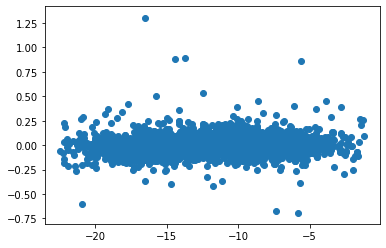

In [343]:
plt.scatter(y_pred_stack_f, residuals);

# Put standarad scalar inside pipeline before you use gridsearch cross validation.  Redo with this fix!

In [17]:
# Build a StandardScaler + kNN pipeline
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('stacked_model', StackingCVRegressor(
    regressors=[xgb_model, lgbm_model, rf_model],
    meta_regressor=Ridge()
))
])o

# Fit
pipe.fit(X_train, y_train)

KeyboardInterrupt: 

In [41]:
start_time = time.time()
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('rf_model', RandomForestRegressor())
])

param_dist = {"rf_model__max_depth": [None],
              "rf_model__n_estimators": 500, 800, 1000, 1200],
              "rf_model__min_samples_split": [2],
             }

CV = GridSearchCV(pipe, param_grid = param_dist, scoring = 'neg_mean_absolute_error', n_jobs= 2, cv=5)
CV.fit(X_train, y_train)  
print(" Seconds %0.3f" % (time.time() - start_time))
print('Best score and parameter combination = ')

print(CV.best_score_)    
print(CV.best_params_) 

 Seconds 84684.354
Best score and parameter combination = 
-0.09405183375249128
{'rf_model__max_depth': None, 'rf_model__min_samples_split': 2, 'rf_model__n_estimators': 800}


In [49]:
#start_time = time.time()
rf_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('rf_model', RandomForestRegressor(max_depth=None, n_estimators=800, min_samples_split=2, n_jobs=3, verbose=2))
])

rf_pipe.fit(X_train, y_train)  


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 1000building tree 2 of 1000building tree 3 of 1000


building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   47.2s


building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000
building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000


[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  3.4min


building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tre

[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:  7.8min


building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000
building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tre

[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed: 14.1min


building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tre

building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tre

[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed: 21.6min finished


Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rf_model',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=3,
                                       oob_score=False, random_state=None,
                                       verbose=2, warm_start=False))],
         verbose=False)

In [52]:
rf_preds = rf_pipe.predict(X_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:    0.8s finished


In [54]:
np.sqrt(mean_squared_error(y_test, rf_pipe.predict(X_test)))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:    0.7s finished


5.8148522149066

In [55]:
np.sqrt(mean_squared_error(y_train, rf_pipe.predict(X_train)))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 359 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 642 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done 1000 out of 1000 | elapsed:    1.1s finished


5.837408486469577

In [45]:
rg_grid.to_csv('randomforest_grid.csv')

In [48]:
CV.best_estimator_

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rf_model',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=800, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [50]:
standardize(X_test)

In [51]:
standardize(X_train)